<a href="https://colab.research.google.com/github/MasaruNAKATA/MasaruNAKATA/blob/main/python_dlshogi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 書籍「将棋AIで学ぶディープラーニング」のJupyter Notebook
<a href="https://www.amazon.co.jp/gp/product/4839965412/ref=as_li_tl?ie=UTF8&camp=247&creative=1211&creativeASIN=4839965412&linkCode=as2&tag=87etg84cev00-22&linkId=156f669dd60b04533b04f3866713c0c4">【書籍】将棋AIで学ぶディープラーニング</a>のJupyter Notebookです。
書籍のソースコードをGoogle Colab上で実行できます。

セルを実行できるようにするには、[Playgroundで開く]をクリックしてください。

## ランタイムタイプの変更
Google Colabのメニューから[ランタイム]→[ランタイムのタイプを変更]を選択し、ハードウェアアクセラレータを「None」から「GPU」に変更して保存をクリックしてください。

# 第7章 方策ネットワーク

## 7.2 モジュールインストール
GitHubからソースコードをcloneして、モジュールインストールします。

以降のコードは、ソースがcloneされて、作業ディレクトリがpython-dlshogiになっており、モジュールインストールされていることを前提にしています。

### GitHubからソースをclone

In [ ]:
!git clone https://github.com/TadaoYamaoka/python-dlshogi.git

Cloning into 'python-dlshogi'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 104 (delta 0), reused 1 (delta 0), pack-reused 99
Receiving objects: 100% (104/104), 57.29 MiB | 10.82 MiB/s, done.
Resolving deltas: 100% (37/37), done.


### 作業ディレクトリ移動とモジュールインストール

In [ ]:
%cd python-dlshogi
!pip install -e .

/content/python-dlshogi
Obtaining file:///content/python-dlshogi
  Running setup.py develop for python-dlshogi


## 7.4 方策ネットワークの実装
以下のコードはGitHubからcloneしてモジュールインストールしたコードを使用するため、ここではコードの掲載を省略します。
- [policy.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/network/policy.py)
- [common.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/common.py)

## 7.5 訓練データの準備
### floodgateの棋譜をダウンロードして解凍する
解凍に非常に時間がかかるため、棋譜数を少なくしたデータをGoogle Driveで公開しています。（[下記参照](#scrollTo=UuWK23NYgzxv&line=2&uniqifier=1)）

In [ ]:
!wget 'https://osdn.net/frs/redir.php?m=iij&f=shogi-server%2F68500%2Fwdoor2016.7z' -O wdoor2016.7z
!7z x wdoor2016.7z
!ls -l

### 棋譜のクリーニング

In [ ]:
!python utils/filter_csa.py ./2016

kifu count : 29758
rate mean : 3063.189260030916
rate median : 3066.0
rate max : 3825.0
rate min : 2502.0


#### 訓練データとテストデータに分割

In [ ]:
!python utils/make_kifu_list.py ./2016 kifulist

total kifu num = 29758
train kifu num = 26782
test kifu num = 2976


### 棋譜を少なくしたデータをダウンロード
訓練データの準備と学習にあまり時間をかけたくない方のために、棋譜を少なくしたデータをGoogle Driveで公開しています。

棋譜(訓練用1000局、テスト用100局)とkifulist_train_1000.txtとkifulist_test_100.txtを取得します。

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1nWz7xpaBX756xYTlQm6Y5AK0ODP76uyG' -O traindata_floodgate2016_1000.zip

--2019-11-09 07:51:26--  https://drive.google.com/uc?export=download&id=1nWz7xpaBX756xYTlQm6Y5AK0ODP76uyG
Resolving drive.google.com (drive.google.com)... 64.233.188.139, 64.233.188.138, 64.233.188.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5d7l212pvnn5n8ong0tp6qi28k0et00d/1573279200000/04286707998525360356/*/1nWz7xpaBX756xYTlQm6Y5AK0ODP76uyG?e=download [following]
--2019-11-09 07:51:39--  https://doc-0o-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5d7l212pvnn5n8ong0tp6qi28k0et00d/1573279200000/04286707998525360356/*/1nWz7xpaBX756xYTlQm6Y5AK0ODP76uyG?e=download
Resolving doc-0o-7s-docs.googleusercontent.com (doc-0o-7s-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-0o-7s-docs.googleusercontent.com (doc-0

解凍します。

In [ ]:
!unzip -o traindata_floodgate2016_1000.zip

Archive:  traindata_floodgate2016_1000.zip
   creating: 2016/
  inflating: 2016/wdoor+floodgate-300-10F+Azul_tune_pentium_1c+Ukamuse_6700HQ+20161228183002.csa  
  inflating: 2016/wdoor+floodgate-300-10F+Azul_tune_pentium_1c+ukamuse_furibisya_book+20161229090003.csa  
  inflating: 2016/wdoor+floodgate-300-10F+BonanzaFeliz0.0MYU+ukamuse_furibisya_book+20161221123006.csa  
  inflating: 2016/wdoor+floodgate-300-10F+DEAD_SILENCE_V2.00+Azul_demo_pentium_1c+20161213013001.csa  
  inflating: 2016/wdoor+floodgate-300-10F+furibisya+Saturday_Crush_4770K+20161218140005.csa  
  inflating: 2016/wdoor+floodgate-300-10F+furibisya+SILENT_MAJORITY-1.2_6950X_SY1010+20161215223002.csa  
  inflating: 2016/wdoor+floodgate-300-10F+Gikou_cmhfmh_NB7_i5-3317U+SILENT_MAJORITY-1.2_6950X_SY1010+20161216043003.csa  
  inflating: 2016/wdoor+floodgate-300-10F+gikou_NB8_2c+Ukamuse_6950XEE+20161230173006.csa  
  inflating: 2016/wdoor+floodgate-300-10F+gpsfish_normal_1c+aprt+20161219160003.csa  
  inflating: 2016/wdoor+

## 7.6 python-shogiインストール

In [ ]:
!pip install python-shogi

     |████████████████████████████████| 61kB 2.0MB/s 
  Created wheel for python-shogi: filename=python_shogi-1.0.9-cp36-none-any.whl size=56310 sha256=e4d5e3b8931263922549a41b2c07d9aed3eb0879ebbd1deba40b44ae56f99587
  Stored in directory: /root/.cache/pip/wheels/b3/06/85/d06cd5149447feb9bc47de2401d020fb6815f2034a6676566f
Successfully built python-shogi


## 7.7 共通処理の実装
### 7.7.1 棋譜の読み込み

In [ ]:
import shogi
import shogi.CSA

filepath = './2016/wdoor+floodgate-600-10+Celeron+gpsfish_normal_1c+20160220043001.csa'
kifu = shogi.CSA.Parser.parse_file(filepath)[0]

In [ ]:
board = shogi.Board()
for move in kifu['moves']:
  print(move)
  board.push_usi(move)

2g2f
3c3d
2f2e
2b3c
7g7f
4c4d
3i4h
8c8d
7i6h
6a5b
6h7g
3a2b
5i6h
4a3b
3g3f
5a4a
8h7i
7a6b
3f3e
3d3e
6h7h
3c4b
5g5f
3e3f
4i5h
5c5d
6g6f
2b3c
4g4f
3c3d
4h4g
8d8e
4g3f
P*3e
3f4g
7c7d
5h6g
6b7c
4f4e
4d4e
P*4f
7d7e
7f7e
4b6d
2e2d
2c2d
2h2d
3b2c
2d2h
4a3b
P*2d
2c3c
2i3g
P*2f
5f5e
5d5e
4f4e
5e5f
P*5e
6d5e
4g4f
5e6d
6g5f
3e3f
P*3e
3d4c
4e4d
4c4d
3e3d
3c2d
2h2f
2d3d
P*3e
3d3c
2f3f
8e8f
7g8f
P*7f
3e3d
3c2c
P*4e
P*8e
8f9e
4d5c
5f6e
8e8f
9e8f
P*8h
7h8h
P*8e
8f9e
8e8f
9e8f
P*8e
8f9e
8e8f
9e8f
P*8e
8f9e
9c9d
P*2d
2c2d
P*2b
3b2b
6e6d


In [ ]:
print(board)

 l  n  .  .  .  .  .  n  l
 .  r  .  .  g  .  .  k  .
 .  .  s  p  s  .  .  .  p
 p  .  .  G  .  .  P  g  .
 S  p  P  .  .  P  .  .  .
 .  .  p  P  .  S  R  .  .
 P  P  .  .  .  .  N  .  P
 .  K  .  .  .  .  .  .  .
 L  N  B  G  .  .  .  .  L

 P*4 B*1 p*2


以下のコードはGitHubからcloneしてモジュールインストールしたコードを使用するため、ここではコードの掲載を省略します。
- [read_kifu.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/read_kifu.py)
- [features.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/features.py)
- [common.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/common.py)

## 7.8 学習処理の実装、7.9 学習実行
方策ネットワークの学習処理を実装して、学習を実行します。
- バッチサイズ : 32(デフォルト)
- 学習率 : 0.01(デフォルト)

※33行目で引数を設定しています。

In [ ]:
import numpy as np
import chainer
from chainer import cuda, Variable
from chainer import optimizers, serializers
import chainer.functions as F

from pydlshogi.common import *
from pydlshogi.network.policy import PolicyNetwork
from pydlshogi.features import *
from pydlshogi.read_kifu import *

import argparse
import random
import pickle
import os
import re

import logging

parser = argparse.ArgumentParser()
parser.add_argument('kifulist_train', type=str, help='train kifu list')
parser.add_argument('kifulist_test', type=str, help='test kifu list')
parser.add_argument('--batchsize', '-b', type=int, default=32, help='Number of positions in each mini-batch')
parser.add_argument('--test_batchsize', type=int, default=512, help='Number of positions in each test mini-batch')
parser.add_argument('--epoch', '-e', type=int, default=1, help='Number of epoch times')
parser.add_argument('--model', type=str, default='model/model_policy', help='model file name')
parser.add_argument('--state', type=str, default='model/state_policy', help='state file name')
parser.add_argument('--initmodel', '-m', default='', help='Initialize the model from given file')
parser.add_argument('--resume', '-r', default='', help='Resume the optimization from snapshot')
parser.add_argument('--log', default=None, help='log file path')
parser.add_argument('--lr', type=float, default=0.01, help='learning rate')
parser.add_argument('--eval_interval', '-i', type=int, default=1000, help='eval interval')
args = parser.parse_args(args=['kifulist_train_1000.txt', 'kifulist_test_100.txt', '--model', 'model/model_policy_1000', '--state', 'model/state_policy_1000', '--eval_interval', '100'])

logging.basicConfig(format='%(asctime)s\t%(levelname)s\t%(message)s', datefmt='%Y/%m/%d %H:%M:%S', filename=args.log, level=logging.DEBUG)

model = PolicyNetwork()
model.to_gpu()

optimizer = optimizers.SGD(lr=args.lr)
optimizer.setup(model)

# Init/Resume
if args.initmodel:
    logging.info('Load model from {}'.format(args.initmodel))
    serializers.load_npz(args.initmodel, model)
if args.resume:
    logging.info('Load optimizer state from {}'.format(args.resume))
    serializers.load_npz(args.resume, optimizer)

logging.info('read kifu start')
# 保存済みのpickleファイルがある場合、pickleファイルを読み込む
# train date
train_pickle_filename = re.sub(r'\..*?$', '', args.kifulist_train) + '.pickle'
if os.path.exists(train_pickle_filename):
    with open(train_pickle_filename, 'rb') as f:
        positions_train = pickle.load(f)
    logging.info('load train pickle')
else:
    positions_train = read_kifu(args.kifulist_train)

# test data
test_pickle_filename = re.sub(r'\..*?$', '', args.kifulist_test) + '.pickle'
if os.path.exists(test_pickle_filename):
    with open(test_pickle_filename, 'rb') as f:
        positions_test = pickle.load(f)
    logging.info('load test pickle')
else:
    positions_test = read_kifu(args.kifulist_test)

# 保存済みのpickleがない場合、pickleファイルを保存する
if not os.path.exists(train_pickle_filename):
    with open(train_pickle_filename, 'wb') as f:
        pickle.dump(positions_train, f, pickle.HIGHEST_PROTOCOL)
    logging.info('save train pickle')
if not os.path.exists(test_pickle_filename):
    with open(test_pickle_filename, 'wb') as f:
        pickle.dump(positions_test, f, pickle.HIGHEST_PROTOCOL)
    logging.info('save test pickle')
logging.info('read kifu end')

logging.info('train position num = {}'.format(len(positions_train)))
logging.info('test position num = {}'.format(len(positions_test)))

# mini batch
def mini_batch(positions, i, batchsize):
    mini_batch_data = []
    mini_batch_move = []
    for b in range(batchsize):
        features, move, win = make_features(positions[i + b])
        mini_batch_data.append(features)
        mini_batch_move.append(move)

    return (Variable(cuda.to_gpu(np.array(mini_batch_data, dtype=np.float32))),
            Variable(cuda.to_gpu(np.array(mini_batch_move, dtype=np.int32))))

def mini_batch_for_test(positions, batchsize):
    mini_batch_data = []
    mini_batch_move = []
    for b in range(batchsize):
        features, move, win = make_features(random.choice(positions))
        mini_batch_data.append(features)
        mini_batch_move.append(move)

    return (Variable(cuda.to_gpu(np.array(mini_batch_data, dtype=np.float32))),
            Variable(cuda.to_gpu(np.array(mini_batch_move, dtype=np.int32))))

# train
logging.info('start training')
itr = 0
sum_loss = 0
for e in range(args.epoch):
    positions_train_shuffled = random.sample(positions_train, len(positions_train))

    itr_epoch = 0
    sum_loss_epoch = 0
    for i in range(0, len(positions_train_shuffled) - args.batchsize, args.batchsize):
        x, t = mini_batch(positions_train_shuffled, i, args.batchsize)
        y = model(x)

        model.cleargrads()
        loss = F.softmax_cross_entropy(y, t)
        loss.backward()
        optimizer.update()

        itr += 1
        sum_loss += loss.data
        itr_epoch += 1
        sum_loss_epoch += loss.data

        # print train loss and test accuracy
        if optimizer.t % args.eval_interval == 0:
            x, t = mini_batch_for_test(positions_test, args.test_batchsize)
            y = model(x)
            logging.info('epoch = {}, iteration = {}, loss = {}, accuracy = {}'.format(optimizer.epoch + 1, optimizer.t, sum_loss / itr, F.accuracy(y, t).data))
            itr = 0
            sum_loss = 0

    # validate test data
    logging.info('validate test data')
    itr_test = 0
    sum_test_accuracy = 0
    for i in range(0, len(positions_test) - args.batchsize, args.batchsize):
        x, t = mini_batch(positions_test, i, args.batchsize)
        y = model(x)
        itr_test += 1
        sum_test_accuracy += F.accuracy(y, t).data
    logging.info('epoch = {}, iteration = {}, train loss avr = {}, test accuracy = {}'.format(optimizer.epoch + 1, optimizer.t, sum_loss_epoch / itr_epoch, sum_test_accuracy / itr_test))
    
    optimizer.new_epoch()

logging.info('save the model')
serializers.save_npz(args.model, model)
logging.info('save the optimizer')
serializers.save_npz(args.state, optimizer)

2019/11/09 08:14:27	INFO	read kifu start
2019/11/09 08:15:02	INFO	save train pickle
2019/11/09 08:15:02	INFO	save test pickle
2019/11/09 08:15:02	INFO	read kifu end
2019/11/09 08:15:02	INFO	train position num = 139865
2019/11/09 08:15:02	INFO	test position num = 14217
2019/11/09 08:15:02	INFO	start training
2019/11/09 08:15:16	INFO	epoch = 1, iteration = 100, loss = 7.667505, accuracy = 0.01171875
2019/11/09 08:15:23	INFO	epoch = 1, iteration = 200, loss = 7.5189576, accuracy = 0.005859375
2019/11/09 08:15:30	INFO	epoch = 1, iteration = 300, loss = 6.9521074, accuracy = 0.0
2019/11/09 08:15:37	INFO	epoch = 1, iteration = 400, loss = 6.7282176, accuracy = 0.013671875
2019/11/09 08:15:44	INFO	epoch = 1, iteration = 500, loss = 6.616287, accuracy = 0.0078125
2019/11/09 08:15:51	INFO	epoch = 1, iteration = 600, loss = 6.526226, accuracy = 0.0078125
2019/11/09 08:15:58	INFO	epoch = 1, iteration = 700, loss = 6.4757175, accuracy = 0.02734375
2019/11/09 08:16:05	INFO	epoch = 1, iteration = 80

### 保存されたモデル確認

In [ ]:
!ls -l model/

total 72248
-rw-r--r-- 1 root root 14275416 Nov  9 07:47 model_policy
-rw-r--r-- 1 root root 14268060 Nov  9 08:20 model_policy_1000
-rw-r--r-- 1 root root 16377218 Nov  9 07:47 model_policy_value
-rw-r--r-- 1 root root 12700156 Nov  9 07:47 model_policy_value_resnet
-rw-r--r-- 1 root root 16341312 Nov  9 07:47 model_value
-rw-r--r-- 1 root root     5271 Nov  9 08:20 state_policy_1000


### 保存したモデルをローカルにダウンロード
ファイルブラウザ(左のペイン)からファイルを右クリックして直接ファイルダウンロードできます。

ここでは、Google Driveをマウントしてコピーする方法を説明します。

Google Driveをマウントします。実行すると表示されるリンクを開いて表示されるトークンを入力します。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Google Driveにあらかじめpython-dlshogiというフォルダを作成して、そこに保存されたモデルをコピーします。

In [ ]:
!cp model/*_policy_1000 '/content/drive/My Drive/python-dlshogi/'

棋譜は一度学習するとpickleファイルに保存されるため、バックアップしておくと学習をやり直す際に、棋譜のダウンロードからやり直す必要がなくなります。

In [ ]:
!cp *.pickle '/content/drive/My Drive/python-dlshogi/'

# 将棋AIの実装
以下のコードはGitHubからcloneしてモジュールインストールしたコードを使用するため、ここではコードの掲載を省略します。
- [base_player.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/player/base_player.py)
- [usi.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/usi/usi.py)
- [policy_player.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/player/policy_player.py)

## 8.4 コマンドラインからテスト
以下のセルを実行して、順番に以下の通り入力します。
ここでは、GitHubからcloneした学習済みモデルを使用します。

usi

setoption name modelfile value model/model_policy

isready

position startpos

go

quit

In [ ]:
!python -m pydlshogi.usi.usi_policy_player

usi
id name policy_player
option name modelfile type string default H:\src\python-dlshogi\model\model_policy
usiok
setoption name modelfile value model/model_policy
isready
readyok
position startpos
lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R1/LNSGKGSNL b - 1
go
info string 9g9f  : 0.00834
info string 8g8f  : 0.00000
info string 7g7f  : 0.48470
info string 6g6f  : 0.00012
info string 5g5f  : 0.00153
info string 4g4f  : 0.00072
info string 3g3f  : 0.00013
info string 2g2f  : 0.46938
info string 1g1f  : 0.00088
info string 9i9h  : 0.00001
info string 1i1h  : 0.00000
info string 7i7h  : 0.00043
info string 7i6h  : 0.00139
info string 3i4h  : 0.01277
info string 3i3h  : 0.00525
info string 6i7h  : 0.00249
info string 6i6h  : 0.00000
info string 6i5h  : 0.00034
info string 4i5h  : 0.00606
info string 4i4h  : 0.00002
info string 4i3h  : 0.00001
info string 2h7h  : 0.00070
info string 2h6h  : 0.00078
info string 2h5h  : 0.00049
info string 2h4h  : 0.00001
info string 2h3h  : 0.00003
info s

## 8.5 GUIソフトに登録できるようにする、8.6 USIエンジンに登録
Google Colabでは直接[将棋所](http://shogidokoro.starfree.jp/)を動かせません。

以下に、ローカルPCで実行する方法の他にGoogle Colab上で間接的または直接将棋AIを実行する方法を紹介します。
- [ローカルPCで実行する方法](#scrollTo=v3vwnts3lyNa)
- [ssh経由でGoogle Colab上で実行する方法](#scrollTo=-lTD4_3lX5Tq&line=4&uniqifier=1)
- [cshogiでGoogle Colab上で対局する方法](#scrollTo=0nHoQ13cW5UN)


### ローカルPCで実行する方法

ローカルのPCの将棋所で実行したい場合は、モデルをダウンロードして実行してください。実行環境の構築が必要なため、書籍を参考に構築してください。実行には、CUDAに対応したGPUが必要です。

GPUがない場合、CPUのみで実行できるソースをGitHubの[cpu-onlyブランチ](https://github.com/TadaoYamaoka/python-dlshogi/tree/cpu-only)で公開しています。

### ssh経由でGoogle Colab上で実行する方法
以下の記事を参照して、鍵ペアを使用してssh接続できるようにします。

- [Google Colabに鍵ペアを使用してsshでログインする](http://tadaoyamaoka.hatenablog.com/entry/2019/07/21/160728)

In [ ]:
import random, string
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))

#Download ngrok
! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip
#Setup sshd
! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null
#Set root password
! echo root:$password | chpasswd
! mkdir -p /var/run/sshd
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "PubkeyAuthentication yes" >> /etc/ssh/sshd_config
! echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config
! echo "LD_LIBRARY_PATH=/usr/lib64-nvidia" >> /root/.bashrc
! echo "export LD_LIBRARY_PATH" >> /root/.bashrc

#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')

#Ask token
print("Copy authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = getpass.getpass()

#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')
#Print root password
print("Root password: {}".format(password))
#Get public address
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

以下の通りバッチファイル(policy_player.bat)を作成します。-pオプションで指定しているポート番号は毎回異なります。
```
@echo off
ssh root@0.tcp.ngrok.io -p 12451 python3 -m pydlshogi.usi.usi_policy_player 2>NUL
```

作成したバッチファイル(policy_player.bat)を将棋所に登録します。

USIオプションのmodelfileには、下記のようにフルパスで指定する必要があります。

/content/python-dlshogi/model/model_policy

### cshogiでGoogle Colab上で対局する方法
高速なPythonの将棋ライブラリ[cshogi](https://github.com/TadaoYamaoka/cshogi)を使って、Google Colaba上でUSIエンジン同士の対局ができます。

以下のコマンドでcshogiをインストールします。

In [ ]:
!pip install https://github.com/TadaoYamaoka/cshogi/releases/download/v0.0.1/cshogi-0.0.1-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 1.4MB 283kB/s 


対局相手として将棋所に付属するLesserkaiのソースをダウンロードしてビルドします。

In [ ]:
!wget http://shogidokoro.starfree.jp/download/LesserkaiSrc.zip
!unzip LesserkaiSrc.zip -d /content/
%cd /content/LesserkaiSrc/Lesserkai
!make
%cd -

--2019-11-09 08:33:58--  http://shogidokoro.starfree.jp/download/LesserkaiSrc.zip
Resolving shogidokoro.starfree.jp (shogidokoro.starfree.jp)... 157.112.187.101
Connecting to shogidokoro.starfree.jp (shogidokoro.starfree.jp)|157.112.187.101|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47694 (47K) [application/zip]
Saving to: ‘LesserkaiSrc.zip’

LesserkaiSrc.zip    100%[===================>]  46.58K  --.-KB/s    in 0.07s   

2019-11-09 08:33:58 (674 KB/s) - ‘LesserkaiSrc.zip’ saved [47694/47694]

Archive:  LesserkaiSrc.zip
  inflating: /content/LesserkaiSrc/Lesserkai/Globals.cpp  
  inflating: /content/LesserkaiSrc/Lesserkai/Joseki.cpp  
  inflating: /content/LesserkaiSrc/Lesserkai/KomaMoves.cpp  
  inflating: /content/LesserkaiSrc/Lesserkai/Kyokumen.cpp  
  inflating: /content/LesserkaiSrc/Lesserkai/Kyokumen.h  
  inflating: /content/LesserkaiSrc/Lesserkai/Lesserkai.cpp  
  inflating: /content/LesserkaiSrc/Lesserkai/Lesserkai.vcxproj  
  inflating: /content/

作成した将棋AIを起動するシェル(policy_player.sh)を作成します。

In [ ]:
!echo -e "#!/bin/sh\npython -m pydlshogi.usi.usi_policy_player" >policy_player.sh
!chmod +x policy_player.sh

cshogiのcliモジュールを使って、対局を開始します。

policy_player
setoption name modelfile value /content/python-dlshogi/model/model_policy
isready
readyok
Lesserkai 1.4.2
isready
readyok
開始局面


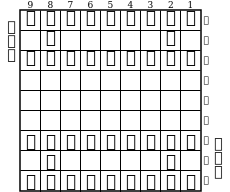

usinewgame
usinewgame
position startpos
go byoyomi 1000
lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R1/LNSGKGSNL b - 1
info string 9g9f  : 0.00834
info string 8g8f  : 0.00000
info string 7g7f  : 0.48470
info string 6g6f  : 0.00012
info string 5g5f  : 0.00153
info string 4g4f  : 0.00072
info string 3g3f  : 0.00013
info string 2g2f  : 0.46938
info string 1g1f  : 0.00088
info string 9i9h  : 0.00001
info string 1i1h  : 0.00000
info string 7i7h  : 0.00043
info string 7i6h  : 0.00139
info string 3i4h  : 0.01277
info string 3i3h  : 0.00525
info string 6i7h  : 0.00249
info string 6i6h  : 0.00000
info string 6i5h  : 0.00034
info string 4i5h  : 0.00606
info string 4i4h  : 0.00002
info string 4i3h  : 0.00001
info string 2h7h  : 0.00070
info string 2h6h  : 0.00078
info string 2h5h  : 0.00049
info string 2h4h  : 0.00001
info string 2h3h  : 0.00003
info string 2h1h  : 0.00000
info string 5i6h  : 0.00103
info string 5i5h  : 0.00111
info string 5i4h  : 0.00005
bestmove 7g7f
1手目


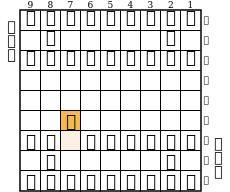

position startpos moves 7g7f
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 9 pv 4a3b
info currmove 4a3b
info time 0 depth 2 nodes 136 score cp -1 pv 4a3b 6i7h
info currmove 4a3b
info time 2 depth 3 nodes 2381 score cp 2 pv 4a3b 6i7h 5a4b
info currmove 4a3b
info currmove 4a3b
info time 6 depth 4 nodes 7626 score cp -1 pv 4a3b 6i7h 5a4b 4i5h
info currmove 4a3b
info time 19 nodes 26870 score cp -1 pv 4a3b 6i7h 5a4b 4i5h
bestmove 4a3b
2手目


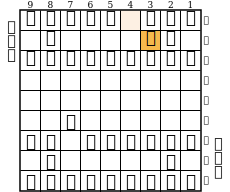

position startpos moves 7g7f 4a3b
go byoyomi 1000
lnsgk1snl/1r4gb1/ppppppppp/9/9/2P6/PP1PPPPPP/1B5R1/LNSGKGSNL b - 3
info string 7f7e  : 0.02776
info string 9g9f  : 0.01980
info string 8g8f  : 0.00008
info string 6g6f  : 0.01635
info string 5g5f  : 0.10660
info string 4g4f  : 0.00379
info string 3g3f  : 0.00111
info string 2g2f  : 0.50967
info string 1g1f  : 0.00642
info string 9i9h  : 0.00025
info string 1i1h  : 0.00001
info string 8i7g  : 0.00001
info string 7i7h  : 0.00754
info string 7i6h  : 0.10497
info string 3i4h  : 0.03494
info string 3i3h  : 0.01274
info string 6i7h  : 0.03186
info string 6i6h  : 0.00000
info string 6i5h  : 0.00037
info string 4i5h  : 0.01748
info string 4i4h  : 0.00045
info string 4i3h  : 0.00004
info string 8h3c  : 0.00000
info string 8h3c+ : 0.00000
info string 8h4d  : 0.00000
info string 8h5e  : 0.00000
info string 8h6f  : 0.00001
info string 8h7g  : 0.00810
info string 2h7h  : 0.00985
info string 2h6h  : 0.06164
info string 2h5h  : 0.00439
info string 2h4

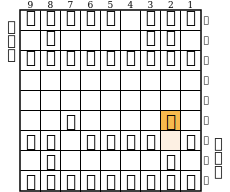

position startpos moves 7g7f 4a3b 2g2f
go byoyomi 1000
info currmove 5a4b
info time 0 depth 1 nodes 4 score cp 11 pv 5a4b
info currmove 5a4b
info currmove 5a4b
info time 0 depth 2 nodes 137 score cp 1 pv 5a4b 6i7h
info currmove 5a4b
info currmove 5a4b
info time 2 depth 3 nodes 2208 score cp 4 pv 5a4b 6i7h 6a5b
info currmove 5a4b
info currmove 5a4b
info time 6 depth 4 nodes 8105 score cp 0 pv 5a4b 2f2e 6a5b 2e2d
info currmove 5a4b
info time 17 depth 4 nodes 20759 score cp 1 pv 3c3d 6g6f 5a4b 6i7h
info time 23 nodes 30184 score cp 1 pv 3c3d 6g6f 5a4b 6i7h
bestmove 3c3d
4手目


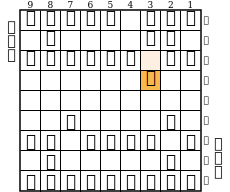

position startpos moves 7g7f 4a3b 2g2f 3c3d
go byoyomi 1000
lnsgk1snl/1r4gb1/pppppp1pp/6p2/9/2P4P1/PP1PPPP1P/1B5R1/LNSGKGSNL b - 5
info string 7f7e  : 0.01857
info string 2f2e  : 0.62795
info string 9g9f  : 0.00921
info string 8g8f  : 0.00001
info string 6g6f  : 0.01171
info string 5g5f  : 0.00077
info string 4g4f  : 0.00144
info string 3g3f  : 0.00045
info string 1g1f  : 0.00095
info string 9i9h  : 0.00008
info string 1i1h  : 0.00002
info string 8i7g  : 0.00000
info string 7i7h  : 0.00096
info string 7i6h  : 0.00352
info string 3i4h  : 0.04272
info string 3i3h  : 0.00344
info string 6i7h  : 0.24255
info string 6i6h  : 0.00003
info string 6i5h  : 0.00004
info string 4i5h  : 0.01006
info string 4i4h  : 0.00018
info string 4i3h  : 0.00002
info string 8h2b  : 0.00038
info string 8h2b+ : 0.00318
info string 8h3c  : 0.00000
info string 8h3c+ : 0.00000
info string 8h4d  : 0.00000
info string 8h5e  : 0.00000
info string 8h6f  : 0.00000
info string 8h7g  : 0.00001
info string 2h2g  : 0.00000
i

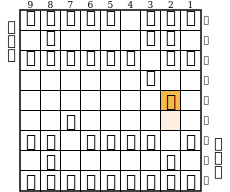

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e
go byoyomi 1000
info currmove 2b8h+
info time 0 depth 1 nodes 3 score cp 7 pv 2b8h+
info time 0 depth 1 nodes 44 score cp 10 pv 5a4b
info currmove 2b8h+
info time 0 depth 2 nodes 147 score cp 1785 pv 2b8h+ 2h8h
info currmove 5a4b
info currmove 2b8h+
info time 6 depth 3 nodes 4591 score cp 1797 pv 2b8h+ 7i8h 3a2b
info currmove 5a4b
info currmove 2b8h+
info time 19 depth 4 nodes 17423 score cp 1906 pv 2b8h+ 7i8h B*6e 3i4h
info currmove 2b8h+
info time 80 nodes 64310 score cp 1906 pv 2b8h+ 7i8h B*6e 3i4h
bestmove 2b8h+
6手目


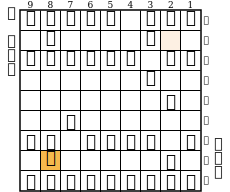

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/7P1/2P6/PP1PPPP1P/1+b5R1/LNSGKGSNL b b 7
info string 2e2d  : 0.00084
info string 7f7e  : 0.00003
info string 9g9f  : 0.00002
info string 8g8f  : 0.00000
info string 6g6f  : 0.00003
info string 5g5f  : 0.00000
info string 4g4f  : 0.00002
info string 3g3f  : 0.00005
info string 1g1f  : 0.00003
info string 9i9h  : 0.00000
info string 1i1h  : 0.00000
info string 8i7g  : 0.00003
info string 7i8h  : 0.99517
info string 7i7h  : 0.00001
info string 7i6h  : 0.00157
info string 3i4h  : 0.00013
info string 3i3h  : 0.00004
info string 6i7h  : 0.00001
info string 6i6h  : 0.00000
info string 6i5h  : 0.00000
info string 4i5h  : 0.00000
info string 4i4h  : 0.00000
info string 4i3h  : 0.00000
info string 2h2f  : 0.00000
info string 2h2g  : 0.00000
info string 2h8h  : 0.00083
info string 2h7h  : 0.00000
info string 2h6h  : 0.00000
info string 2h5h  : 0.00000
info string 2h4h  : 0.00000
info string 2h3h  

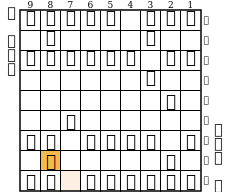

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h
go byoyomi 1000
info currmove 3a2b
info time 0 depth 1 nodes 4 score cp 7 pv 3a2b
info currmove B*6e
info currmove 3a2b
info time 0 depth 2 nodes 276 score cp -5 pv 3a2b 2e2d
info currmove B*6e
info time 1 depth 2 nodes 413 score cp 107 pv B*6e 3i3h
info currmove 3a2b
info time 6 depth 3 nodes 5490 score cp -103 pv 3a2b B*4e 7a7b
info currmove B*6e
info time 7 depth 3 nodes 7939 score cp -89 pv B*6e 2e2d 2c2d
info time 20 depth 3 nodes 18990 score cp 2 pv 7a7b 6i7h 3a2b
info currmove 7a7b
info time 37 depth 4 nodes 36543 score cp -10 pv 7a7b 2e2d 3a2b 6i7h
info currmove B*6e
info time 56 depth 4 nodes 48040 score cp 97 pv B*6e 5i5h 6e7f 2e2d
info time 213 nodes 195891 score cp 97 pv B*6e 5i5h 6e7f 2e2d
bestmove B*6e
8手目


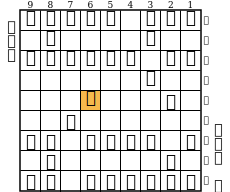

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/3b3P1/2P6/PP1PPPP1P/1S5R1/LN1GKGSNL b B 9
info string 2e2d  : 0.10023
info string 7f7e  : 0.00225
info string 9g9f  : 0.00622
info string 8g8f  : 0.00169
info string 6g6f  : 0.01294
info string 5g5f  : 0.00311
info string 4g4f  : 0.00065
info string 3g3f  : 0.01810
info string 1g1f  : 0.00329
info string 9i9h  : 0.00013
info string 1i1h  : 0.00015
info string 8i7g  : 0.01011
info string 8h7g  : 0.13106
info string 8h7i  : 0.00083
info string 3i4h  : 0.25402
info string 3i3h  : 0.10472
info string 6i7h  : 0.06273
info string 6i6h  : 0.00451
info string 6i5h  : 0.00058
info string 6i7i  : 0.00313
info string 4i5h  : 0.02578
info string 4i4h  : 0.00021
info string 4i3h  : 0.00339
info string 2h2f  : 0.00160
info string 2h2g  : 0.00006
info string 2h7h  : 0.00567
info string 2h6h  : 0.00424
info string 2h5h  : 0.00037
info string 2h4h  : 0.00015
info string 2h3h  : 0.00031
info st

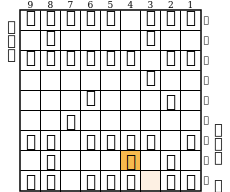

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h
go byoyomi 1000
info time 0 depth 1 nodes 40 score cp 118 pv 6e7f
info currmove 6e7f
info time 1 depth 2 nodes 196 score cp 108 pv 6e7f 6i7h
info currmove 6e7f
info time 5 depth 3 nodes 4867 score cp 6 pv 6e7f B*4e 6a5b
info currmove 6e7f
info currmove 6e7f
info time 17 depth 4 nodes 15964 score cp 101 pv 6e7f 6i7h 3a2b 2e2d
info currmove 6e7f
info time 68 nodes 67844 score cp 101 pv 6e7f 6i7h 3a2b 2e2d
bestmove 6e7f
10手目


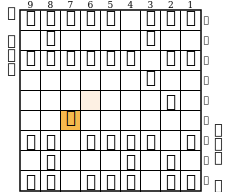

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/7P1/2b6/PP1PPPP1P/1S3S1R1/LN1GKG1NL b Bp 11
info string 2e2d  : 0.06140
info string 9g9f  : 0.00382
info string 8g8f  : 0.00135
info string 6g6f  : 0.00288
info string 5g5f  : 0.02454
info string 4g4f  : 0.01991
info string 3g3f  : 0.03457
info string 1g1f  : 0.00119
info string 9i9h  : 0.00002
info string 1i1h  : 0.00000
info string 8i7g  : 0.03873
info string 8h7g  : 0.22967
info string 8h7i  : 0.00082
info string 4h3i  : 0.00131
info string 6i7h  : 0.26802
info string 6i6h  : 0.02603
info string 6i5h  : 0.00277
info string 6i7i  : 0.01468
info string 4i5h  : 0.05909
info string 4i3h  : 0.00294
info string 4i3i  : 0.00046
info string 2h2f  : 0.00253
info string 2h2g  : 0.00001
info string 2h3h  : 0.00008
info string 2h1h  : 0.00013
info string 5i6h  : 0.08242
info string 5i5h  : 0.00380
info string B*4a  : 0.00009
info string B*9b  : 0.00000
info string B*7b  : 0.0

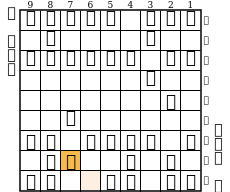

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h
go byoyomi 1000
info currmove 3a2b
info time 0 depth 1 nodes 4 score cp 113 pv 3a2b
info currmove 3a2b
info currmove 3a2b
info time 0 depth 2 nodes 206 score cp 101 pv 3a2b 2e2d
info currmove 3a2b
info currmove 3a2b
info time 2 depth 3 nodes 2603 score cp 1 pv 3a2b B*4e 6a5b
info currmove 3a2b
info time 5 depth 3 nodes 6140 score cp 106 pv 6a5b 8h7g 7f6e
info time 11 depth 3 nodes 12704 score cp 108 pv 7f5d 8h7g 3a2b
info currmove 3a2b
info time 24 depth 4 nodes 24325 score cp 0 pv 3a2b B*4e 6a5b 4e3d
info currmove 7f5d
info time 33 depth 4 nodes 31143 score cp 96 pv 7f5d 2e2d 3a2b 8h7g
info time 99 nodes 94304 score cp 96 pv 7f5d 2e2d 3a2b 8h7g
bestmove 7f5d
12手目


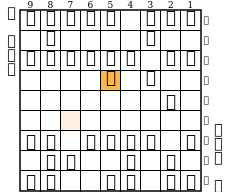

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/4b1p2/7P1/9/PP1PPPP1P/1SG2S1R1/LN2KG1NL b Bp 13
info string 2e2d  : 0.17618
info string 9g9f  : 0.00615
info string 8g8f  : 0.00289
info string 6g6f  : 0.01024
info string 5g5f  : 0.08595
info string 4g4f  : 0.04548
info string 3g3f  : 0.07823
info string 1g1f  : 0.00278
info string 9i9h  : 0.00005
info string 1i1h  : 0.00001
info string 8i7g  : 0.02212
info string 8h7g  : 0.22016
info string 8h7i  : 0.00327
info string 4h3i  : 0.00227
info string 7h7g  : 0.00186
info string 7h6h  : 0.00010
info string 7h7i  : 0.00009
info string 4i5h  : 0.08844
info string 4i3h  : 0.01477
info string 4i3i  : 0.00065
info string 2h2f  : 0.00735
info string 2h2g  : 0.00001
info string 2h3h  : 0.00019
info string 2h1h  : 0.00029
info string 5i6h  : 0.07864
info string 5i5h  : 0.02190
info string 5i6i  : 0.03333
info string B*4a  : 0.00008
info string B*9b  : 0.00000
info string B

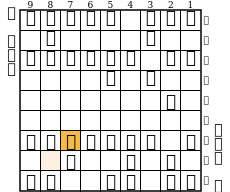

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g
go byoyomi 1000
info currmove 3a2b
info time 1 depth 1 nodes 4 score cp 108 pv 3a2b
info currmove 3a2b
info currmove 3a2b
info time 1 depth 2 nodes 203 score cp 96 pv 3a2b 2e2d
info currmove 3a2b
info currmove 3a2b
info time 4 depth 3 nodes 2771 score cp 110 pv 3a2b 4i5h 2b3c
info currmove 3a2b
info currmove 3a2b
info time 14 depth 4 nodes 12254 score cp 96 pv 3a2b 2e2d 5a4b 4i5h
info currmove 3a2b
info time 57 nodes 53389 score cp 96 pv 3a2b 2e2d 5a4b 4i5h
bestmove 3a2b
14手目


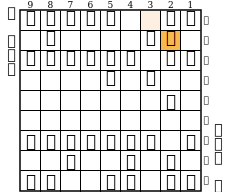

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b
go byoyomi 1000
lnsgk2nl/1r4gs1/pppppp1pp/4b1p2/7P1/9/PPSPPPP1P/2G2S1R1/LN2KG1NL b Bp 15
info string 2e2d  : 0.15551
info string 9g9f  : 0.01539
info string 8g8f  : 0.00458
info string 6g6f  : 0.02981
info string 5g5f  : 0.14491
info string 4g4f  : 0.03639
info string 3g3f  : 0.11003
info string 1g1f  : 0.00451
info string 9i9h  : 0.00006
info string 1i1h  : 0.00001
info string 7g8f  : 0.00648
info string 7g7f  : 0.02721
info string 7g6f  : 0.06026
info string 7g8h  : 0.00246
info string 7g6h  : 0.00659
info string 4h3i  : 0.00302
info string 7h8h  : 0.00057
info string 7h6h  : 0.00023
info string 7h7i  : 0.00013
info string 4i5h  : 0.10860
info string 4i3h  : 0.02284
info string 4i3i  : 0.00083
info string 2h2f  : 0.00796
info string 2h2g  : 0.00002
info string 2h3h  : 0.00029
info string 2h1h  : 0.00047
info string 5i6h  : 0.09121
info string 5i5h  : 0.01786
info string 5i6i  : 0.05266
info

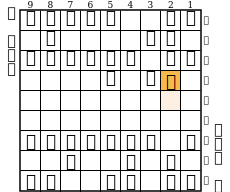

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d
go byoyomi 1000
info currmove 2c2d
info time 0 depth 1 nodes 4 score cp 112 pv 2c2d
info currmove 5a4b
info currmove 2c2d
info time 0 depth 2 nodes 208 score cp 111 pv 2c2d 2h2d
info currmove 5a4b
info currmove 2c2d
info time 3 depth 3 nodes 2659 score cp 113 pv 2c2d 2h2d 3d3e
info currmove 2c2d
info currmove 2c2d
info time 37 depth 4 nodes 23587 score cp 204 pv 2c2d B*7e 5a4b 2h2d
info currmove 2c2d
info time 123 nodes 90914 score cp 204 pv 2c2d B*7e 5a4b 2h2d
bestmove 2c2d
16手目


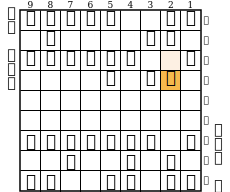

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d
go byoyomi 1000
lnsgk2nl/1r4gs1/pppppp2p/4b1pp1/9/9/PPSPPPP1P/2G2S1R1/LN2KG1NL b B2p 17
info string 9g9f  : 0.00556
info string 8g8f  : 0.00107
info string 6g6f  : 0.01315
info string 5g5f  : 0.04960
info string 4g4f  : 0.00801
info string 3g3f  : 0.04523
info string 1g1f  : 0.00067
info string 9i9h  : 0.00001
info string 1i1h  : 0.00001
info string 7g8f  : 0.00147
info string 7g7f  : 0.00888
info string 7g6f  : 0.02363
info string 7g8h  : 0.00050
info string 7g6h  : 0.00237
info string 4h3i  : 0.00189
info string 7h8h  : 0.00010
info string 7h6h  : 0.00010
info string 7h7i  : 0.00006
info string 4i5h  : 0.03263
info string 4i3h  : 0.00683
info string 4i3i  : 0.00036
info string 2h2d  : 0.71046
info string 2h2e  : 0.00000
info string 2h2f  : 0.00107
info string 2h2g  : 0.00001
info string 2h3h  : 0.00009
info string 2h1h  : 0.00022
info string 5i6h  : 0.02866
info string 5i5h  : 0.0

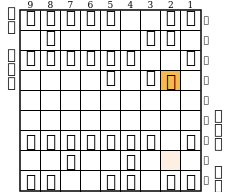

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d
go byoyomi 1000
info currmove 3d3e
info time 1 depth 1 nodes 4 score cp 113 pv 3d3e
info currmove P*2h
info currmove 3d3e
info time 1 depth 2 nodes 246 score cp 110 pv 3d3e 4i5h
info currmove P*2h
info time 2 depth 2 nodes 395 score cp 1146 pv P*2h 2d2h
info currmove 3d3e
info time 7 depth 3 nodes 3765 score cp 108 pv 3d3e 2d3d 5d2g+
info currmove P*2h
info time 20 depth 3 nodes 13323 score cp 1333 pv P*2h 2d2h P*2g
info currmove P*2h
info time 33 depth 4 nodes 23351 score cp 1333 pv P*2h 2d2h P*2g 2h1h
info currmove P*2h
info time 370 nodes 303092 score cp 1333 pv P*2h 2d2h P*2g 2h1h
bestmove P*2h
18手目


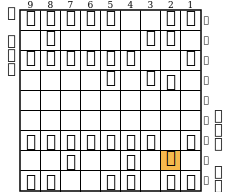

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h
go byoyomi 1000
lnsgk2nl/1r4gs1/pppppp2p/4b1pR1/9/9/PPSPPPP1P/2G2S1p1/LN2KG1NL b BPp 19
info string 9g9f  : 0.00189
info string 8g8f  : 0.00042
info string 6g6f  : 0.00383
info string 5g5f  : 0.01791
info string 4g4f  : 0.00741
info string 3g3f  : 0.01523
info string 1g1f  : 0.00065
info string 9i9h  : 0.00001
info string 1i1h  : 0.00004
info string 7g8f  : 0.00115
info string 7g7f  : 0.00216
info string 7g6f  : 0.00941
info string 7g8h  : 0.00044
info string 7g6h  : 0.00097
info string 4h3i  : 0.00691
info string 7h8h  : 0.00007
info string 7h6h  : 0.00005
info string 7h7i  : 0.00005
info string 4i5h  : 0.00754
info string 4i3h  : 0.02668
info string 4i3i  : 0.02781
info string 2d2b  : 0.00002
info string 2d2b+ : 0.00034
info string 2d2c  : 0.00001
info string 2d2c+ : 0.00003
info string 2d3d  : 0.03729
info string 2d1d  : 0.00000
info string 2d2e  : 0.01281
info string 2

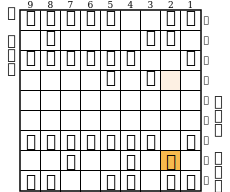

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h
go byoyomi 1000
info currmove P*2g
info time 0 depth 1 nodes 4 score cp -89 pv P*2g
info currmove P*2g
info currmove P*2g
info time 1 depth 2 nodes 231 score cp -89 pv P*2g 2h1h
info currmove P*2g
info currmove P*2g
info time 6 depth 3 nodes 4994 score cp -84 pv P*2g 2h1h 2b3c
info currmove P*2g
info currmove P*2g
info time 20 depth 4 nodes 17805 score cp 6 pv P*2g B*1e 2b3c 2h1h
info currmove P*2g
info time 256 nodes 223324 score cp 6 pv P*2g B*1e 2b3c 2h1h
bestmove P*2g
20手目


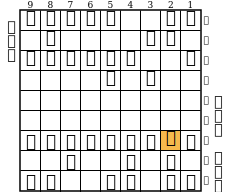

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g
go byoyomi 1000
lnsgk2nl/1r4gs1/pppppp2p/4b1p2/9/9/PPSPPPPpP/2G2S1R1/LN2KG1NL b B2P 21
info string 9g9f  : 0.00029
info string 8g8f  : 0.00006
info string 6g6f  : 0.00047
info string 5g5f  : 0.00129
info string 4g4f  : 0.00011
info string 3g3f  : 0.00015
info string 1g1f  : 0.00008
info string 9i9h  : 0.00000
info string 1i1h  : 0.00005
info string 7g8f  : 0.00006
info string 7g7f  : 0.00021
info string 7g6f  : 0.00063
info string 7g8h  : 0.00002
info string 7g6h  : 0.00005
info string 4h3i  : 0.00147
info string 7h8h  : 0.00023
info string 7h6h  : 0.00000
info string 7h7i  : 0.00000
info string 4i5h  : 0.00115
info string 4i3h  : 0.00245
info string 4i3i  : 0.00001
info string 2h2g  : 0.56342
info string 2h3h  : 0.25469
info string 2h1h  : 0.13518
info string 5i6h  : 0.00049
info string 5i5h  : 0.00001
info string 5i6i  : 0.00001
info string B*4a  : 0.00003
info

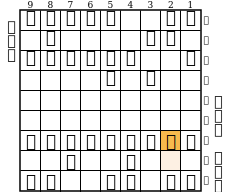

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g
go byoyomi 1000
info currmove 5d2g+
info time 0 depth 1 nodes 4 score cp 3991 pv 5d2g+
info currmove 5d2g+
info currmove 5d2g+
info time 1 depth 2 nodes 218 score cp 3981 pv 5d2g+ P*2d
info currmove 5d2g+
info currmove 5d2g+
info time 10 depth 3 nodes 8289 score cp 4086 pv 5d2g+ B*1e 2b3c
info currmove 5d2g+
info currmove 5d2g+
info time 25 depth 4 nodes 17883 score cp 4076 pv 5d2g+ B*1e 2b3c P*2d
info currmove 5d2g+
info time 131 nodes 107839 score cp 4076 pv 5d2g+ B*1e 2b3c P*2d
bestmove 5d2g+
22手目


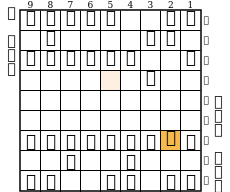

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+
go byoyomi 1000
lnsgk2nl/1r4gs1/pppppp2p/6p2/9/9/PPSPPPP+bP/2G2S3/LN2KG1NL b B3Pr 23
info string 9g9f  : 0.00613
info string 8g8f  : 0.00132
info string 6g6f  : 0.01840
info string 5g5f  : 0.01340
info string 4g4f  : 0.00702
info string 3g3f  : 0.01343
info string 1g1f  : 0.00181
info string 9i9h  : 0.00003
info string 1i1h  : 0.00067
info string 7g8f  : 0.00754
info string 7g7f  : 0.01408
info string 7g6f  : 0.04387
info string 7g8h  : 0.00397
info string 7g6h  : 0.01119
info string 4h3i  : 0.04095
info string 7h8h  : 0.00043
info string 7h6h  : 0.00054
info string 7h7i  : 0.00089
info string 4i5h  : 0.02466
info string 4i3h  : 0.06259
info string 4i3i  : 0.15171
info string 5i6h  : 0.02952
info string 5i5h  : 0.03928
info string 5i6i  : 0.01823
info string B*4a  : 0.00095
info string B*3a  : 0.00001
info string B*9b  : 0.00000
info string P*7b  : 0.0

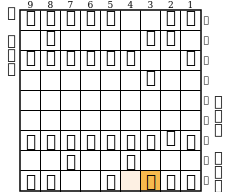

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i
go byoyomi 1000
info currmove R*2f
info time 1 depth 1 nodes 4 score cp 3901 pv R*2f
info currmove R*2f
info time 1 depth 1 nodes 96 score cp 4006 pv 2b3c
info currmove 2b3c
info time 3 depth 2 nodes 292 score cp 3996 pv 2b3c 3i4i
info currmove R*2f
info currmove 2b3c
info time 20 depth 3 nodes 14435 score cp 3996 pv 2b3c B*1h R*2b
info currmove 2b3c
info time 29 depth 3 nodes 23335 score cp 4001 pv 6a5b 3i4i 2b3c
info currmove 6a5b
info time 61 depth 4 nodes 52049 score cp 4000 pv 6a5b 1g1f 2b3c 3i4i
info currmove 2b3c
info time 413 nodes 345729 score cp 4000 pv 6a5b 1g1f 2b3c 3i4i
bestmove 6a5b
24手目


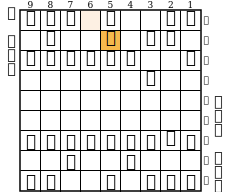

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/9/PPSPPPP+bP/2G2S3/LN2K1GNL b B3Pr 25
info string 9g9f  : 0.00708
info string 8g8f  : 0.00169
info string 6g6f  : 0.01823
info string 5g5f  : 0.01191
info string 4g4f  : 0.00541
info string 3g3f  : 0.01089
info string 1g1f  : 0.00190
info string 9i9h  : 0.00004
info string 1i1h  : 0.00068
info string 7g8f  : 0.00884
info string 7g7f  : 0.01447
info string 7g6f  : 0.04922
info string 7g8h  : 0.00404
info string 7g6h  : 0.01240
info string 7h8h  : 0.00060
info string 7h6h  : 0.00136
info string 7h7i  : 0.00144
info string 3i3h  : 0.01706
info string 3i2h  : 0.00735
info string 3i4i  : 0.01499
info string 5i6h  : 0.02143
info string 5i5h  : 0.09735
info string 5i6i  : 0.01367
info string B*6a  : 0.00003
info string B*4a  : 0.00015
info string B*3a  : 0.00001
info string B*9b  : 0.00000
info string

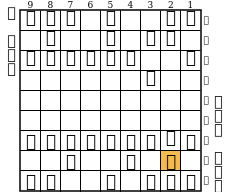

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h
go byoyomi 1000
info time 1 depth 1 nodes 88 score cp 4011 pv 2g2f
info currmove 2g2f
info time 3 depth 2 nodes 286 score cp 4001 pv 2g2f 3i4i
info currmove 2g2f
info time 20 depth 3 nodes 14875 score cp 4006 pv 2g2f 3i4i 2b3c
info currmove 2g2f
info currmove 2g2f
info time 36 depth 4 nodes 31951 score cp 4001 pv 2g2f 3i4i 2b3c 4i5h
info currmove 2g2f
info time 163 nodes 181130 score cp 4001 pv 2g2f 3i4i 2b3c 4i5h
bestmove 2g2f
26手目


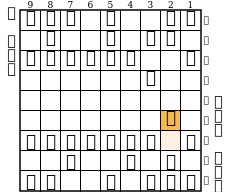

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/7+b1/PPSPPPP1P/2G2S1P1/LN2K1GNL b B2Pr 27
info string 9g9f  : 0.01226
info string 8g8f  : 0.00217
info string 6g6f  : 0.03171
info string 5g5f  : 0.01298
info string 4g4f  : 0.01051
info string 3g3f  : 0.01623
info string 1g1f  : 0.00196
info string 2h2g  : 0.02331
info string 9i9h  : 0.00006
info string 1i1h  : 0.00040
info string 7g8f  : 0.01366
info string 7g7f  : 0.03171
info string 7g6f  : 0.07416
info string 7g8h  : 0.00621
info string 7g6h  : 0.01510
info string 7h8h  : 0.00069
info string 7h6h  : 0.00081
info string 7h7i  : 0.00172
info string 3i3h  : 0.03037
info string 3i4i  : 0.00890
info string 5i6h  : 0.04179
info string 5i5h  : 0.11727
info string 5i6i  : 0.02413
info string 5i4i  : 0.23933
info string B*6a  : 0.00005
info string B*4a  : 0.00019
info string B*3a  : 0.000

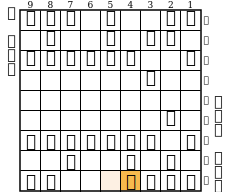

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i
go byoyomi 1000
info currmove 2b3c
info time 1 depth 1 nodes 4 score cp 4019 pv 2b3c
info currmove 2b3c
info currmove 2b3c
info time 4 depth 2 nodes 276 score cp 4016 pv 2b3c 4i5i
info currmove 2b3c
info time 4 depth 2 nodes 370 score cp 5559 pv R*6i 4i5h
info currmove R*6i
info time 11 depth 3 nodes 4974 score cp 5727 pv R*6i 4h5i 6i8i+
info currmove 2b3c
info currmove R*6i
info time 24 depth 4 nodes 15703 score cp 6955 pv R*6i 4i5h 6i8i+ 5h6h
info currmove R*6i
info time 211 nodes 184300 score cp 6955 pv R*6i 4i5h 6i8i+ 5h6h
bestmove R*6i
28手目


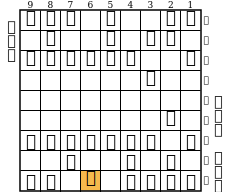

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/7+b1/PPSPPPP1P/2G2S1P1/LN1r1KGNL b B2P 29
info string 4h5i  : 0.00851
info string 4i5h  : 0.03549
info string 4i3h  : 0.41629
info string B*5i  : 0.06108
bestmove 4i3h
29手目


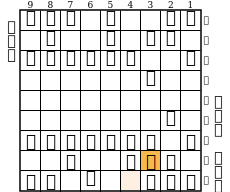

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h
go byoyomi 1000
info currmove 6i8i+
info time 3 depth 1 nodes 4 score cp 5549 pv 6i8i+
info currmove 6i8i+
info currmove 6i8i+
info time 6 depth 2 nodes 216 score cp 6784 pv 6i8i+ P*7i
info currmove 6i8i+
info currmove 6i8i+
info time 17 depth 3 nodes 6825 score cp 5549 pv 6i8i+ 2h2g 2f2e
info currmove 6i8i+
info currmove 6i8i+
info time 42 depth 4 nodes 23869 score cp 6791 pv 6i8i+ 7h8h 8i9i 3i4i
info currmove 6i8i+
info time 126 nodes 87694 score cp 6791 pv 6i8i+ 7h8h 8i9i 3i4i
bestmove 6i8i+
30手目


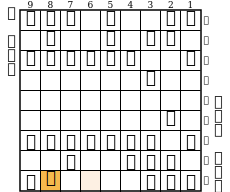

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/7+b1/PPSPPPP1P/2G2SKP1/L+r4GNL b B2Pn 31
info string 9g9f  : 0.00391
info string 8g8f  : 0.00594
info string 6g6f  : 0.01628
info string 5g5f  : 0.00894
info string 4g4f  : 0.00594
info string 3g3f  : 0.01467
info string 1g1f  : 0.00375
info string 2h2g  : 0.04813
info string 9i9h  : 0.00095
info string 1i1h  : 0.00011
info string 7g8f  : 0.00715
info string 7g7f  : 0.01099
info string 7g6f  : 0.01735
info string 7g8h  : 0.00426
info string 7g6h  : 0.01162
info string 4h5i  : 0.00315
info string 7h8h  : 0.12416
info string 7h6h  : 0.20478
info string 7h7i  : 0.05137
info string 3i4i  : 0.00012
info string B*6a  : 0.00003
info string B*4a  : 0.00010
info string B*3a  : 0.00001
info string B*9b  : 0.00000
info string P*7b  : 0.00592
info string B*7b  : 0.00002
info 

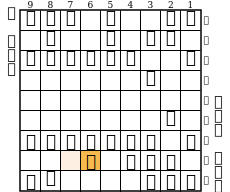

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h
go byoyomi 1000
info currmove 8i9i
info time 6 depth 1 nodes 4 score cp 6801 pv 8i9i
info currmove 8i9i
info currmove 8i9i
info time 12 depth 2 nodes 269 score cp 6811 pv 8i9i 7g8f
info currmove 8i9i
info currmove 8i9i
info time 30 depth 3 nodes 10165 score cp 6801 pv 8i9i 2h2g 2f2e
info currmove 8i9i
info currmove 8i9i
info time 57 depth 4 nodes 29070 score cp 6811 pv 8i9i 2h2g 2f2e 7g8f
info currmove 8i9i
info time 116 depth 4 nodes 67490 score cp 6852 pv N*6e B*2d 2b3c 2d4f
info time 191 nodes 134846 score cp 6852 pv N*6e B*2d 2b3c 2d4f
bestmove N*6e
32手目


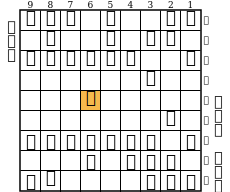

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/3n5/7+b1/PPSPPPP1P/3G1SKP1/L+r4GNL b B2P 33
info string 9g9f  : 0.00037
info string 8g8f  : 0.00088
info string 6g6f  : 0.01588
info string 5g5f  : 0.00352
info string 4g4f  : 0.00093
info string 3g3f  : 0.00231
info string 1g1f  : 0.00087
info string 2h2g  : 0.01097
info string 9i9h  : 0.00025
info string 1i1h  : 0.00005
info string 7g8f  : 0.07501
info string 7g7f  : 0.06881
info string 7g6f  : 0.60073
info string 7g8h  : 0.03279
info string 4h5i  : 0.00024
info string 6h7h  : 0.00301
info string 6h5h  : 0.00426
info string 6h6i  : 0.00008
info string 3i4i  : 0.00006
info string B*6a  : 0.00002
info string B*4a  : 0.00003
info string B*3a  : 0.00000
info string B*9b  : 0.00000
info string P*7b  : 0.00192
info string B*7b  : 0.00001
info string B*6b  : 0.

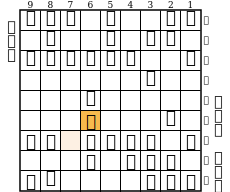

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f
go byoyomi 1000
info currmove 6e7g+
info time 2 depth 1 nodes 3 score cp 4102 pv 6e7g+
info time 2 depth 1 nodes 57 score cp 5341 pv 8i9i
info time 2 depth 1 nodes 61 score cp 5538 pv 6c6d
info currmove 6c6d
info time 5 depth 2 nodes 213 score cp 6153 pv 6c6d 6f6e
info currmove 6e7g+
info time 5 depth 2 nodes 326 score cp 6933 pv 6e7g+ 6f7g
info currmove 6c6d
info time 10 depth 3 nodes 2882 score cp 5538 pv 6c6d 2h2g 2f2e
info currmove 6e7g+
info currmove 6c6d
info time 38 depth 4 nodes 20258 score cp 6368 pv 6c6d P*7b 7a7b 6f6e
info currmove 6e7g+
info time 51 depth 4 nodes 29020 score cp 6966 pv 6e7g+ 6f7g 8i9i 7g8f
info time 79 depth 4 nodes 49563 score cp 7227 pv 6e5g+ 6f5g 8i9i B*7e
info time 187 nodes 129564 score cp 7227 pv 6e5g+ 6f5g 8i9i B*7e
bestmove 6e5g+
34手目


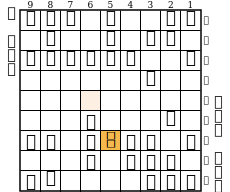

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/3S3+b1/PP1P+nPP1P/3G1SKP1/L+r4GNL b B2Pp 35
info string 9g9f  : 0.00001
info string 8g8f  : 0.00001
info string 4g4f  : 0.00005
info string 3g3f  : 0.00040
info string 1g1f  : 0.00002
info string 2h2g  : 0.00046
info string 9i9h  : 0.00001
info string 1i1h  : 0.00000
info string 6f7e  : 0.00024
info string 6f6e  : 0.00017
info string 6f5e  : 0.00017
info string 6f7g  : 0.00011
info string 6f5g  : 0.49920
info string 4h5g  : 0.24075
info string 4h5i  : 0.00013
info string 6h7g  : 0.00036
info string 6h5g  : 0.24999
info string 6h7h  : 0.00043
info string 6h5h  : 0.00001
info string 6h6i  : 0.00059
info string 3i4i  : 0.00000
info string B*6a  : 0.00000
info string B*4a  : 0.00000
info string B*3a  : 0.00000
info string B*9b  : 0.00000
info stri

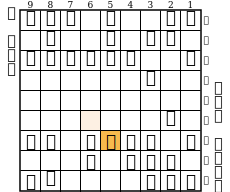

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g
go byoyomi 1000
info currmove 8i9i
info time 2 depth 1 nodes 4 score cp 5546 pv 8i9i
info currmove 8i9i
info currmove 8i9i
info time 5 depth 2 nodes 289 score cp 5636 pv 8i9i B*7e
info currmove 8i9i
info currmove 8i9i
info time 13 depth 3 nodes 7658 score cp 5546 pv 8i9i 2h2g 2f2e
info currmove 8i9i
info currmove 8i9i
info time 47 depth 4 nodes 32011 score cp 5636 pv 8i9i 2h2g 2f2e B*7e
info currmove 8i9i
info time 173 nodes 134356 score cp 5636 pv 8i9i 2h2g 2f2e B*7e
bestmove 8i9i
36手目


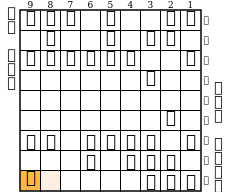

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/7+b1/PP1PSPP1P/3G1SKP1/+r5GNL b BN2Plp 37
info string 9g9f  : 0.00207
info string 8g8f  : 0.00259
info string 6g6f  : 0.01018
info string 4g4f  : 0.02402
info string 3g3f  : 0.01974
info string 1g1f  : 0.00231
info string 2h2g  : 0.06308
info string 1i1h  : 0.00011
info string 5g6f  : 0.02692
info string 5g5f  : 0.01324
info string 5g4f  : 0.04604
info string 4h5i  : 0.00135
info string 6h7g  : 0.00249
info string 6h7h  : 0.01977
info string 6h5h  : 0.01203
info string 6h6i  : 0.00301
info string 3i4i  : 0.00142
info string B*6a  : 0.00005
info string B*4a  : 0.00026
info string B*3a  : 0.00001
info string B*9b  : 0.00001
info string P*7b  : 0.02197
info string B*7b  : 0.00002
info string B*6b  : 0.00000
info string B*4b  : 0.00003
i

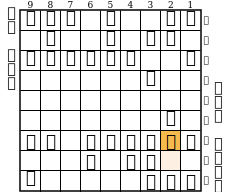

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g
go byoyomi 1000
info time 3 depth 1 nodes 96 score cp 5546 pv 2f2e
info currmove 2f2e
info time 6 depth 2 nodes 366 score cp 5636 pv 2f2e B*7e
info currmove 2f2e
info time 15 depth 3 nodes 7633 score cp 5636 pv 2f2e B*1f 2e3e
info currmove 2f2e
info currmove 2f2e
info time 130 depth 4 nodes 114414 score cp 5741 pv 2f2e 3h2h 9i8h P*7b
info currmove 2f2e
info time 501 nodes 492747 score cp 5636 pv 2f2e 3h2h 9i8h P*7b
bestmove 2f2e
38手目


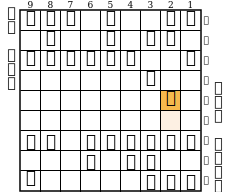

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/7+b1/9/PP1PSPPPP/3G1SK2/+r5GNL b BN2Plp 39
info string 9g9f  : 0.00222
info string 8g8f  : 0.00295
info string 6g6f  : 0.01043
info string 4g4f  : 0.01971
info string 3g3f  : 0.02717
info string 2g2f  : 0.01721
info string 1g1f  : 0.00951
info string 1i1h  : 0.00017
info string 5g6f  : 0.03062
info string 5g5f  : 0.01199
info string 5g4f  : 0.03918
info string 4h5i  : 0.00086
info string 6h7g  : 0.00296
info string 6h7h  : 0.02378
info string 6h5h  : 0.00791
info string 6h6i  : 0.00290
info string 3i2h  : 0.05470
info string 3i4i  : 0.00140
info string 3h2h  : 0.04363
info string B*6a  : 0.00005
info string B*4a  : 0.00024
info string B*3a  : 0.00001
info string B*9b  : 0.00001
info string P*7b  : 0.02050
info string B*7b  : 

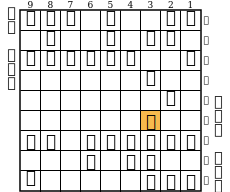

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f
go byoyomi 1000
info currmove 2e3f
info time 0 depth 1 nodes 4 score cp 5436 pv 2e3f
info currmove 2e3e
info time 0 depth 1 nodes 5 score cp 5636 pv 2e3e
info currmove 2e3f
info time 1 depth 2 nodes 291 score cp 7418 pv 2e3f 3g3f
info currmove 2e3e
info currmove 2e3f
info time 13 depth 3 nodes 12769 score cp 6166 pv 2e3f P*7b 3f5d
info currmove 2e3e
info currmove 2e3f
info time 55 depth 4 nodes 57341 score cp 7720 pv 2e3f P*7b 3f2g 3h2g
info currmove 2e3f
info time 329 nodes 331160 score cp 7720 pv 2e3f P*7b 3f2g 3h2g
bestmove 2e3f
40手目


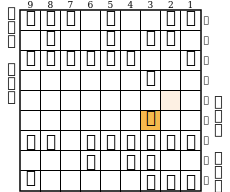

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/6+b2/PP1PSPPPP/3G1SK2/+r5GNL b N2Pblp 41
info string 9g9f  : 0.00006
info string 8g8f  : 0.00004
info string 6g6f  : 0.00049
info string 4g4f  : 0.00111
info string 3g3f  : 0.96710
info string 2g2f  : 0.00006
info string 1g1f  : 0.00021
info string 1i1h  : 0.00001
info string 5g6f  : 0.00060
info string 5g5f  : 0.00043
info string 5g4f  : 0.00386
info string 4h5i  : 0.00005
info string 6h7g  : 0.00010
info string 6h7h  : 0.00066
info string 6h5h  : 0.00011
info string 6h6i  : 0.00011
info string 3i2h  : 0.00384
info string 3i4i  : 0.00072
info string 3h2h  : 0.00198
info string P*7b  : 0.00040
info string N*3c  : 0.00000
info string N*2c  : 0.00001
info string N*9d  : 0.00001
info string N*8d  : 0.00000
info strin

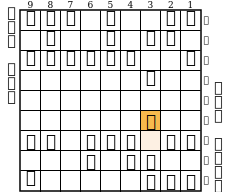

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f
go byoyomi 1000
info currmove B*7f
info time 2 depth 1 nodes 4 score cp 5336 pv B*7f
info currmove B*7f
info time 2 depth 1 nodes 141 score cp 5631 pv 9i9g
info currmove 9i9g
info time 6 depth 2 nodes 459 score cp 5611 pv 9i9g 6h7h
info currmove B*7f
info time 6 depth 2 nodes 790 score cp 5735 pv B*6d 4h3g
info currmove 9i9g
info time 21 depth 3 nodes 13183 score cp 5621 pv 9i9g 6h7h 2b3c
info currmove B*6d
info currmove 9i9g
info time 127 depth 4 nodes 108045 score cp 5622 pv 9i9g 6h7h L*8d N*7i
info currmove B*6d
info time 208 depth 4 nodes 175336 score cp 5721 pv B*6d 2i3g 6d9g+ 6h7h
info time 501 nodes 460361 score cp 5621 pv B*6d 2i3g 6d9g+ 6h7h
bestmove B*6d
42手目


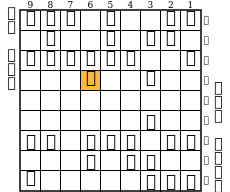

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/3b2p2/9/6P2/PP1PSP1PP/3G1SK2/+r5GNL b BN2Plp 43
info string 3f3e  : 0.01359
info string 9g9f  : 0.00186
info string 8g8f  : 0.00171
info string 6g6f  : 0.05285
info string 4g4f  : 0.00938
info string 2g2f  : 0.00125
info string 1g1f  : 0.00098
info string 1i1h  : 0.00012
info string 2i3g  : 0.03062
info string 5g6f  : 0.08278
info string 5g5f  : 0.00921
info string 5g4f  : 0.03285
info string 4h3g  : 0.02525
info string 4h5i  : 0.00043
info string 6h7g  : 0.00137
info string 6h7h  : 0.01971
info string 6h5h  : 0.01193
info string 6h6i  : 0.00216
info string 3i2h  : 0.03811
info string 3i4i  : 0.00319
info string B*6a  : 0.00006
info string B*4a  : 0.00030
info string B*3a  : 0.00001
info string B*9b  : 0.00001

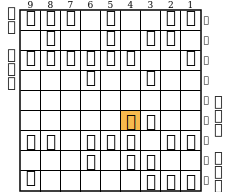

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f
go byoyomi 1000
info currmove 6d9g+
info time 2 depth 1 nodes 4 score cp 5840 pv 6d9g+
info currmove 6d9g+
info currmove 6d9g+
info time 3 depth 2 nodes 307 score cp 5827 pv 6d9g+ 6h7h
info currmove 6d9g+
info time 4 depth 2 nodes 694 score cp 7240 pv 6d4f 4g4f
info currmove 6d9g+
info time 22 depth 3 nodes 17007 score cp 5835 pv 6d9g+ P*7d 7a7b
info currmove 6d4f
info time 30 depth 3 nodes 24237 score cp 7465 pv 6d4f P*7b 4f5g
info currmove 6d4f
info time 68 depth 4 nodes 59551 score cp 7681 pv 6d4f 4g4f B*7f 8g8f
info currmove 6d4f
info time 365 nodes 314437 score cp 7681 pv 6d4f 4g4f B*7f 8g8f
bestmove 6d4f
44手目


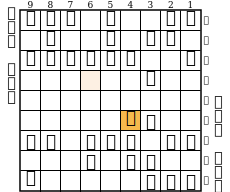

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/5bP2/PP1PSP1PP/3G1SK2/+r5GNL b N2Pblp 45
info string 3f3e  : 0.00031
info string 9g9f  : 0.00002
info string 8g8f  : 0.00002
info string 6g6f  : 0.00059
info string 4g4f  : 0.43110
info string 2g2f  : 0.00010
info string 1g1f  : 0.00004
info string 1i1h  : 0.00001
info string 2i3g  : 0.00458
info string 5g6f  : 0.00181
info string 5g5f  : 0.00342
info string 5g4f  : 0.52574
info string 4h3g  : 0.00332
info string 4h5i  : 0.00003
info string 6h7g  : 0.00014
info string 6h7h  : 0.00191
info string 6h5h  : 0.00315
info string 6h6i  : 0.00026
info string 3i2h  : 0.00129
info string 3i4i  : 0.00112
info string P*7b  : 0.00065
info string N*3c  : 0.00000
info string N*2c  : 0.00001
info string N*9d  

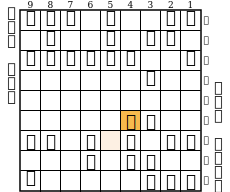

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f
go byoyomi 1000
info currmove B*7i
info time 2 depth 1 nodes 4 score cp 5335 pv B*7i
info currmove B*7i
info time 2 depth 1 nodes 141 score cp 5630 pv 9i9g
info currmove 9i9g
info time 5 depth 2 nodes 463 score cp 5610 pv 9i9g 6h7h
info currmove B*7i
info time 5 depth 2 nodes 676 score cp 5630 pv B*7i B*8f
info time 16 depth 2 nodes 10179 score cp 5640 pv P*2h 2i3g
info currmove 9i9g
info time 30 depth 3 nodes 24418 score cp 5620 pv 9i9g 6h7h 2b3c
info currmove P*2h
info currmove 9i9g
info time 122 depth 4 nodes 109131 score cp 5621 pv 9i9g 6h7h L*8d N*7i
info currmove P*2h
info time 195 depth 4 nodes 173682 score cp 5740 pv P*2h B*1e 2b3c 2i3g
info time 501 nodes 470117 score cp 5620 pv P*2h B*1e 2b3c 2i3g
bestmove P*2h
46手目


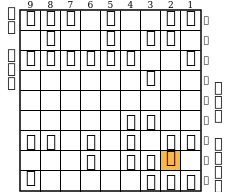

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/5SP2/PP1P1P1PP/3G1SKp1/+r5GNL b BN2Pbl 47
info string 3f3e  : 0.00048
info string 9g9f  : 0.00003
info string 8g8f  : 0.00004
info string 6g6f  : 0.00011
info string 2g2f  : 0.00000
info string 1g1f  : 0.00002
info string 1i1h  : 0.00001
info string 2i3g  : 0.00613
info string 4f5e  : 0.00072
info string 4f4e  : 0.00033
info string 4f3e  : 0.00000
info string 4f5g  : 0.00003
info string 4f3g  : 0.00063
info string 4h5g  : 0.00013
info string 4h3g  : 0.00024
info string 4h5i  : 0.00002
info string 6h7g  : 0.00002
info string 6h5g  : 0.00009
info string 6h7h  : 0.00015
info string 6h5h  : 0.00010
info string 6h6i  : 0.00004
info string 3i2h  : 0.04718
info string 3i4i  : 0.00060
info st

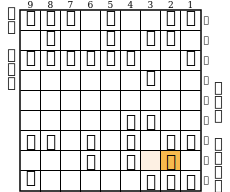

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h
go byoyomi 1000
info currmove B*7i
info time 0 depth 1 nodes 3 score cp 5125 pv B*7i
info time 1 depth 1 nodes 134 score cp 5420 pv 9i9g
info currmove 9i9g
info time 2 depth 2 nodes 455 score cp 5400 pv 9i9g 6h7h
info currmove B*7i
info time 2 depth 2 nodes 668 score cp 5420 pv B*7i B*8f
info currmove 9i9g
info time 24 depth 3 nodes 24439 score cp 5410 pv 9i9g 6h7h 2b3c
info currmove B*7i
info currmove 9i9g
info time 88 depth 4 nodes 91169 score cp 5411 pv 9i9g 6h7h L*8d N*7i
info currmove B*7i
info time 144 depth 4 nodes 139840 score cp 5510 pv B*7i 6h7g 7i9g+ 7g7h
info time 501 nodes 488767 score cp 5410 pv B*7i 6h7g 7i9g+ 7g7h
bestmove B*7i
48手目


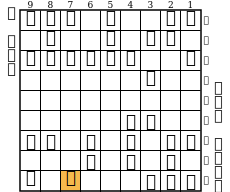

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/5SP2/PP1P1P1PP/3G1S1K1/+r1b3GNL b BN3Pl 49
info string 3f3e  : 0.00709
info string 9g9f  : 0.00038
info string 8g8f  : 0.00047
info string 6g6f  : 0.00304
info string 2g2f  : 0.00018
info string 1g1f  : 0.00044
info string 1i1h  : 0.00049
info string 2i3g  : 0.00347
info string 4f5e  : 0.00945
info string 4f4e  : 0.00808
info string 4f3e  : 0.00009
info string 4f5g  : 0.00287
info string 4f3g  : 0.00381
info string 4h5g  : 0.00306
info string 4h3g  : 0.00471
info string 4h5i  : 0.00107
info string 6h7g  : 0.00039
info string 6h5g  : 0.02673
info string 6h7h  : 0.09955
info string 6h5h  : 0.43749
info string 6h6i  : 0.07653
info string 3i3h  : 0.00631
info string 3i4i  : 0.00

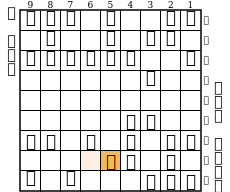

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h
go byoyomi 1000
info currmove 7i9g+
info time 1 depth 1 nodes 4 score cp 5525 pv 7i9g+
info currmove 7i9g+
info currmove 7i9g+
info time 3 depth 2 nodes 372 score cp 5615 pv 7i9g+ B*6e
info currmove 7i9g+
info currmove 7i9g+
info time 19 depth 3 nodes 16286 score cp 5528 pv 7i9g+ 3f3e 3d3e
info currmove 7i9g+
info currmove 7i9g+
info time 108 depth 4 nodes 89397 score cp 5720 pv 7i9g+ 4h5i 9g8g 3i4i
info currmove 7i9g+
info time 501 nodes 440772 score cp 5528 pv 7i9g+ 4h5i 9g8g 3i4i
bestmove 7i9g+
50手目


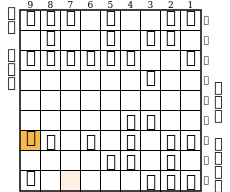

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+
go byoyomi 1000
lns1k2nl/1r2g1gs1/pppppp2p/6p2/9/5SP2/+bP1P1P1PP/4GS1K1/+r5GNL b BN3Plp 51
info string 3f3e  : 0.02091
info string 8g8f  : 0.00425
info string 6g6f  : 0.00339
info string 2g2f  : 0.00069
info string 1g1f  : 0.00145
info string 1i1h  : 0.00119
info string 2i3g  : 0.01123
info string 4f5e  : 0.02551
info string 4f4e  : 0.01606
info string 4f3e  : 0.00024
info string 4f5g  : 0.00441
info string 4f3g  : 0.00882
info string 4h5g  : 0.01598
info string 4h3g  : 0.02043
info string 4h5i  : 0.00135
info string 5h5g  : 0.01361
info string 5h6h  : 0.02347
info string 5h5i  : 0.00713
info string 3i3h  : 0.01194
info string 3i4i  : 0.00046
info string 2h3g  : 0.00329
info string 2h3h  : 0.00980
info string 2h

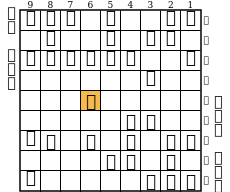

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e
go byoyomi 1000
info currmove 9g8g
info time 1 depth 1 nodes 4 score cp 5765 pv 9g8g
info currmove 9g8g
info currmove 9g8g
info time 1 depth 2 nodes 325 score cp 5764 pv 9g8g 6g6f
info currmove 9g8g
info time 2 depth 2 nodes 942 score cp 5765 pv 9i6i 4h5i
info time 3 depth 2 nodes 1095 score cp 6790 pv 6c6d 6g6f
info currmove 9g8g
info time 14 depth 3 nodes 12621 score cp 5769 pv 9g8g 6g6f 2b3c
info currmove 6c6d
info currmove 9g8g
info time 100 depth 4 nodes 79593 score cp 5859 pv 9g8g B*1e 2b3c 6g6f
info currmove 6c6d
info time 145 depth 4 nodes 116215 score cp 6714 pv 6c6d 6e5c+ 5b5c B*2d
info time 501 nodes 416536 score cp 5769 pv 6c6d 6e5c+ 5b5c B*2d
bestmove 6c6d
52手目


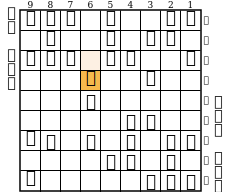

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d
go byoyomi 1000
lns1k2nl/1r2g1gs1/ppp1pp2p/3p2p2/3N5/5SP2/+bP1P1P1PP/4GS1K1/+r5GNL b B3Plp 53
info string 3f3e  : 0.00638
info string 8g8f  : 0.00029
info string 6g6f  : 0.01251
info string 2g2f  : 0.00014
info string 1g1f  : 0.00066
info string 1i1h  : 0.00061
info string 6e7c  : 0.01655
info string 6e7c+ : 0.09856
info string 6e5c  : 0.03400
info string 6e5c+ : 0.46021
info string 2i3g  : 0.00616
info string 4f5e  : 0.02376
info string 4f4e  : 0.00393
info string 4f3e  : 0.00008
info string 4f5g  : 0.00151
info string 4f3g  : 0.00330
info string 4h5g  : 0.00445
info string 4h3g  : 0.01212
info string 4h5i  : 0.00063
info string 5h5g  : 0.00276
info string 5h6h  : 0.00232
info string 5h5i  : 0.00205
i

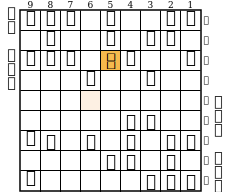

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+
go byoyomi 1000
info currmove 5b5c
info time 0 depth 1 nodes 4 score cp 6776 pv 5b5c
info currmove 5b5c
info currmove 5b5c
info time 0 depth 2 nodes 321 score cp 6866 pv 5b5c B*7f
info currmove 5b5c
info currmove 5b5c
info time 7 depth 3 nodes 8545 score cp 6779 pv 5b5c 3f3e 3d3e
info currmove 5b5c
info currmove 5b5c
info time 71 depth 4 nodes 68627 score cp 6986 pv 5b5c 4f5g P*5f 5g6h
info currmove 5b5c
info time 100 nodes 88721 score cp 6986 pv 5b5c 4f5g P*5f 5g6h
bestmove 5b5c
54手目


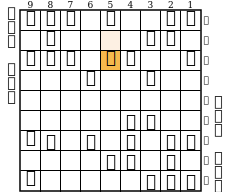

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c
go byoyomi 1000
lns1k2nl/1r4gs1/ppp1gp2p/3p2p2/9/5SP2/+bP1P1P1PP/4GS1K1/+r5GNL b B4Pnlp 55
info string 3f3e  : 0.01844
info string 8g8f  : 0.00167
info string 6g6f  : 0.00305
info string 2g2f  : 0.00056
info string 1g1f  : 0.00122
info string 1i1h  : 0.00038
info string 2i3g  : 0.01974
info string 4f5e  : 0.07206
info string 4f4e  : 0.03732
info string 4f3e  : 0.00049
info string 4f5g  : 0.00628
info string 4f3g  : 0.01939
info string 4h5g  : 0.00857
info string 4h3g  : 0.03374
info string 4h5i  : 0.00156
info string 5h5g  : 0.01019
info string 5h6h  : 0.00963
info string 5h5i  : 0.00862
info string 3i3h  : 0.01557
info string 3i4i  : 0.00028
info string 2h3g  : 0.00339
info string 2h3h  : 0

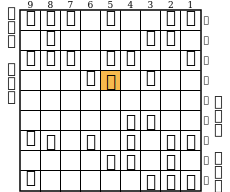

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d
go byoyomi 1000
info currmove 5c5d
info time 1 depth 1 nodes 4 score cp 6986 pv 5c5d
info currmove 5c5d
info currmove 5c5d
info time 1 depth 2 nodes 396 score cp 7076 pv 5c5d B*7f
info currmove 5c5d
info currmove 5c5d
info time 17 depth 3 nodes 17264 score cp 6988 pv 5c5d P*5e 5d6e
info currmove 5c5d
info currmove 5c5d
info time 93 depth 4 nodes 90095 score cp 7196 pv 5c5d 4f5g P*5f 5g6h
info currmove 5c5d
info time 501 nodes 433657 score cp 6988 pv 5c5d 4f5g P*5f 5g6h
bestmove 5c5d
56手目


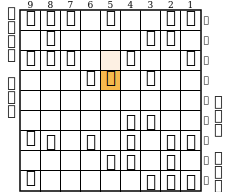

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d
go byoyomi 1000
lns1k2nl/1r4gs1/ppp2p2p/3pg1p2/9/5SP2/+bP1P1P1PP/4GS1K1/+r5GNL b B3Pnl2p 57
info string 3f3e  : 0.01700
info string 8g8f  : 0.00137
info string 6g6f  : 0.00481
info string 2g2f  : 0.00037
info string 1g1f  : 0.00084
info string 1i1h  : 0.00047
info string 2i3g  : 0.01240
info string 4f5e  : 0.00354
info string 4f4e  : 0.00386
info string 4f3e  : 0.00024
info string 4f5g  : 0.00514
info string 4f3g  : 0.01017
info string 4h5g  : 0.00566
info string 4h3g  : 0.02019
info string 4h5i  : 0.00077
info string 5h5g  : 0.00650
info string 5h6h  : 0.00404
info string 5h5i  : 0.00250
info string 3i3h  : 0.01433
info string 3i4i  : 0.00030
info string 2h3g  : 0.00188
info strin

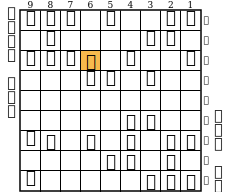

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c
go byoyomi 1000
info currmove 9g8g
info time 1 depth 1 nodes 4 score cp 7281 pv 9g8g
info currmove P*5g
info currmove 9g8g
info time 2 depth 2 nodes 353 score cp 7081 pv 9g8g 6c8e+
info currmove P*5g
info time 2 depth 2 nodes 448 score cp 7306 pv P*5g 5h6h
info currmove 9g8g
info time 22 depth 3 nodes 20076 score cp 7076 pv 9g8g 4f4e 5d5c
info currmove P*5g
info currmove 9g8g
info time 75 depth 4 nodes 65042 score cp 7074 pv 9g8g P*5b 5a4b 6c8e+
info currmove P*5g
info time 105 depth 4 nodes 87806 score cp 7980 pv P*5g 6c5d+ 5g5h+ 4h3g
info time 501 nodes 420272 score cp 7076 pv P*5g 6c5d+ 5g5h+ 4h3g
bestmove P*5g
58手目


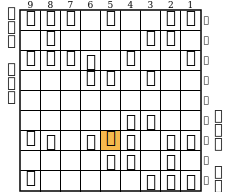

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g
go byoyomi 1000
lns1k2nl/1r4gs1/pppB1p2p/3pg1p2/9/5SP2/+bP1PpP1PP/4GS1K1/+r5GNL b 3Pnlp 59
info string 3f3e  : 0.00023
info string 8g8f  : 0.00002
info string 6g6f  : 0.00008
info string 2g2f  : 0.00003
info string 1g1f  : 0.00002
info string 1i1h  : 0.00001
info string 2i3g  : 0.00012
info string 4f5e  : 0.00024
info string 4f4e  : 0.00028
info string 4f3e  : 0.00001
info string 4f5g  : 0.27126
info string 4f3g  : 0.00014
info string 4h5g  : 0.27634
info string 4h3g  : 0.00056
info string 4h5i  : 0.00020
info string 5h5g  : 0.29992
info string 5h6h  : 0.02441
info string 5h5i  : 0.04033
info string 3i3h  : 0.00010
info string 3i4i  : 0.00003
info string 6c8a  : 0.00009
i

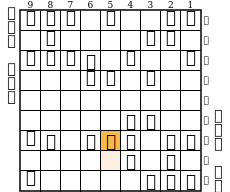

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g
go byoyomi 1000
info currmove 9g8g
info time 1 depth 1 nodes 4 score cp 7086 pv 9g8g
info currmove 9g8g
info currmove 9g8g
info time 1 depth 2 nodes 344 score cp 6886 pv 9g8g 6c8e+
info currmove 9g8g
info currmove 9g8g
info time 20 depth 3 nodes 18762 score cp 6881 pv 9g8g 4f4e 5d5c
info currmove 9g8g
info currmove 9g8g
info time 62 depth 4 nodes 52055 score cp 6879 pv 9g8g P*5b 5a4b 6c8e+
info currmove 9g8g
info time 88 depth 4 nodes 79174 score cp 7271 pv 5d5c 6c4e+ L*4d 4e3d
info time 501 nodes 431953 score cp 6881 pv 5d5c 6c4e+ L*4d 4e3d
bestmove 5d5c
60手目


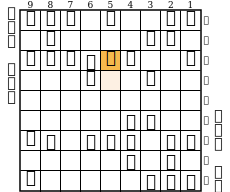

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c
go byoyomi 1000
lns1k2nl/1r4gs1/pppBgp2p/3p2p2/9/5SP2/+bP1PGP1PP/5S1K1/+r5GNL b 4Pnlp 61
info string 3f3e  : 0.01026
info string 8g8f  : 0.00082
info string 6g6f  : 0.00877
info string 2g2f  : 0.00140
info string 1g1f  : 0.00112
info string 1i1h  : 0.00056
info string 2i3g  : 0.00821
info string 4f5e  : 0.02240
info string 4f4e  : 0.01173
info string 4f3e  : 0.00032
info string 4f3g  : 0.00554
info string 4h3g  : 0.01418
info string 4h5i  : 0.00034
info string 5g6f  : 0.00935
info string 5g5f  : 0.00789
info string 5g5h  : 0.00736
info string 3i3h  : 0.00847
info string 3i4i  : 0.00087
info string 6c8a  : 0.01105
info string 6c8a+ : 0.03869
info string 6c4a  : 0

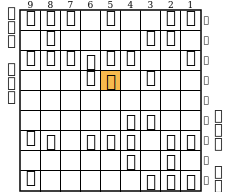

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d
go byoyomi 1000
info currmove 5c6c
info time 0 depth 1 nodes 3 score cp 10561 pv 5c6c
info currmove 5c6c
info time 1 depth 2 nodes 301 score cp 10751 pv 5c6c 5g5h
info currmove 5c6c
info currmove 5c6c
info time 11 depth 3 nodes 10787 score cp 10566 pv 5c6c 4f4e 2b3c
info currmove 5c6c
info currmove 5c6c
info time 37 depth 4 nodes 35741 score cp 10761 pv 5c6c 4f4e P*5f 5g5h
info currmove 5c6c
info time 501 nodes 422510 score cp 10566 pv 5c6c 4f4e P*5f 5g5h
bestmove 5c6c
62手目


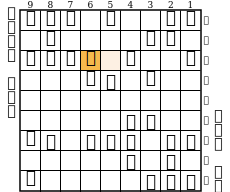

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c
go byoyomi 1000
lns1k2nl/1r4gs1/pppg1p2p/3pP1p2/9/5SP2/+bP1PGP1PP/5S1K1/+r5GNL b 3Pbnlp 63
info string 5d5c  : 0.00673
info string 5d5c+ : 0.28177
info string 3f3e  : 0.02523
info string 8g8f  : 0.00294
info string 6g6f  : 0.02184
info string 2g2f  : 0.00261
info string 1g1f  : 0.00468
info string 1i1h  : 0.00330
info string 2i3g  : 0.02274
info string 4f5e  : 0.06083
info string 4f4e  : 0.04416
info string 4f3e  : 0.00059
info string 4f3g  : 0.02650
info string 4h3g  : 0.06750
info string 4h5i  : 0.00069
info string 5g6f  : 0.02013
info string 5g5f  : 0.01546
info string 5g5h  : 0.01268
info string 3i3h  : 0.02207
info string 3i4i  : 0.00171
info stri

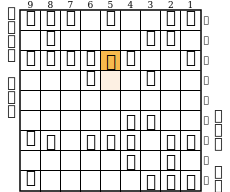

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+
go byoyomi 1000
info currmove 6c5c
info time 3 depth 1 nodes 4 score cp 10781 pv 6c5c
info currmove 6c5c
info currmove 6c5c
info time 7 depth 2 nodes 388 score cp 10971 pv 6c5c 5g5h
info currmove 6c5c
info currmove 6c5c
info time 20 depth 3 nodes 12533 score cp 10784 pv 6c5c 3f3e 3d3e
info currmove 6c5c
info currmove 6c5c
info time 87 depth 4 nodes 80426 score cp 10980 pv 6c5c 4h3g 9i8h 3i3h
info currmove 6c5c
info time 501 nodes 507892 score cp 10784 pv 6c5c 4h3g 9i8h 3i3h
bestmove 6c5c
64手目


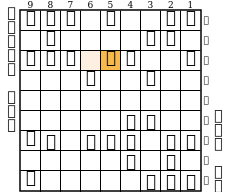

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c
go byoyomi 1000
lns1k2nl/1r4gs1/ppp1gp2p/3p2p2/9/5SP2/+bP1PGP1PP/5S1K1/+r5GNL b 3Pbnl2p 65
info string 3f3e  : 0.01964
info string 8g8f  : 0.00184
info string 6g6f  : 0.01266
info string 2g2f  : 0.00188
info string 1g1f  : 0.00296
info string 1i1h  : 0.00226
info string 2i3g  : 0.02074
info string 4f5e  : 0.04230
info string 4f4e  : 0.06099
info string 4f3e  : 0.00051
info string 4f3g  : 0.02556
info string 4h3g  : 0.04950
info string 4h5i  : 0.00061
info string 5g6f  : 0.02456
info string 5g5f  : 0.01522
info string 5g5h  : 0.01185
info string 3i3h  : 0.02532
info string 3i4i  : 0.00185
info string 2h3g  : 0.00156
info string 2h3h  : 0.0137

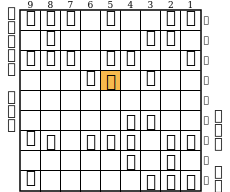

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d
go byoyomi 1000
info currmove 5c5d
info time 7 depth 1 nodes 4 score cp 10991 pv 5c5d
info currmove 5c5d
info currmove 5c5d
info time 12 depth 2 nodes 401 score cp 11181 pv 5c5d 5g5h
info currmove 5c5d
info currmove 5c5d
info time 24 depth 3 nodes 11301 score cp 10993 pv 5c5d P*5e 5d6e
info currmove 5c5d
info currmove 5c5d
info time 75 depth 4 nodes 62712 score cp 11183 pv 5c5d P*5e 5d6e 5g5h
info currmove 5c5d
info time 501 nodes 509198 score cp 10993 pv 5c5d P*5e 5d6e 5g5h
bestmove 5c5d
66手目


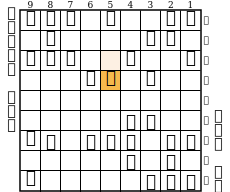

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d
go byoyomi 1000
lns1k2nl/1r4gs1/ppp2p2p/3pg1p2/9/5SP2/+bP1PGP1PP/5S1K1/+r5GNL b 2Pbnl3p 67
info string 3f3e  : 0.01772
info string 8g8f  : 0.00125
info string 6g6f  : 0.03019
info string 2g2f  : 0.00187
info string 1g1f  : 0.00231
info string 1i1h  : 0.00214
info string 2i3g  : 0.02360
info string 4f5e  : 0.00741
info string 4f4e  : 0.02420
info string 4f3e  : 0.00051
info string 4f3g  : 0.02146
info string 4h3g  : 0.04361
info string 4h5i  : 0.00077
info string 5g6f  : 0.02874
info string 5g5f  : 0.01982
info string 5g5h  : 0.01879
info string 3i3h  : 0.02898
info string 3i4i  : 0.00216
info string 2h3g  : 0.00167
info string 2h3h

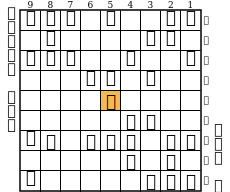

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e
go byoyomi 1000
info currmove 5d6e
info time 4 depth 1 nodes 4 score cp 10993 pv 5d6e
info currmove 5d6e
info currmove 5d6e
info time 8 depth 2 nodes 401 score cp 11183 pv 5d6e 5g5h
info currmove 5d6e
info currmove 5d6e
info time 16 depth 3 nodes 5702 score cp 10992 pv 5d6e 6g6f 6e7f
info currmove 5d6e
info time 20 depth 3 nodes 10837 score cp 10996 pv 5d5c 3f3e 3d3e
info time 24 depth 3 nodes 15083 score cp 11183 pv 5d4d 5g5h 9g8g
info currmove 5d4d
info time 74 depth 4 nodes 77107 score cp 11192 pv 5d4d 1g1f P*5f 5g5h
info currmove 5d6e
info time 305 depth 4 nodes 319023 score cp 11198 pv P*5f 5g6f 5d4d P*7b
info time 502 no

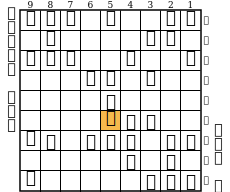

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f
go byoyomi 1000
lns1k2nl/1r4gs1/ppp2p2p/3pg1p2/4P4/4pSP2/+bP1PGP1PP/5S1K1/+r5GNL b Pbnl2p 69
info string 5e5d  : 0.34655
info string 3f3e  : 0.00036
info string 8g8f  : 0.00014
info string 6g6f  : 0.00461
info string 2g2f  : 0.00003
info string 1g1f  : 0.00008
info string 1i1h  : 0.00003
info string 2i3g  : 0.00099
info string 4f4e  : 0.00041
info string 4f3e  : 0.00010
info string 4f3g  : 0.00142
info string 4h3g  : 0.00156
info string 4h5i  : 0.00003
info string 5g6f  : 0.02744
info string 5g5f  : 0.25999
info string 5g5h  : 0.31123
info string 3i3h  : 0.00044
info string 3i4i  : 0.00017
info string 2h3g  : 0.00011
info

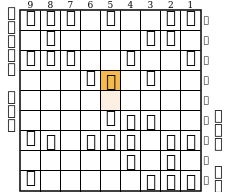

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f 5e5d
go byoyomi 1000
info currmove 5f5g+
info time 4 depth 1 nodes 3 score cp 10771 pv 5f5g+
info time 4 depth 1 nodes 183 score cp 10786 pv 5f5g
info currmove 5f5g+
info time 7 depth 2 nodes 455 score cp 11736 pv 5f5g+ 5d5c+
info currmove 5f5g
info currmove 5f5g+
info time 22 depth 3 nodes 12834 score cp 10981 pv 5f5g+ P*9h 9i9h
info currmove 5f5g
info time 32 depth 3 nodes 23856 score cp 10991 pv 5f5g 5d5c+ 5g5h+
info currmove 5f5g+
info time 118 depth 4 nodes 113420 score cp 12397 pv 5f5g+ 4h3g 5g4h 3i4h
info currmove 5f5g
info time 501 nodes 516243 score cp 10991 pv 5f5g+ 4h3g 5g4h 3i4h
bestmove 5f5g+
70手目


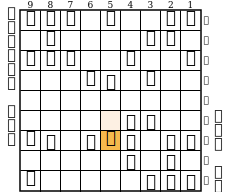

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f 5e5d 5f5g+
go byoyomi 1000
lns1k2nl/1r4gs1/ppp2p2p/3pP1p2/9/5SP2/+bP1P+pP1PP/5S1K1/+r5GNL b GPbgnl2p 71
info string 5d5c  : 0.00921
info string 5d5c+ : 0.10084
info string 3f3e  : 0.00089
info string 8g8f  : 0.00029
info string 6g6f  : 0.00058
info string 2g2f  : 0.00014
info string 1g1f  : 0.00014
info string 1i1h  : 0.00014
info string 2i3g  : 0.00037
info string 4f5e  : 0.00394
info string 4f4e  : 0.00224
info string 4f3e  : 0.00027
info string 4f5g  : 0.37286
info string 4f3g  : 0.00555
info string 4h5g  : 0.38339
info string 4h3g  : 0.01488
info string 4h5i  : 0.00035
info string 3i3h  : 0.00132
info string 3i4i  : 0

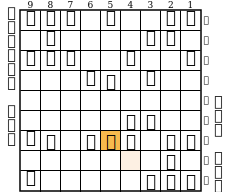

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f 5e5d 5f5g+ 4h5g
go byoyomi 1000
info currmove 9g8g
info time 88 depth 1 nodes 4 score cp 10976 pv 9g8g
info currmove P*5f
info currmove 9g8g
info time 101 depth 2 nodes 559 score cp 9891 pv 9g8g 5d5c+
info currmove P*5f
info time 101 depth 2 nodes 696 score cp 10981 pv P*5f 5g6h
info currmove 9g8g
info time 126 depth 3 nodes 27240 score cp 9901 pv 9g8g 5d5c+ P*5h
info currmove P*5f
info time 136 depth 3 nodes 39321 score cp 10786 pv P*5f P*9h 9i9h
info time 144 depth 3 nodes 49740 score cp 10911 pv G*4i P*9h 9g8g
info time 146 depth 3 nodes 51582 score cp 10976 pv 9i8h 2h3g 8h8g
info currmove 9i8h
info time 291 depth 4 no

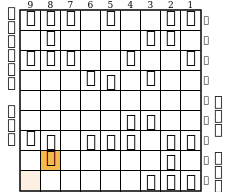

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f 5e5d 5f5g+ 4h5g 9i8h
go byoyomi 1000
lns1k2nl/1r4gs1/ppp2p2p/3pP1p2/9/5SP2/+bP1PSP1PP/1+r5K1/6GNL b G2Pbgnl2p 73
info string 5g6h  : 0.00179
info string 5g4h  : 0.01395
info string 3i4h  : 0.00144
info string 3i3h  : 0.01689
info string 2h3g  : 0.00180
info string P*7h  : 0.00397
info string G*7h  : 0.00495
info string G*6h  : 0.00302
info string G*5h  : 0.00054
info string G*4h  : 0.00343
info string G*3h  : 0.01672
bestmove 3i3h
73手目


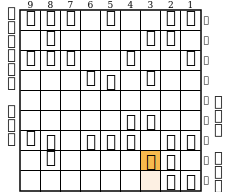

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f 5e5d 5f5g+ 4h5g 9i8h 3i3h
go byoyomi 1000
info time 45 depth 1 nodes 237 score cp 10976 pv 8h8g
info currmove 8h8g
info time 83 depth 2 nodes 558 score cp 10096 pv 8h8g 5d5c+
info time 84 depth 2 nodes 927 score cp 10956 pv B*4i G*6h
info time 84 depth 2 nodes 1089 score cp 10966 pv 8b5b P*7b
info time 85 depth 2 nodes 1422 score cp 10986 pv P*5f 5g6f
info currmove 8h8g
info time 112 depth 3 nodes 13836 score cp 10096 pv 8h8g 5d5c+ 8g6g
info currmove P*5f
info time 122 depth 3 nodes 24503 score cp 10786 pv P*5f P*9h 9g8g
info time 130 depth 3 nodes 34416 score cp 10891 pv B*4i P*9h 8h9h
info currmove B*4i
info time 224 de

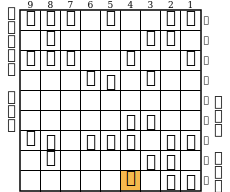

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f 5e5d 5f5g+ 4h5g 9i8h 3i3h B*4i
go byoyomi 1000
lns1k2nl/1r4gs1/ppp2p2p/3pP1p2/9/5SP2/+bP1PSP1PP/1+r4GK1/5b1NL b G2Pgnl2p 75
info string 5d5c  : 0.02615
info string 5d5c+ : 0.22360
info string 3f3e  : 0.00381
info string 8g8f  : 0.00053
info string 6g6f  : 0.00168
info string 2g2f  : 0.00124
info string 1g1f  : 0.00046
info string 1i1h  : 0.00146
info string 2i3g  : 0.00407
info string 4f5e  : 0.01191
info string 4f4e  : 0.00726
info string 4f3e  : 0.00058
info string 4f3g  : 0.01221
info string 5g6f  : 0.00523
info string 5g5f  : 0.00317
info string 5g6h  : 0.00157
info string 5g4h  : 0.02358
info string 3h4h  : 0.09304
i

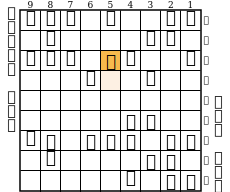

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f 5e5d 5f5g+ 4h5g 9i8h 3i3h B*4i 5d5c+
go byoyomi 1000
info time 0 nodes 0 score mate + pv 4i3h+
bestmove 4i3h+
76手目


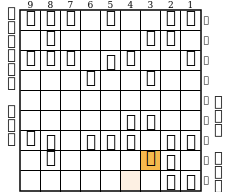

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f 5e5d 5f5g+ 4h5g 9i8h 3i3h B*4i 5d5c+ 4i3h+
go byoyomi 1000
lns1k2nl/1r4gs1/ppp1+Pp2p/3p2p2/9/5SP2/+bP1PSP1PP/1+r4+bK1/7NL b G2P2gnl2p 77
info string 2h1h  : 0.01853
bestmove 2h1h
77手目


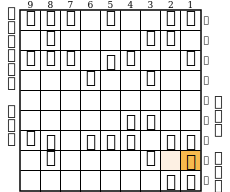

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e 3i4h 6e7f 6i7h 7f5d 8h7g 3a2b 2e2d 2c2d 2h2d P*2h 2d2h P*2g 2h2g 5d2g+ 4i3i 6a5b P*2h 2g2f 5i4i R*6i 4i3h 6i8i+ 7h6h N*6e 7g6f 6e5g+ 6f5g 8i9i 2h2g 2f2e B*3f 2e3f 3g3f B*6d B*4f 6d4f 5g4f P*2h 3h2h B*7i 6h5h 7i9g+ N*6e 6c6d 6e5c+ 5b5c P*5d 5c5d B*6c P*5g 5h5g 5d5c P*5d 5c6c 5d5c+ 6c5c P*5d 5c5d P*5e P*5f 5e5d 5f5g+ 4h5g 9i8h 3i3h B*4i 5d5c+ 4i3h+ 2h1h
go byoyomi 1000
info time 0 nodes 0 score mate + pv 3h2h
bestmove 3h2h
78手目


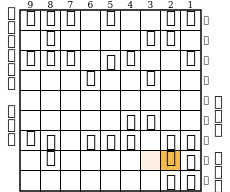

まで78手で後手の勝ち

対局数1 先手勝ち0(0%) 後手勝ち1(100%) 引き分け0

policy_player
勝ち0(0%) 先手勝ち0(0%) 後手勝ち0(0%)

Lesserkai 1.4.2
勝ち1(100%) 先手勝ち0(0%) 後手勝ち1(100%)


In [ ]:
from cshogi import cli

cli.main('/content/python-dlshogi/policy_player.sh', '/content/LesserkaiSrc/Lesserkai/Lesserkai', options1={'modelfile':'/content/python-dlshogi/model/model_policy'})

# 第10章 価値ネットワーク
以下のコードはGitHubからcloneしてモジュールインストールしたコードを使用するため、ここではコードの掲載を省略します。
- [value.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/network/value.py)

## 10.4 学習処理の実装、10.5 学習実行
価値ネットワークの学習処理を実装して、学習を実行します。
- バッチサイズ : 32(デフォルト)
- 学習率 : 0.01(デフォルト)

※33行目で引数を設定しています。

In [ ]:
import numpy as np
import chainer
from chainer import cuda, Variable
from chainer import optimizers, serializers
import chainer.functions as F

from pydlshogi.common import *
from pydlshogi.network.value import ValueNetwork
from pydlshogi.features import *
from pydlshogi.read_kifu import *

import argparse
import random
import pickle
import os
import re

import logging

parser = argparse.ArgumentParser()
parser.add_argument('kifulist_train', type=str, help='train kifu list')
parser.add_argument('kifulist_test', type=str, help='test kifu list')
parser.add_argument('--batchsize', '-b', type=int, default=32, help='Number of positions in each mini-batch')
parser.add_argument('--test_batchsize', type=int, default=512, help='Number of positions in each test mini-batch')
parser.add_argument('--epoch', '-e', type=int, default=1, help='Number of epoch times')
parser.add_argument('--model', type=str, default='model/model_value', help='model file name')
parser.add_argument('--state', type=str, default='model/state_value', help='state file name')
parser.add_argument('--initmodel', '-m', default='', help='Initialize the model from given file')
parser.add_argument('--resume', '-r', default='', help='Resume the optimization from snapshot')
parser.add_argument('--log', default=None, help='log file path')
parser.add_argument('--lr', type=float, default=0.01, help='learning rate')
parser.add_argument('--eval_interval', '-i', type=int, default=1000, help='eval interval')
args = parser.parse_args(args=['kifulist_train_1000.txt', 'kifulist_test_100.txt', '--model', 'model/model_value_1000', '--state', 'model/state_value_1000', '--eval_interval', '100'])

logging.basicConfig(format='%(asctime)s\t%(levelname)s\t%(message)s', datefmt='%Y/%m/%d %H:%M:%S', filename=args.log, level=logging.DEBUG)

model = ValueNetwork()
model.to_gpu()

optimizer = optimizers.SGD(lr=args.lr)
optimizer.setup(model)

# Init/Resume
if args.initmodel:
    logging.info('Load model from {}'.format(args.initmodel))
    serializers.load_npz(args.initmodel, model)
if args.resume:
    logging.info('Load optimizer state from {}'.format(args.resume))
    serializers.load_npz(args.resume, optimizer)

logging.info('read kifu start')
# 保存済みのpickleファイルがある場合、pickleファイルを読み込む
# train date
train_pickle_filename = re.sub(r'\..*?$', '', args.kifulist_train) + '.pickle'
if os.path.exists(train_pickle_filename):
    with open(train_pickle_filename, 'rb') as f:
        positions_train = pickle.load(f)
    logging.info('load train pickle')
else:
    positions_train = read_kifu(args.kifulist_train)

# test data
test_pickle_filename = re.sub(r'\..*?$', '', args.kifulist_test) + '.pickle'
if os.path.exists(test_pickle_filename):
    with open(test_pickle_filename, 'rb') as f:
        positions_test = pickle.load(f)
    logging.info('load test pickle')
else:
    positions_test = read_kifu(args.kifulist_test)

# 保存済みのpickleがない場合、pickleファイルを保存する
if not os.path.exists(train_pickle_filename):
    with open(train_pickle_filename, 'wb') as f:
        pickle.dump(positions_train, f, pickle.HIGHEST_PROTOCOL)
    logging.info('save train pickle')
if not os.path.exists(test_pickle_filename):
    with open(test_pickle_filename, 'wb') as f:
        pickle.dump(positions_test, f, pickle.HIGHEST_PROTOCOL)
    logging.info('save test pickle')
logging.info('read kifu end')

logging.info('train position num = {}'.format(len(positions_train)))
logging.info('test position num = {}'.format(len(positions_test)))

# mini batch
def mini_batch(positions, i, batchsize):
    mini_batch_data = []
    mini_batch_win = []
    for b in range(batchsize):
        features, move, win = make_features(positions[i + b])
        mini_batch_data.append(features)
        mini_batch_win.append(win)

    return (Variable(cuda.to_gpu(np.array(mini_batch_data, dtype=np.float32))),
            Variable(cuda.to_gpu(np.array(mini_batch_win, dtype=np.int32).reshape((-1, 1)))))

def mini_batch_for_test(positions, batchsize):
    mini_batch_data = []
    mini_batch_win = []
    for b in range(batchsize):
        features, move, win = make_features(random.choice(positions))
        mini_batch_data.append(features)
        mini_batch_win.append(win)

    return (Variable(cuda.to_gpu(np.array(mini_batch_data, dtype=np.float32))),
            Variable(cuda.to_gpu(np.array(mini_batch_win, dtype=np.int32).reshape((-1, 1)))))

# train
logging.info('start training')
itr = 0
sum_loss = 0
for e in range(args.epoch):
    positions_train_shuffled = random.sample(positions_train, len(positions_train))

    itr_epoch = 0
    sum_loss_epoch = 0
    for i in range(0, len(positions_train_shuffled) - args.batchsize, args.batchsize):
        x, t = mini_batch(positions_train_shuffled, i, args.batchsize)
        y = model(x)

        model.cleargrads()
        loss = F.sigmoid_cross_entropy(y, t)
        loss.backward()
        optimizer.update()

        itr += 1
        sum_loss += loss.data
        itr_epoch += 1
        sum_loss_epoch += loss.data

        # print train loss and test accuracy
        if optimizer.t % args.eval_interval == 0:
            x, t = mini_batch_for_test(positions_test, args.test_batchsize)
            y = model(x)
            logging.info('epoch = {}, iteration = {}, loss = {}, accuracy = {}'.format(optimizer.epoch + 1, optimizer.t, sum_loss / itr, F.binary_accuracy(y, t).data))
            itr = 0
            sum_loss = 0

    # validate test data
    logging.info('validate test data')
    itr_test = 0
    sum_test_accuracy = 0
    for i in range(0, len(positions_test) - args.batchsize, args.batchsize):
        x, t = mini_batch(positions_test, i, args.batchsize)
        y = model(x)
        itr_test += 1
        sum_test_accuracy += F.binary_accuracy(y, t).data
    logging.info('epoch = {}, iteration = {}, train loss avr = {}, test accuracy = {}'.format(optimizer.epoch + 1, optimizer.t, sum_loss_epoch / itr_epoch, sum_test_accuracy / itr_test))
    
    optimizer.new_epoch()

logging.info('save the model')
serializers.save_npz(args.model, model)
logging.info('save the optimizer')
serializers.save_npz(args.state, optimizer)

2019/07/21 04:31:42	INFO	read kifu start
2019/07/21 04:31:45	INFO	load train pickle
2019/07/21 04:31:45	INFO	load test pickle
2019/07/21 04:31:45	INFO	read kifu end
2019/07/21 04:31:45	INFO	train position num = 139865
2019/07/21 04:31:45	INFO	test position num = 14217
2019/07/21 04:31:45	INFO	start training
2019/07/21 04:31:54	INFO	epoch = 1, iteration = 100, loss = 0.69317317, accuracy = 0.52734375
2019/07/21 04:31:58	INFO	epoch = 1, iteration = 200, loss = 0.6931588, accuracy = 0.50390625
2019/07/21 04:32:01	INFO	epoch = 1, iteration = 300, loss = 0.6931525, accuracy = 0.5136719
2019/07/21 04:32:05	INFO	epoch = 1, iteration = 400, loss = 0.69310194, accuracy = 0.5371094
2019/07/21 04:32:08	INFO	epoch = 1, iteration = 500, loss = 0.69305444, accuracy = 0.48828125
2019/07/21 04:32:11	INFO	epoch = 1, iteration = 600, loss = 0.69268847, accuracy = 0.5097656
2019/07/21 04:32:15	INFO	epoch = 1, iteration = 700, loss = 0.69251096, accuracy = 0.5078125
2019/07/21 04:32:18	INFO	epoch = 1, ite

## 10.6 「1手」探索のAI作成
以下のコードはGitHubからcloneしてモジュールインストールしたコードを使用するため、ここではコードの掲載を省略します。
- [search1_player.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/player/search1_player.py)

## テスト
以下のセルを実行して、順番に以下の通り入力します。

setoption name modelfile value model/model_value

isready

position startpos

go

quit

In [ ]:
!python -m pydlshogi.usi.usi_search1_player

setoption name modelfile value model/model_value
isready
readyok
position startpos
lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R1/LNSGKGSNL b - 1
go
info string 9g9f  : 0.49579
info string 8g8f  : 0.50924
info string 7g7f  : 0.52265
info string 6g6f  : 0.48029
info string 5g5f  : 0.46333
info string 4g4f  : 0.45832
info string 3g3f  : 0.48865
info string 2g2f  : 0.51545
info string 1g1f  : 0.50308
info string 9i9h  : 0.49866
info string 1i1h  : 0.49883
info string 7i7h  : 0.51435
info string 7i6h  : 0.49140
info string 3i4h  : 0.46548
info string 3i3h  : 0.49628
info string 6i7h  : 0.51422
info string 6i6h  : 0.50697
info string 6i5h  : 0.50492
info string 4i5h  : 0.49474
info string 4i4h  : 0.50177
info string 4i3h  : 0.49121
info string 2h7h  : 0.47500
info string 2h6h  : 0.45062
info string 2h5h  : 0.44200
info string 2h4h  : 0.45655
info string 2h3h  : 0.48636
info string 2h1h  : 0.47221
info string 5i6h  : 0.50829
info string 5i5h  : 0.50435
info string 5i4h  : 0.48713
bestmove 7

## 10.8 対局

将棋所を使ったローカルPCでの対局方法は書籍および[8.5](#scrollTo=THGkX8CUMPN6)を参照してください。ssh経由で実行する方法は、[ssh経由でGoogle Colab上で実行する方法](#scrollTo=-lTD4_3lX5Tq&line=4&uniqifier=1)を参照してください。

以下では、cshogiを使ってGoogle Colab上で直接対局する方法について記述します。

### cshogiを使って対局
cshogiのインストール方法と対局の準備は、8.5の[cshogiでGoogle Colab上で対局する方法](#scrollTo=0nHoQ13cW5UN)を参照してください。

作成した将棋AIを起動するシェル(search1_player.sh)を作成します。

In [ ]:
!echo -e "#!/bin/sh\npython -m pydlshogi.usi.usi_search1_player" >search1_player.sh
!chmod +x search1_player.sh

cshogiのcliモジュールを使って、対局を開始します。

search1_player
setoption name modelfile value /content/python-dlshogi/model/model_value
isready
readyok
Lesserkai 1.4.2
isready
readyok
開始局面


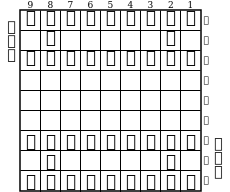

usinewgame
usinewgame
position startpos
go byoyomi 1000
lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R1/LNSGKGSNL b - 1
info string 9g9f  : 0.49579
info string 8g8f  : 0.50924
info string 7g7f  : 0.52265
info string 6g6f  : 0.48029
info string 5g5f  : 0.46333
info string 4g4f  : 0.45832
info string 3g3f  : 0.48865
info string 2g2f  : 0.51545
info string 1g1f  : 0.50308
info string 9i9h  : 0.49866
info string 1i1h  : 0.49883
info string 7i7h  : 0.51435
info string 7i6h  : 0.49140
info string 3i4h  : 0.46548
info string 3i3h  : 0.49628
info string 6i7h  : 0.51422
info string 6i6h  : 0.50697
info string 6i5h  : 0.50492
info string 4i5h  : 0.49474
info string 4i4h  : 0.50177
info string 4i3h  : 0.49121
info string 2h7h  : 0.47500
info string 2h6h  : 0.45062
info string 2h5h  : 0.44200
info string 2h4h  : 0.45655
info string 2h3h  : 0.48636
info string 2h1h  : 0.47221
info string 5i6h  : 0.50829
info string 5i5h  : 0.50435
info string 5i4h  : 0.48713
bestmove 7g7f
1手目


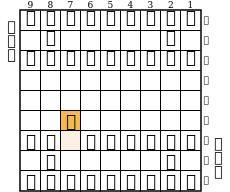

position startpos moves 7g7f
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 9 pv 4a3b
info currmove 4a3b
info time 1 depth 2 nodes 136 score cp -1 pv 4a3b 6i7h
info currmove 4a3b
info time 2 depth 3 nodes 2381 score cp 2 pv 4a3b 6i7h 5a4b
info currmove 4a3b
info currmove 4a3b
info time 6 depth 4 nodes 7626 score cp -1 pv 4a3b 6i7h 5a4b 4i5h
info currmove 4a3b
info time 17 nodes 26870 score cp -1 pv 4a3b 6i7h 5a4b 4i5h
bestmove 4a3b
2手目


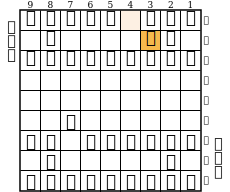

position startpos moves 7g7f 4a3b
go byoyomi 1000
lnsgk1snl/1r4gb1/ppppppppp/9/9/2P6/PP1PPPPPP/1B5R1/LNSGKGSNL b - 3
info string 7f7e  : 0.48670
info string 9g9f  : 0.50119
info string 8g8f  : 0.49342
info string 6g6f  : 0.46642
info string 5g5f  : 0.48290
info string 4g4f  : 0.47584
info string 3g3f  : 0.50887
info string 2g2f  : 0.53098
info string 1g1f  : 0.51582
info string 9i9h  : 0.50970
info string 1i1h  : 0.51165
info string 8i7g  : 0.50406
info string 7i7h  : 0.52144
info string 7i6h  : 0.50158
info string 3i4h  : 0.48015
info string 3i3h  : 0.51062
info string 6i7h  : 0.52350
info string 6i6h  : 0.51245
info string 6i5h  : 0.51518
info string 4i5h  : 0.51036
info string 4i4h  : 0.51350
info string 4i3h  : 0.50393
info string 8h3c  : 0.47254
info string 8h3c+ : 0.47722
info string 8h4d  : 0.50079
info string 8h5e  : 0.49245
info string 8h6f  : 0.48828
info string 8h7g  : 0.50084
info string 2h7h  : 0.48315
info string 2h6h  : 0.46299
info string 2h5h  : 0.46154
info string 2h4

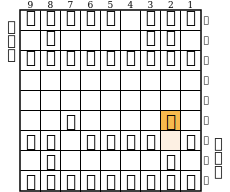

position startpos moves 7g7f 4a3b 2g2f
go byoyomi 1000
info currmove 5a4b
info time 0 depth 1 nodes 4 score cp 11 pv 5a4b
info currmove 5a4b
info currmove 5a4b
info time 0 depth 2 nodes 137 score cp 1 pv 5a4b 6i7h
info currmove 5a4b
info currmove 5a4b
info time 1 depth 3 nodes 2208 score cp 4 pv 5a4b 6i7h 6a5b
info currmove 5a4b
info currmove 5a4b
info time 5 depth 4 nodes 8105 score cp 0 pv 5a4b 2f2e 6a5b 2e2d
info currmove 5a4b
info time 16 depth 4 nodes 20759 score cp 1 pv 3c3d 6g6f 5a4b 6i7h
info time 21 nodes 30184 score cp 1 pv 3c3d 6g6f 5a4b 6i7h
bestmove 3c3d
4手目


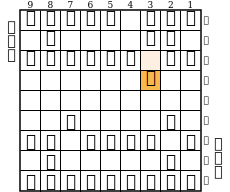

position startpos moves 7g7f 4a3b 2g2f 3c3d
go byoyomi 1000
lnsgk1snl/1r4gb1/pppppp1pp/6p2/9/2P4P1/PP1PPPP1P/1B5R1/LNSGKGSNL b - 5
info string 7f7e  : 0.49663
info string 2f2e  : 0.53938
info string 9g9f  : 0.50789
info string 8g8f  : 0.50130
info string 6g6f  : 0.47776
info string 5g5f  : 0.49212
info string 4g4f  : 0.48214
info string 3g3f  : 0.51154
info string 1g1f  : 0.50659
info string 9i9h  : 0.51591
info string 1i1h  : 0.51528
info string 8i7g  : 0.50873
info string 7i7h  : 0.52266
info string 7i6h  : 0.50762
info string 3i4h  : 0.48412
info string 3i3h  : 0.51227
info string 6i7h  : 0.51966
info string 6i6h  : 0.51666
info string 6i5h  : 0.51929
info string 4i5h  : 0.51291
info string 4i4h  : 0.51526
info string 4i3h  : 0.51077
info string 8h2b  : 0.48588
info string 8h2b+ : 0.48833
info string 8h3c  : 0.51286
info string 8h3c+ : 0.52700
info string 8h4d  : 0.51149
info string 8h5e  : 0.50154
info string 8h6f  : 0.49563
info string 8h7g  : 0.50770
info string 2h2g  : 0.50629
i

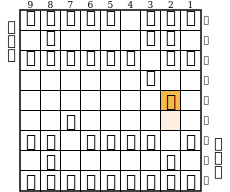

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e
go byoyomi 1000
info currmove 2b8h+
info time 0 depth 1 nodes 3 score cp 7 pv 2b8h+
info time 0 depth 1 nodes 44 score cp 10 pv 5a4b
info currmove 2b8h+
info time 0 depth 2 nodes 147 score cp 1785 pv 2b8h+ 2h8h
info currmove 5a4b
info currmove 2b8h+
info time 6 depth 3 nodes 4591 score cp 1797 pv 2b8h+ 7i8h 3a2b
info currmove 5a4b
info currmove 2b8h+
info time 18 depth 4 nodes 17423 score cp 1906 pv 2b8h+ 7i8h B*6e 3i4h
info currmove 2b8h+
info time 61 nodes 64310 score cp 1906 pv 2b8h+ 7i8h B*6e 3i4h
bestmove 2b8h+
6手目


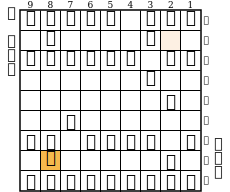

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/7P1/2P6/PP1PPPP1P/1+b5R1/LNSGKGSNL b b 7
info string 2e2d  : 0.48159
info string 7f7e  : 0.48124
info string 9g9f  : 0.48681
info string 8g8f  : 0.48364
info string 6g6f  : 0.45397
info string 5g5f  : 0.45815
info string 4g4f  : 0.47040
info string 3g3f  : 0.49845
info string 1g1f  : 0.48119
info string 9i9h  : 0.48637
info string 1i1h  : 0.48543
info string 8i7g  : 0.49022
info string 7i8h  : 0.53728
info string 7i7h  : 0.49759
info string 7i6h  : 0.48135
info string 3i4h  : 0.46352
info string 3i3h  : 0.48561
info string 6i7h  : 0.50384
info string 6i6h  : 0.49069
info string 6i5h  : 0.49654
info string 4i5h  : 0.49853
info string 4i4h  : 0.49332
info string 4i3h  : 0.47861
info string 2h2f  : 0.47582
info string 2h2g  : 0.47664
info string 2h8h  : 0.52949
info string 2h7h  : 0.47686
info string 2h6h  : 0.45126
info string 2h5h  : 0.45100
info string 2h4h  : 0.46998
info string 2h3h  

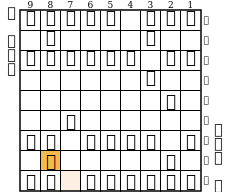

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h
go byoyomi 1000
info currmove 3a2b
info time 0 depth 1 nodes 4 score cp 7 pv 3a2b
info currmove B*6e
info currmove 3a2b
info time 1 depth 2 nodes 276 score cp -5 pv 3a2b 2e2d
info currmove B*6e
info time 1 depth 2 nodes 413 score cp 107 pv B*6e 3i3h
info currmove 3a2b
info time 5 depth 3 nodes 5490 score cp -103 pv 3a2b B*4e 7a7b
info currmove B*6e
info time 7 depth 3 nodes 7939 score cp -89 pv B*6e 2e2d 2c2d
info time 16 depth 3 nodes 18990 score cp 2 pv 7a7b 6i7h 3a2b
info currmove 7a7b
info time 34 depth 4 nodes 36543 score cp -10 pv 7a7b 2e2d 3a2b 6i7h
info currmove B*6e
info time 52 depth 4 nodes 48040 score cp 97 pv B*6e 5i5h 6e7f 2e2d
info time 190 nodes 195891 score cp 97 pv B*6e 5i5h 6e7f 2e2d
bestmove B*6e
8手目


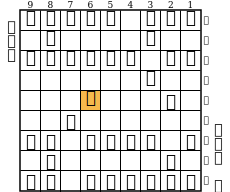

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/3b3P1/2P6/PP1PPPP1P/1S5R1/LN1GKGSNL b B 9
info string 2e2d  : 0.50353
info string 7f7e  : 0.50095
info string 9g9f  : 0.50593
info string 8g8f  : 0.50701
info string 6g6f  : 0.48834
info string 5g5f  : 0.49790
info string 4g4f  : 0.49195
info string 3g3f  : 0.50206
info string 1g1f  : 0.50423
info string 9i9h  : 0.50946
info string 1i1h  : 0.50610
info string 8i7g  : 0.49565
info string 8h7g  : 0.50995
info string 8h7i  : 0.50468
info string 3i4h  : 0.48985
info string 3i3h  : 0.50841
info string 6i7h  : 0.50083
info string 6i6h  : 0.50725
info string 6i5h  : 0.51553
info string 6i7i  : 0.50911
info string 4i5h  : 0.49573
info string 4i4h  : 0.51690
info string 4i3h  : 0.51545
info string 2h2f  : 0.49857
info string 2h2g  : 0.50352
info string 2h7h  : 0.48371
info string 2h6h  : 0.47334
info string 2h5h  : 0.46685
info string 2h4h  : 0.47327
info string 2h3h  : 0.49563
info st

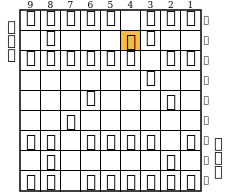

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b
go byoyomi 1000
info time 0 depth 1 nodes 10 score cp 3695 pv 5a4b
info currmove 5a4b
info time 0 depth 2 nodes 87 score cp 3897 pv 5a4b 4i5h
info currmove 5a4b
info time 4 depth 3 nodes 3146 score cp 3699 pv 5a4b 2e2d 2c2d
info currmove 5a4b
info currmove 5a4b
info time 15 depth 4 nodes 11853 score cp 3886 pv 5a4b 4i5h 6e7f 2e2d
info currmove 5a4b
info time 25 nodes 23711 score cp 3886 pv 5a4b 4i5h 6e7f 2e2d
bestmove 5a4b
10手目


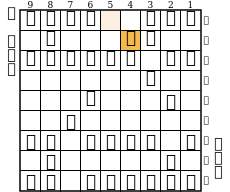

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b
go byoyomi 1000
lnsg2snl/1r3kg2/pppppp1pp/6p2/3b3P1/2P6/PP1PPPP1P/1S5R1/LN1GKGSNL b b 11
info string 2e2d  : 0.49042
info string 7f7e  : 0.48940
info string 9g9f  : 0.49169
info string 8g8f  : 0.49445
info string 6g6f  : 0.47552
info string 5g5f  : 0.47498
info string 4g4f  : 0.46721
info string 3g3f  : 0.48837
info string 1g1f  : 0.48891
info string 9i9h  : 0.49811
info string 1i1h  : 0.49358
info string 8i7g  : 0.48062
info string 8h7g  : 0.49422
info string 8h7i  : 0.48922
info string 3i4h  : 0.47062
info string 3i3h  : 0.49739
info string 6i7h  : 0.48804
info string 6i6h  : 0.49178
info string 6i5h  : 0.50070
info string 6i7i  : 0.49356
info string 4i5h  : 0.48918
info string 4i4h  : 0.50196
info string 4i3h  : 0.49752
info string 2h2f  : 0.48744
info string 2h2g  : 0.48960
info string 2h7h  : 0.47905
info string 2h6h  : 0.45875
info string 2h5h  : 0.44653
info string 2h4h  : 0.45619
info string 2h3h  : 0.48

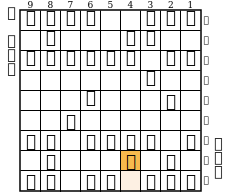

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h
go byoyomi 1000
info currmove 6e7f
info time 0 depth 1 nodes 4 score cp 3911 pv 6e7f
info currmove 6e7f
info currmove 6e7f
info time 1 depth 2 nodes 197 score cp 3898 pv 6e7f 4h5h
info currmove 6e7f
info currmove 6e7f
info time 5 depth 3 nodes 4402 score cp 3903 pv 6e7f 4h5h 3a2b
info currmove 6e7f
info currmove 6e7f
info time 16 depth 4 nodes 13458 score cp 3891 pv 6e7f 4h5h 3a2b 2e2d
info currmove 6e7f
info time 67 nodes 81911 score cp 3891 pv 6e7f 4h5h 3a2b 2e2d
bestmove 6e7f
12手目


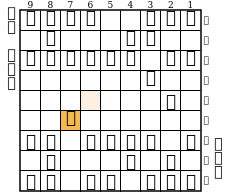

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f
go byoyomi 1000
lnsg2snl/1r3kg2/pppppp1pp/6p2/7P1/2b6/PP1PPPP1P/1S3G1R1/LN1GK1SNL b bp 13
info string 2e2d  : 0.49621
info string 9g9f  : 0.49714
info string 8g8f  : 0.50514
info string 6g6f  : 0.48612
info string 5g5f  : 0.47129
info string 4g4f  : 0.47992
info string 3g3f  : 0.49815
info string 1g1f  : 0.49521
info string 9i9h  : 0.50169
info string 1i1h  : 0.50125
info string 8i7g  : 0.47701
info string 8h7g  : 0.49238
info string 8h7i  : 0.49135
info string 3i3h  : 0.50056
info string 4h5h  : 0.48295
info string 4h3h  : 0.48938
info string 4h4i  : 0.48717
info string 6i7h  : 0.49453
info string 6i6h  : 0.49158
info string 6i5h  : 0.49697
info string 6i7i  : 0.49645
info string 2h2f  : 0.48469
info string 2h2g  : 0.49004
info string 2h3h  : 0.48503
info string 2h1h  : 0.47919
info string 5i6h  : 0.49446
info string 5i5h  : 0.50118
info string 5i4i  : 0.48746
bestmove 8g8f
13手目


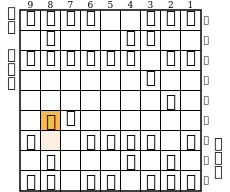

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f
go byoyomi 1000
info currmove 7f6g+
info time 0 depth 1 nodes 4 score cp 4315 pv 7f6g+
info currmove 7f6g+
info currmove 7f6g+
info time 0 depth 2 nodes 196 score cp 4315 pv 7f6g+ 8i7g
info currmove 7f6g+
info currmove 7f6g+
info time 4 depth 3 nodes 4079 score cp 4320 pv 7f6g+ 8i7g 3a2b
info currmove 7f6g+
info currmove 7f6g+
info time 13 depth 4 nodes 13448 score cp 4313 pv 7f6g+ 8i7g 6g7f 8f8e
info currmove 7f6g+
info time 68 nodes 83383 score cp 4313 pv 7f6g+ 8i7g 6g7f 8f8e
bestmove 7f6g+
14手目


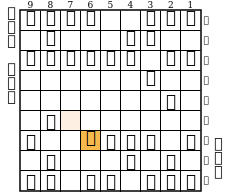

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+
go byoyomi 1000
lnsg2snl/1r3kg2/pppppp1pp/6p2/7P1/1P7/P2+bPPP1P/1S3G1R1/LN1GK1SNL b b2p 15
info string 2e2d  : 0.46477
info string 8f8e  : 0.46555
info string 9g9f  : 0.46293
info string 5g5f  : 0.44781
info string 4g4f  : 0.45147
info string 3g3f  : 0.47745
info string 1g1f  : 0.46832
info string 9i9h  : 0.47264
info string 1i1h  : 0.47330
info string 8i7g  : 0.45231
info string 8h8g  : 0.46708
info string 8h7g  : 0.46925
info string 8h7i  : 0.45742
info string 3i3h  : 0.46738
info string 4h5h  : 0.46026
info string 4h3h  : 0.45420
info string 4h4i  : 0.45923
info string 6i7h  : 0.48722
info string 6i6h  : 0.46735
info string 6i5h  : 0.45836
info string 6i7i  : 0.47826
info string 2h2f  : 0.44798
info string 2h2g  : 0.45167
info string 2h3h  : 0.45802
info string 2h1h  : 0.44389
bestmove 6i7h
15手目


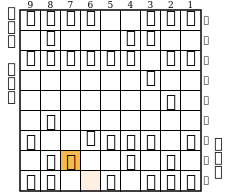

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+ 6i7h
go byoyomi 1000
info time 0 depth 1 nodes 88 score cp 6775 pv 6g7h
info currmove 6g7h
info time 1 depth 2 nodes 201 score cp 8200 pv 6g7h 4h4i
info currmove 6g7h
info time 7 depth 3 nodes 5268 score cp 7503 pv 6g7h 2e2d 7h8h
info currmove 6g7h
info currmove 6g7h
info time 17 depth 4 nodes 16373 score cp 8748 pv 6g7h 4h4i G*6i 5i4h
info currmove 6g7h
info time 134 nodes 146378 score cp 8748 pv 6g7h 4h4i G*6i 5i4h
bestmove 6g7h
16手目


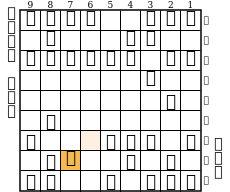

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+ 6i7h 6g7h
go byoyomi 1000
lnsg2snl/1r3kg2/pppppp1pp/6p2/7P1/1P7/P3PPP1P/1S+b2G1R1/LN2K1SNL b bg2p 17
info string 2e2d  : 0.38230
info string 8f8e  : 0.38659
info string 9g9f  : 0.38452
info string 5g5f  : 0.36387
info string 4g4f  : 0.37983
info string 3g3f  : 0.40759
info string 1g1f  : 0.38879
info string 9i9h  : 0.39266
info string 1i1h  : 0.39009
info string 8i7g  : 0.35849
info string 8h8g  : 0.38214
info string 8h7g  : 0.38368
info string 8h7i  : 0.37225
info string 3i3h  : 0.39095
info string 4h5h  : 0.37831
info string 4h3h  : 0.35319
info string 4h4i  : 0.37715
info string 2h2f  : 0.35501
info string 2h2g  : 0.36516
info string 2h3h  : 0.39764
info string 2h1h  : 0.34511
info string 5i5h  : 0.39175
info string 5i4i  : 0.36943
bestmove 3g3f
17手目


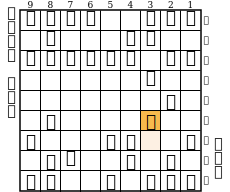

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+ 6i7h 6g7h 3g3f
go byoyomi 1000
info currmove 7h8h
info time 13 depth 1 nodes 4 score cp 8819 pv 7h8h
info currmove 7h8h
info currmove 7h8h
info time 24 depth 2 nodes 273 score cp 10241 pv 7h8h 4h5h
info currmove 7h8h
info currmove 7h8h
info time 40 depth 3 nodes 7148 score cp 8937 pv 7h8h 2e2d 8h8i
info currmove 7h8h
info currmove 7h8h
info time 66 depth 4 nodes 26813 score cp 10191 pv 7h8h 2e2d 8h9i 2d2c+
info currmove 7h8h
info time 74 depth 4 nodes 36430 score cp 10309 pv B*5e 8h7g 5e2h+ 3i2h
info time 163 nodes 146396 score cp 10309 pv B*5e 8h7g 5e2h+ 3i2h
bestmove B*5e
18手目


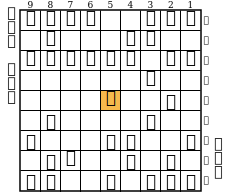

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+ 6i7h 6g7h 3g3f B*5e
go byoyomi 1000
lnsg2snl/1r3kg2/pppppp1pp/6p2/4b2P1/1P4P2/P3PP2P/1S+b2G1R1/LN2K1SNL b g2p 19
info string 2e2d  : 0.42006
info string 8f8e  : 0.41373
info string 3f3e  : 0.42393
info string 9g9f  : 0.41928
info string 5g5f  : 0.40048
info string 4g4f  : 0.42336
info string 1g1f  : 0.41897
info string 9i9h  : 0.42453
info string 1i1h  : 0.42709
info string 8i7g  : 0.40291
info string 2i3g  : 0.41738
info string 8h8g  : 0.42176
info string 8h7g  : 0.42182
info string 8h7i  : 0.40833
info string 3i3h  : 0.42104
info string 4h3g  : 0.40243
info string 4h5h  : 0.42420
info string 4h3h  : 0.39910
info string 4h4i  : 0.41707
info string 2h2f  : 0.38978
info string 2h2g  : 0.39860
info string 2h3h  : 0.41852
info string 2h1h  : 0.37985
info string 5i5h  : 0.42777
info string 5i4i  : 0.40703
bestmove 5i5h
19手目


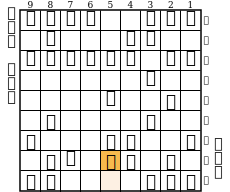

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+ 6i7h 6g7h 3g3f B*5e 5i5h
go byoyomi 1000
info currmove 5e8h+
info time 3 depth 1 nodes 3 score cp 8932 pv 5e8h+
info currmove 5e8h+
info time 7 depth 2 nodes 212 score cp 10355 pv 5e8h+ 2e2d
info currmove 5e8h+
info time 7 depth 2 nodes 430 score cp 10932 pv 5e2h+ 3i2h
info currmove 5e8h+
info time 15 depth 3 nodes 4862 score cp 9050 pv 5e8h+ 2e2d 7h8i
info currmove 5e2h+
info time 18 depth 3 nodes 7512 score cp 9142 pv 5e2h+ 8h8g 2h3i
info time 24 depth 3 nodes 13169 score cp 9419 pv G*6g 5h4i 5e8h+
info time 24 depth 3 nodes 13276 score cp 9420 pv G*6h 5h4i 5e8h+
info currmove 5e2h+
info time 40 depth 4 nodes 26548 score cp 12258 pv 5e2h+ 3i2h 7h8h B*4e
info currmove G*6h
info time 95 nodes 95392 score cp 12258 pv 5e2h+ 3i2h 7h8h B*4e
bestmove 5e2h+
20手目


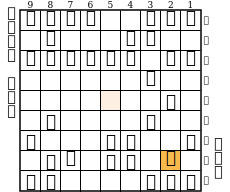

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+ 6i7h 6g7h 3g3f B*5e 5i5h 5e2h+
go byoyomi 1000
lnsg2snl/1r3kg2/pppppp1pp/6p2/7P1/1P4P2/P3PP2P/1S+b1KG1+b1/LN4SNL b rg2p 21
info string 2e2d  : 0.31651
info string 8f8e  : 0.31548
info string 3f3e  : 0.32525
info string 9g9f  : 0.31723
info string 5g5f  : 0.29081
info string 4g4f  : 0.30709
info string 1g1f  : 0.31300
info string 9i9h  : 0.32428
info string 1i1h  : 0.32230
info string 8i7g  : 0.28995
info string 2i3g  : 0.30680
info string 8h8g  : 0.32283
info string 8h7g  : 0.32497
info string 8h7i  : 0.30640
info string 3i3h  : 0.33896
info string 3i2h  : 0.29887
info string 4h3g  : 0.29057
info string 4h3h  : 0.28455
info string 4h4i  : 0.30545
info string 5h5i  : 0.30697
info string 5h4i  : 0.29970
bestmove 3i3h
21手目


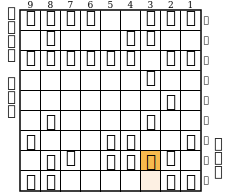

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+ 6i7h 6g7h 3g3f B*5e 5i5h 5e2h+ 3i3h
go byoyomi 1000
info time 0 nodes 0 score mate + pv G*6g
bestmove G*6g
22手目


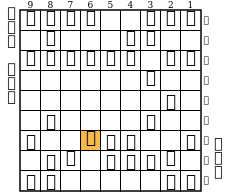

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+ 6i7h 6g7h 3g3f B*5e 5i5h 5e2h+ 3i3h G*6g
go byoyomi 1000
lnsg2snl/1r3kg2/pppppp1pp/6p2/7P1/1P4P2/P2gPP2P/1S+b1KGS+b1/LN5NL b r2p 23
info string 5h5i  : 0.33571
info string 5h4i  : 0.32141
bestmove 5h5i
23手目


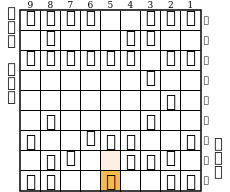

position startpos moves 7g7f 4a3b 2g2f 3c3d 2f2e 2b8h+ 7i8h B*6e B*4b 5a4b 4i4h 6e7f 8g8f 7f6g+ 6i7h 6g7h 3g3f B*5e 5i5h 5e2h+ 3i3h G*6g 5h5i
go byoyomi 1000
info time 0 nodes 0 score mate + pv R*6i
bestmove R*6i
24手目


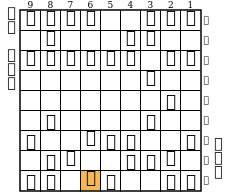

まで24手で後手の勝ち

対局数1 先手勝ち0(0%) 後手勝ち1(100%) 引き分け0

search1_player
勝ち0(0%) 先手勝ち0(0%) 後手勝ち0(0%)

Lesserkai 1.4.2
勝ち1(100%) 先手勝ち0(0%) 後手勝ち1(100%)


In [ ]:
from cshogi import cli

cli.main('/content/python-dlshogi/search1_player.sh', '/content/LesserkaiSrc/Lesserkai/Lesserkai', options1={'modelfile':'/content/python-dlshogi/model/model_value'})

# 第11章 学習テクニック その2
## 11.1 転移学習

In [ ]:
!python utils/transfer_policy_to_value.py model/model_policy model/model_value_transferred

In [ ]:
!python train_value.py kifulist_train_1000.txt kifulist_test_100.txt -m model/model_value_transferred --model model/mode_value_1000 --state model/state_value_1000 --eval_interval 100

## 11.2 マルチタスク学習
以下のコードはGitHubからcloneしてモジュールインストールしたコードを使用するため、ここではコードの掲載を省略します。
- [policy_value.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/network/policy_value.py)

### 11.2.2 学習処理の実装、11.2.3 学習実行
方策ネットワークと価値ネットワークの学習処理を実装して、学習を実行します。
- バッチサイズ : 32(デフォルト)
- 学習率 : 0.01(デフォルト)

※33行目で引数を設定しています。

In [ ]:
import numpy as np
import chainer
from chainer import cuda, Variable
from chainer import optimizers, serializers
import chainer.functions as F

from pydlshogi.common import *
from pydlshogi.network.policy_value import PolicyValueNetwork
from pydlshogi.features import *
from pydlshogi.read_kifu import *

import argparse
import random
import pickle
import os
import re

import logging

parser = argparse.ArgumentParser()
parser.add_argument('kifulist_train', type=str, help='train kifu list')
parser.add_argument('kifulist_test', type=str, help='test kifu list')
parser.add_argument('--batchsize', '-b', type=int, default=32, help='Number of positions in each mini-batch')
parser.add_argument('--test_batchsize', type=int, default=512, help='Number of positions in each test mini-batch')
parser.add_argument('--epoch', '-e', type=int, default=1, help='Number of epoch times')
parser.add_argument('--model', type=str, default='model/model_policy_value', help='model file name')
parser.add_argument('--state', type=str, default='model/state_policy_value', help='state file name')
parser.add_argument('--initmodel', '-m', default='', help='Initialize the model from given file')
parser.add_argument('--resume', '-r', default='', help='Resume the optimization from snapshot')
parser.add_argument('--log', default=None, help='log file path')
parser.add_argument('--lr', type=float, default=0.01, help='learning rate')
parser.add_argument('--eval_interval', '-i', type=int, default=1000, help='eval interval')
args = parser.parse_args(args=['kifulist_train_1000.txt', 'kifulist_test_100.txt', '--model', 'model/model_policy_value_1000', '--state', 'model/state_policy_value_1000', '--eval_interval', '100'])

logging.basicConfig(format='%(asctime)s\t%(levelname)s\t%(message)s', datefmt='%Y/%m/%d %H:%M:%S', filename=args.log, level=logging.DEBUG)

model = PolicyValueNetwork()
model.to_gpu()

optimizer = optimizers.SGD(lr=args.lr)
optimizer.setup(model)

# Init/Resume
if args.initmodel:
    logging.info('Load model from {}'.format(args.initmodel))
    serializers.load_npz(args.initmodel, model)
if args.resume:
    logging.info('Load optimizer state from {}'.format(args.resume))
    serializers.load_npz(args.resume, optimizer)

logging.info('read kifu start')
# 保存済みのpickleファイルがある場合、pickleファイルを読み込む
# train date
train_pickle_filename = re.sub(r'\..*?$', '', args.kifulist_train) + '.pickle'
if os.path.exists(train_pickle_filename):
    with open(train_pickle_filename, 'rb') as f:
        positions_train = pickle.load(f)
    logging.info('load train pickle')
else:
    positions_train = read_kifu(args.kifulist_train)

# test data
test_pickle_filename = re.sub(r'\..*?$', '', args.kifulist_test) + '.pickle'
if os.path.exists(test_pickle_filename):
    with open(test_pickle_filename, 'rb') as f:
        positions_test = pickle.load(f)
    logging.info('load test pickle')
else:
    positions_test = read_kifu(args.kifulist_test)

# 保存済みのpickleがない場合、pickleファイルを保存する
if not os.path.exists(train_pickle_filename):
    with open(train_pickle_filename, 'wb') as f:
        pickle.dump(positions_train, f, pickle.HIGHEST_PROTOCOL)
    logging.info('save train pickle')
if not os.path.exists(test_pickle_filename):
    with open(test_pickle_filename, 'wb') as f:
        pickle.dump(positions_test, f, pickle.HIGHEST_PROTOCOL)
    logging.info('save test pickle')
logging.info('read kifu end')

logging.info('train position num = {}'.format(len(positions_train)))
logging.info('test position num = {}'.format(len(positions_test)))

# mini batch
def mini_batch(positions, i, batchsize):
    mini_batch_data = []
    mini_batch_move = []
    mini_batch_win = []
    for b in range(batchsize):
        features, move, win = make_features(positions[i + b])
        mini_batch_data.append(features)
        mini_batch_move.append(move)
        mini_batch_win.append(win)

    return (Variable(cuda.to_gpu(np.array(mini_batch_data, dtype=np.float32))),
            Variable(cuda.to_gpu(np.array(mini_batch_move, dtype=np.int32))),
            Variable(cuda.to_gpu(np.array(mini_batch_win, dtype=np.int32).reshape((-1, 1)))))

def mini_batch_for_test(positions, batchsize):
    mini_batch_data = []
    mini_batch_move = []
    mini_batch_win = []
    for b in range(batchsize):
        features, move, win = make_features(random.choice(positions))
        mini_batch_data.append(features)
        mini_batch_move.append(move)
        mini_batch_win.append(win)

    return (Variable(cuda.to_gpu(np.array(mini_batch_data, dtype=np.float32))),
            Variable(cuda.to_gpu(np.array(mini_batch_move, dtype=np.int32))),
            Variable(cuda.to_gpu(np.array(mini_batch_win, dtype=np.int32).reshape((-1, 1)))))

# train
logging.info('start training')
itr = 0
sum_loss = 0
for e in range(args.epoch):
    positions_train_shuffled = random.sample(positions_train, len(positions_train))

    itr_epoch = 0
    sum_loss_epoch = 0
    for i in range(0, len(positions_train_shuffled) - args.batchsize, args.batchsize):
        x, t1, t2 = mini_batch(positions_train_shuffled, i, args.batchsize)
        y1, y2 = model(x)

        model.cleargrads()
        loss = F.softmax_cross_entropy(y1, t1) + F.sigmoid_cross_entropy(y2, t2)
        loss.backward()
        optimizer.update()

        itr += 1
        sum_loss += loss.data
        itr_epoch += 1
        sum_loss_epoch += loss.data

        # print train loss and test accuracy
        if optimizer.t % args.eval_interval == 0:
            x, t1, t2 = mini_batch_for_test(positions_test, args.test_batchsize)
            y1, y2 = model(x)
            logging.info('epoch = {}, iteration = {}, loss = {}, accuracy = {}, {}'.format(
                optimizer.epoch + 1, optimizer.t, sum_loss / itr,
                F.accuracy(y1, t1).data, F.binary_accuracy(y2, t2).data))
            itr = 0
            sum_loss = 0

    # validate test data
    logging.info('validate test data')
    itr_test = 0
    sum_test_accuracy1 = 0
    sum_test_accuracy2 = 0
    for i in range(0, len(positions_test) - args.batchsize, args.batchsize):
        x, t1, t2 = mini_batch(positions_test, i, args.batchsize)
        y1, y2 = model(x)
        itr_test += 1
        sum_test_accuracy1 += F.accuracy(y1, t1).data
        sum_test_accuracy2 += F.binary_accuracy(y2, t2).data
    logging.info('epoch = {}, iteration = {}, train loss avr = {}, test accuracy = {}, {}'.format(
        optimizer.epoch + 1, optimizer.t, sum_loss_epoch / itr_epoch,
        sum_test_accuracy1 / itr_test, sum_test_accuracy2 / itr_test))
    
    optimizer.new_epoch()

logging.info('save the model')
serializers.save_npz(args.model, model)
logging.info('save the optimizer')
serializers.save_npz(args.state, optimizer)

## 11.3 Residual Network
以下のコードはGitHubからcloneしてモジュールインストールしたコードを使用するため、ここではコードの掲載を省略します。
- [policy_value_resnet.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/network/policy_value_resnet.py)
- [train_policy_value_resnet.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/train_policy_value_resnet.py)

### 11.3.3 学習の実行

In [ ]:
!python train_policy_value_resnet.py kifulist_train_1000.txt kifulist_test_100.txt --blocks 10 --model model/model_policy_value_resnet10_1000 --state model/state_policy_value_resnet10_1000 --eval_interval 100

2019/07/21 04:49:32	INFO	read kifu start
2019/07/21 04:49:34	INFO	load train pickle
2019/07/21 04:49:35	INFO	load test pickle
2019/07/21 04:49:35	INFO	read kifu end
2019/07/21 04:49:35	INFO	train position num = 139865
2019/07/21 04:49:35	INFO	test position num = 14217
2019/07/21 04:49:35	INFO	start training
2019/07/21 04:49:42	INFO	epoch = 1, iteration = 100, loss = 8.226223, accuracy = 0.021484375, 0.5644531
2019/07/21 04:49:47	INFO	epoch = 1, iteration = 200, loss = 7.0791845, accuracy = 0.0390625, 0.56640625
2019/07/21 04:49:52	INFO	epoch = 1, iteration = 300, loss = 6.8194537, accuracy = 0.03125, 0.58984375
2019/07/21 04:49:57	INFO	epoch = 1, iteration = 400, loss = 6.587143, accuracy = 0.05859375, 0.5371094
2019/07/21 04:50:02	INFO	epoch = 1, iteration = 500, loss = 6.4722013, accuracy = 0.09375, 0.6328125
2019/07/21 04:50:07	INFO	epoch = 1, iteration = 600, loss = 6.336242, accuracy = 0.09765625, 0.5371094
2019/07/21 04:50:12	INFO	epoch = 1, iteration = 700, loss = 6.0705566, acc

# 第12章 モンテカルロ木探索
以下のコードはGitHubからcloneしてモジュールインストールしたコードを使用するため、ここではコードの掲載を省略します。
- [uct_node.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/uct/uct_node.py)
- [mcts_player.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/player/mcts_player.py)

## 12.4 テスト
以下のセルを実行して、順番に以下の通り入力します。

setoption name modelfile value model/model_policy_value_resnet

isready

position startpos

go

quit

In [ ]:
!python -m pydlshogi.usi.usi_mcts_player

setoption name modelfile value model/model_policy_value_resnet
isready
readyok
position startpos
lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R1/LNSGKGSNL b - 1
go
  0:9g9f  move_count:   4 nn_rate:0.02573 win_rate:0.48384
  1:8g8f  move_count:   0 nn_rate:0.00043 win_rate:0.00000
  2:7g7f  move_count:  87 nn_rate:0.33013 win_rate:0.51145
  3:6g6f  move_count:   0 nn_rate:0.00115 win_rate:0.00000
  4:5g5f  move_count:   1 nn_rate:0.00666 win_rate:0.48360
  5:4g4f  move_count:   2 nn_rate:0.01720 win_rate:0.42873
  6:3g3f  move_count:   0 nn_rate:0.00174 win_rate:0.00000
  7:2g2f  move_count: 140 nn_rate:0.50203 win_rate:0.51411
  8:1g1f  move_count:   0 nn_rate:0.00077 win_rate:0.00000
  9:9i9h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
 10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
 11:7i7h  move_count:   0 nn_rate:0.00284 win_rate:0.00000
 12:7i6h  move_count:   1 nn_rate:0.00515 win_rate:0.44318
 13:3i4h  move_count:   4 nn_rate:0.04314 win_rate:0.39879
 14:3i3h  

## 12.5 対局
将棋所を使ったローカルPCでの対局方法は書籍および[8.5](#scrollTo=THGkX8CUMPN6)を参照してください。ssh経由で実行する方法は、[ssh経由でGoogle Colab上で実行する方法](#scrollTo=-lTD4_3lX5Tq&line=4&uniqifier=1)を参照してください。

### cshogiを使って対局
cshogiのインストール方法と対局の準備は、8.5の[cshogiでGoogle Colab上で対局する方法](#scrollTo=0nHoQ13cW5UN)を参照してください。

作成した将棋AIを起動するシェル(mcts_player.sh)を作成します。

In [ ]:
!echo -e "#!/bin/sh\npython -m pydlshogi.usi.usi_mcts_player" >mcts_player.sh
!chmod +x mcts_player.sh

cshogiのcliモジュールを使って、対局を開始します。

mcts_player
setoption name modelfile value /content/python-dlshogi/model/model_policy_value_resnet
isready
readyok
Lesserkai 1.4.2
isready
readyok
開始局面


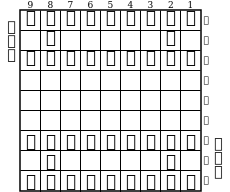

usinewgame
usinewgame
position startpos
go byoyomi 1000
lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R1/LNSGKGSNL b - 1
0:9g9f  move_count:   4 nn_rate:0.02573 win_rate:0.48384
1:8g8f  move_count:   0 nn_rate:0.00043 win_rate:0.00000
2:7g7f  move_count:  87 nn_rate:0.33013 win_rate:0.51145
3:6g6f  move_count:   0 nn_rate:0.00115 win_rate:0.00000
4:5g5f  move_count:   1 nn_rate:0.00666 win_rate:0.48360
5:4g4f  move_count:   2 nn_rate:0.01720 win_rate:0.42873
6:3g3f  move_count:   0 nn_rate:0.00174 win_rate:0.00000
7:2g2f  move_count: 140 nn_rate:0.50203 win_rate:0.51411
8:1g1f  move_count:   0 nn_rate:0.00077 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:7i7h  move_count:   0 nn_rate:0.00284 win_rate:0.00000
12:7i6h  move_count:   1 nn_rate:0.00515 win_rate:0.44318
13:3i4h  move_count:   4 nn_rate:0.04314 win_rate:0.39879
14:3i3h  move_count:   4 nn_rate:0.02159 win_rate:0.48073
15:6i7h  move_count:

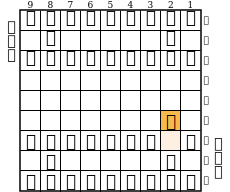

position startpos moves 2g2f
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 9 pv 4a3b
info currmove 4a3b
info time 1 depth 2 nodes 128 score cp -1 pv 4a3b 6i7h
info currmove 4a3b
info time 2 depth 3 nodes 2138 score cp 2 pv 4a3b 6i7h 5a4b
info currmove 4a3b
info currmove 4a3b
info time 5 depth 4 nodes 7747 score cp -2 pv 4a3b 2f2e 5a4b 2e2d
info currmove 4a3b
info time 13 nodes 26549 score cp -2 pv 4a3b 2f2e 5a4b 2e2d
bestmove 4a3b
2手目


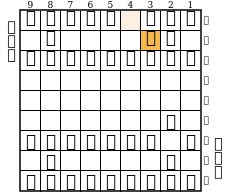

position startpos moves 2g2f 4a3b
go byoyomi 1000
lnsgk1snl/1r4gb1/ppppppppp/9/9/7P1/PPPPPPP1P/1B5R1/LNSGKGSNL b - 3
0:2f2e  move_count:  85 nn_rate:0.32959 win_rate:0.51238
1:9g9f  move_count:   7 nn_rate:0.03265 win_rate:0.50155
2:8g8f  move_count:   0 nn_rate:0.00140 win_rate:0.00000
3:7g7f  move_count: 122 nn_rate:0.35759 win_rate:0.52711
4:6g6f  move_count:   0 nn_rate:0.00053 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00313 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00299 win_rate:0.00000
7:3g3f  move_count:   0 nn_rate:0.00444 win_rate:0.00000
8:1g1f  move_count:   0 nn_rate:0.00110 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00004 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:7i7h  move_count:   1 nn_rate:0.00561 win_rate:0.49656
12:7i6h  move_count:   1 nn_rate:0.01137 win_rate:0.47637
13:3i4h  move_count:  13 nn_rate:0.10803 win_rate:0.44857
14:3i3h  move_count:  13 nn_rate:0.03549 win_rate:0.52890
15:6i7h  move_count:  1

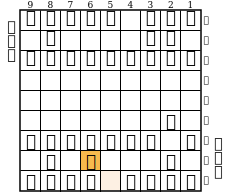

position startpos moves 2g2f 4a3b 5i6h
go byoyomi 1000
info currmove 5a4b
info time 0 depth 1 nodes 4 score cp 9 pv 5a4b
info currmove 5a4b
info currmove 5a4b
info time 1 depth 2 nodes 123 score cp -1 pv 5a4b 6i7h
info currmove 5a4b
info currmove 5a4b
info time 2 depth 3 nodes 1826 score cp 2 pv 5a4b 6i7h 6a5b
info currmove 5a4b
info currmove 5a4b
info time 4 depth 4 nodes 6539 score cp -2 pv 5a4b 2f2e 6a5b 2e2d
info currmove 5a4b
info time 8 nodes 18169 score cp -2 pv 5a4b 2f2e 6a5b 2e2d
bestmove 5a4b
4手目


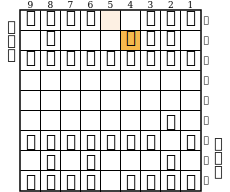

position startpos moves 2g2f 4a3b 5i6h 5a4b
go byoyomi 1000
lnsg2snl/1r3kgb1/ppppppppp/9/9/7P1/PPPPPPP1P/1B1K3R1/LNSG1GSNL b - 5
0:2f2e  move_count: 102 nn_rate:0.28942 win_rate:0.54563
1:9g9f  move_count:   5 nn_rate:0.02002 win_rate:0.51492
2:8g8f  move_count:   0 nn_rate:0.00168 win_rate:0.00000
3:7g7f  move_count:  93 nn_rate:0.26387 win_rate:0.54588
4:6g6f  move_count:   0 nn_rate:0.00024 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00139 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00491 win_rate:0.00000
7:3g3f  move_count:   9 nn_rate:0.02042 win_rate:0.55827
8:1g1f  move_count:   0 nn_rate:0.00069 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00005 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:7i7h  move_count:   4 nn_rate:0.02550 win_rate:0.50174
12:3i4h  move_count:  10 nn_rate:0.07327 win_rate:0.46176
13:3i3h  move_count:  16 nn_rate:0.04643 win_rate:0.54571
14:6i7h  move_count:  34 nn_rate:0.10028 win_rate:0.54536
15:6i5h  mo

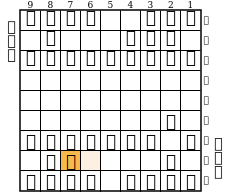

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h
go byoyomi 1000
info currmove 6a5b
info time 0 depth 1 nodes 4 score cp 8 pv 6a5b
info currmove 6a5b
info currmove 6a5b
info time 0 depth 2 nodes 115 score cp 5 pv 6a5b 4i5h
info currmove 6a5b
info currmove 6a5b
info time 1 depth 3 nodes 1550 score cp 6 pv 6a5b 4i5h 1c1d
info currmove 6a5b
info currmove 6a5b
info time 4 depth 4 nodes 5759 score cp -5 pv 6a5b 2f2e 1c1d 2e2d
info currmove 6a5b
info time 5 depth 4 nodes 9212 score cp 1 pv 1c1d 2f2e 2b1c 4i5h
info time 7 depth 4 nodes 13687 score cp 3 pv 2c2d 7h6h 6a5b 6i7h
info time 13 nodes 27587 score cp 3 pv 2c2d 7h6h 6a5b 6i7h
bestmove 2c2d
6手目


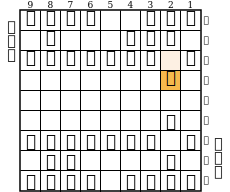

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d
go byoyomi 1000
lnsg2snl/1r3kgb1/ppppppp1p/7p1/9/7P1/PPPPPPP1P/1BK4R1/LNSG1GSNL b - 7
0:2f2e  move_count:  65 nn_rate:0.27421 win_rate:0.49703
1:9g9f  move_count:   6 nn_rate:0.03574 win_rate:0.46283
2:8g8f  move_count:   0 nn_rate:0.00021 win_rate:0.00000
3:7g7f  move_count: 112 nn_rate:0.33179 win_rate:0.51612
4:6g6f  move_count:   0 nn_rate:0.00124 win_rate:0.00000
5:5g5f  move_count:   7 nn_rate:0.02954 win_rate:0.48710
6:4g4f  move_count:   2 nn_rate:0.00618 win_rate:0.48949
7:3g3f  move_count:   5 nn_rate:0.01386 win_rate:0.49846
8:1g1f  move_count:   0 nn_rate:0.00084 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00039 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:7i6h  move_count:   5 nn_rate:0.04518 win_rate:0.42982
12:3i4h  move_count:  23 nn_rate:0.17613 win_rate:0.44395
13:3i3h  move_count:  18 nn_rate:0.03244 win_rate:0.53228
14:6i6h  move_count:   0 nn_rate:0.00164 win_rate:0.00000


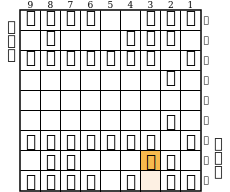

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h
go byoyomi 1000
info currmove 6a5b
info time 0 depth 1 nodes 3 score cp 9 pv 6a5b
info currmove 6a5b
info time 0 depth 2 nodes 104 score cp 6 pv 6a5b 4i5h
info currmove 6a5b
info currmove 6a5b
info time 0 depth 3 nodes 1328 score cp 7 pv 6a5b 4i5h 1c1d
info currmove 6a5b
info currmove 6a5b
info time 4 depth 4 nodes 6202 score cp 4 pv 6a5b 7h6h 1c1d 6i7h
info currmove 6a5b
info time 18 nodes 37489 score cp 4 pv 6a5b 7h6h 1c1d 6i7h
bestmove 6a5b
8手目


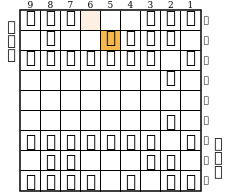

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b
go byoyomi 1000
lns3snl/1r2gkgb1/ppppppp1p/7p1/9/7P1/PPPPPPP1P/1BK3SR1/LNSG1G1NL b - 9
0:2f2e  move_count:  48 nn_rate:0.24799 win_rate:0.51869
1:9g9f  move_count:   5 nn_rate:0.02735 win_rate:0.49637
2:8g8f  move_count:   0 nn_rate:0.00015 win_rate:0.00000
3:7g7f  move_count: 113 nn_rate:0.36341 win_rate:0.54685
4:6g6f  move_count:   0 nn_rate:0.00059 win_rate:0.00000
5:5g5f  move_count:   1 nn_rate:0.01263 win_rate:0.46961
6:4g4f  move_count:   7 nn_rate:0.04062 win_rate:0.51318
7:3g3f  move_count:  35 nn_rate:0.09194 win_rate:0.55440
8:1g1f  move_count:   0 nn_rate:0.00261 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00037 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
11:3h2g  move_count:   9 nn_rate:0.08044 win_rate:0.46801
12:7i6h  move_count:   9 nn_rate:0.08109 win_rate:0.46444
13:6i6h  move_count:   0 nn_rate:0.00535 win_rate:0.00000
14:6i5h  move_count:   1 nn_rate:0.00692 win_ra

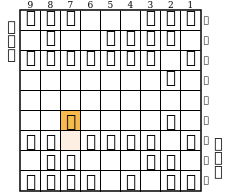

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f
go byoyomi 1000
info currmove 1c1d
info time 1 depth 1 nodes 4 score cp 9 pv 1c1d
info currmove 1c1d
info currmove 1c1d
info time 1 depth 2 nodes 110 score cp 6 pv 1c1d 4i5h
info currmove 1c1d
info currmove 1c1d
info time 3 depth 3 nodes 1569 score cp 8 pv 1c1d 4i5h 1d1e
info currmove 1c1d
info currmove 1c1d
info time 8 depth 4 nodes 6398 score cp 1 pv 1c1d 7i6h 1d1e 6h7g
info currmove 1c1d
info time 30 nodes 42646 score cp 1 pv 1c1d 7i6h 1d1e 6h7g
bestmove 1c1d
10手目


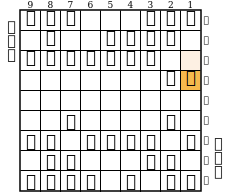

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d
go byoyomi 1000
lns3snl/1r2gkgb1/ppppppp2/7pp/9/2P4P1/PP1PPPP1P/1BK3SR1/LNSG1G1NL b - 11
0:7f7e  move_count:   1 nn_rate:0.00004 win_rate:0.39138
1:2f2e  move_count:  97 nn_rate:0.28483 win_rate:0.56792
2:9g9f  move_count:   1 nn_rate:0.01076 win_rate:0.49638
3:8g8f  move_count:   0 nn_rate:0.00056 win_rate:0.00000
4:6g6f  move_count:   1 nn_rate:0.00865 win_rate:0.40873
5:5g5f  move_count:   3 nn_rate:0.01811 win_rate:0.53224
6:4g4f  move_count:   7 nn_rate:0.03933 win_rate:0.53354
7:3g3f  move_count:  69 nn_rate:0.14135 win_rate:0.58304
8:1g1f  move_count:   0 nn_rate:0.00521 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00321 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
11:8i7g  move_count:   0 nn_rate:0.00041 win_rate:0.00000
12:3h2g  move_count:  11 nn_rate:0.07160 win_rate:0.51000
13:7i6h  move_count:  43 nn_rate:0.27767 win_rate:0.51136
14:6i6h  move_count:   5 nn_rate:0.

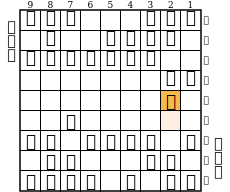

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e
go byoyomi 1000
info currmove 2d2e
info time 0 depth 1 nodes 4 score cp 12 pv 2d2e
info currmove 2d2e
info currmove 2d2e
info time 0 depth 2 nodes 118 score cp 9 pv 2d2e 2h2e
info currmove 2d2e
info currmove 2d2e
info time 1 depth 3 nodes 1351 score cp 11 pv 2d2e 2h2e 1d1e
info currmove 2d2e
info currmove 2d2e
info time 8 depth 4 nodes 10713 score cp 219 pv 2d2e 7i6h 2e2f 6h7g
info currmove 2d2e
info time 18 nodes 23620 score cp 219 pv 2d2e 7i6h 2e2f 6h7g
bestmove 2d2e
12手目


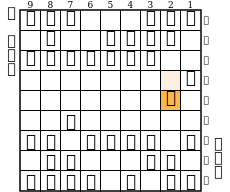

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e
go byoyomi 1000
lns3snl/1r2gkgb1/ppppppp2/8p/7p1/2P6/PP1PPPP1P/1BK3SR1/LNSG1G1NL b p 13
0:7f7e  move_count:   1 nn_rate:0.00001 win_rate:0.40606
1:9g9f  move_count:   0 nn_rate:0.00239 win_rate:0.00000
2:8g8f  move_count:   0 nn_rate:0.00009 win_rate:0.00000
3:6g6f  move_count:   0 nn_rate:0.00175 win_rate:0.00000
4:5g5f  move_count:   0 nn_rate:0.00405 win_rate:0.00000
5:4g4f  move_count:   5 nn_rate:0.01187 win_rate:0.58224
6:3g3f  move_count:  32 nn_rate:0.03283 win_rate:0.59428
7:1g1f  move_count:   0 nn_rate:0.00232 win_rate:0.00000
8:9i9h  move_count:   0 nn_rate:0.00038 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
10:8i7g  move_count:   0 nn_rate:0.00032 win_rate:0.00000
11:3h2g  move_count:  17 nn_rate:0.07035 win_rate:0.55096
12:7i6h  move_count:  12 nn_rate:0.05824 win_rate:0.54073
13:6i6h  move_count:   4 nn_rate:0.00726 win_rate:0.61122
14:6i5h  move_count:   0 n

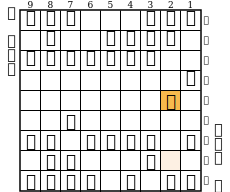

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e
go byoyomi 1000
info currmove 1d1e
info time 0 depth 1 nodes 4 score cp 11 pv 1d1e
info currmove P*2h
info currmove 1d1e
info time 0 depth 2 nodes 156 score cp 1 pv 1d1e P*2c
info currmove P*2h
info time 0 depth 2 nodes 250 score cp 250 pv P*2h 2e2b+
info currmove 1d1e
info time 3 depth 3 nodes 1772 score cp -204 pv 1d1e P*2c 2b1c
info currmove P*2h
info time 4 depth 3 nodes 2978 score cp -196 pv P*2h P*2c 2b1c
info time 5 depth 3 nodes 4473 score cp 11 pv 2a1c 2e2d 1d1e
info currmove 2a1c
info time 13 depth 4 nodes 12156 score cp -196 pv 2a1c 2e2b+ 3a2b B*2a
info currmove P*2h
info time 19 depth 4 nodes 18199 score cp 1044 pv P*2h 2e2b+ 3a2b B*2d
info time 39 nodes 39451 score cp 1044 pv P*2h 2e2b+ 3a2b B*2d
bestmove P*2h
14手目


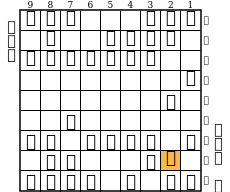

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h
go byoyomi 1000
lns3snl/1r2gkgb1/ppppppp2/8p/7R1/2P6/PP1PPPP1P/1BK3Sp1/LNSG1G1NL b P 15
0:7f7e  move_count:   1 nn_rate:0.00002 win_rate:0.45183
1:9g9f  move_count:   0 nn_rate:0.00506 win_rate:0.00000
2:8g8f  move_count:   0 nn_rate:0.00016 win_rate:0.00000
3:6g6f  move_count:   0 nn_rate:0.00331 win_rate:0.00000
4:5g5f  move_count:   0 nn_rate:0.00409 win_rate:0.00000
5:4g4f  move_count:   1 nn_rate:0.01213 win_rate:0.51613
6:3g3f  move_count:  17 nn_rate:0.05611 win_rate:0.57681
7:1g1f  move_count:   0 nn_rate:0.00457 win_rate:0.00000
8:9i9h  move_count:   0 nn_rate:0.00077 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
10:8i7g  move_count:   0 nn_rate:0.00047 win_rate:0.00000
11:3h2g  move_count:   0 nn_rate:0.00192 win_rate:0.00000
12:7i6h  move_count:   9 nn_rate:0.08267 win_rate:0.49214
13:6i6h  move_count:   0 nn_rate:0.00637 win_rate:0.00000
14:6i5h  move_co

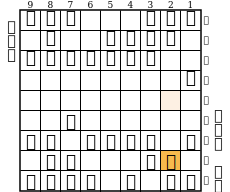

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h
go byoyomi 1000
info currmove 4b4a
info time 0 depth 1 nodes 4 score cp -203 pv 4b4a
info currmove 4b4a
info time 0 depth 1 nodes 31 score cp -199 pv 1d1e
info currmove 1d1e
info time 0 depth 2 nodes 135 score cp -209 pv 1d1e P*2c
info currmove 4b4a
info currmove 1d1e
info time 2 depth 3 nodes 1440 score cp -209 pv 1d1e P*2c 2b1c
info currmove 1d1e
info currmove 1d1e
info time 11 depth 4 nodes 10047 score cp -889 pv 1d1e P*2d 2b1c 2d2c+
info currmove 1d1e
info time 56 nodes 54966 score cp -889 pv 1d1e P*2d 2b1c 2d2c+
bestmove 1d1e
16手目


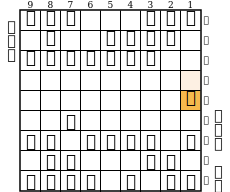

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e
go byoyomi 1000
lns3snl/1r2gkgb1/ppppppp2/9/8p/2P6/PP1PPPP1P/1BK3SR1/LNSG1G1NL b 2P 17
0:7f7e  move_count:   1 nn_rate:0.00004 win_rate:0.41660
1:9g9f  move_count:   5 nn_rate:0.01783 win_rate:0.57852
2:8g8f  move_count:   0 nn_rate:0.00061 win_rate:0.00000
3:6g6f  move_count:   0 nn_rate:0.00487 win_rate:0.00000
4:5g5f  move_count:   0 nn_rate:0.00821 win_rate:0.00000
5:4g4f  move_count:   9 nn_rate:0.03819 win_rate:0.56366
6:3g3f  move_count:  68 nn_rate:0.05536 win_rate:0.62581
7:1g1f  move_count:   1 nn_rate:0.01312 win_rate:0.51865
8:9i9h  move_count:   0 nn_rate:0.00191 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
10:8i7g  move_count:   0 nn_rate:0.00172 win_rate:0.00000
11:3h2g  move_count:  36 nn_rate:0.21283 win_rate:0.53813
12:7i6h  move_count:  38 nn_rate:0.27275 win_rate:0.51997
13:6i6h  move_count:  12 nn_rate:0.03932 win_rate:0.58278
14:6i5h

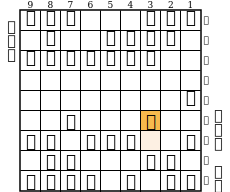

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f
go byoyomi 1000
info currmove 3c3d
info time 0 depth 1 nodes 4 score cp -199 pv 3c3d
info currmove 3c3d
info currmove 3c3d
info time 0 depth 2 nodes 138 score cp -209 pv 3c3d P*2c
info currmove 3c3d
info currmove 3c3d
info time 6 depth 3 nodes 2511 score cp -209 pv 3c3d P*2c 2b8h+
info currmove 3c3d
info currmove 3c3d
info time 12 depth 4 nodes 7912 score cp -904 pv 3c3d 8h2b+ 3a2b 2h2d
info currmove 3c3d
info time 23 depth 4 nodes 18772 score cp -889 pv 5c5d P*2d 2b1c 2d2c+
info time 67 nodes 65803 score cp -889 pv 5c5d P*2d 2b1c 2d2c+
bestmove 5c5d
18手目


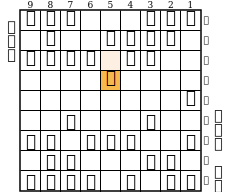

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d
go byoyomi 1000
lns3snl/1r2gkgb1/pppp1pp2/4p4/8p/2P3P2/PP1PPP2P/1BK3SR1/LNSG1G1NL b 2P 19
0:7f7e  move_count:   1 nn_rate:0.00001 win_rate:0.58231
1:3f3e  move_count:   5 nn_rate:0.03290 win_rate:0.61215
2:9g9f  move_count:   3 nn_rate:0.01468 win_rate:0.61848
3:8g8f  move_count:   0 nn_rate:0.00021 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00277 win_rate:0.00000
5:5g5f  move_count:   3 nn_rate:0.01939 win_rate:0.60328
6:4g4f  move_count:  11 nn_rate:0.05959 win_rate:0.61659
7:1g1f  move_count:   0 nn_rate:0.00499 win_rate:0.00000
8:9i9h  move_count:   0 nn_rate:0.00172 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
10:8i7g  move_count:   0 nn_rate:0.00162 win_rate:0.00000
11:2i3g  move_count:  70 nn_rate:0.18024 win_rate:0.65968
12:3h3g  move_count:  22 nn_rate:0.12154 win_rate:0.61245
13:3h2g  move_count:   5 nn_rate:0.03503 win_rate:0.

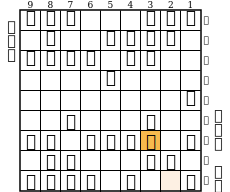

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g
go byoyomi 1000
info currmove 3c3d
info time 0 depth 1 nodes 3 score cp -198 pv 3c3d
info currmove 3c3d
info time 0 depth 2 nodes 145 score cp -208 pv 3c3d P*2c
info currmove 3c3d
info currmove 3c3d
info time 4 depth 3 nodes 2822 score cp -208 pv 3c3d P*2c 2b8h+
info currmove 3c3d
info currmove 3c3d
info time 11 depth 4 nodes 8717 score cp -903 pv 3c3d 8h2b+ 3a2b 2h2d
info currmove 3c3d
info time 21 depth 4 nodes 20716 score cp -888 pv 6c6d P*2d 2b1c 2d2c+
info time 77 nodes 76900 score cp -888 pv 6c6d P*2d 2b1c 2d2c+
bestmove 6c6d
20手目


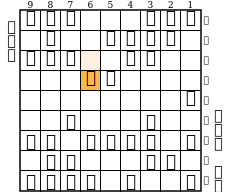

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d
go byoyomi 1000
lns3snl/1r2gkgb1/ppp2pp2/3pp4/8p/2P3P2/PP1PPPN1P/1BK3SR1/LNSG1G2L b 2P 21
0:7f7e  move_count:   1 nn_rate:0.00004 win_rate:0.61309
1:3f3e  move_count:   4 nn_rate:0.02565 win_rate:0.66036
2:9g9f  move_count:   0 nn_rate:0.01108 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00034 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00299 win_rate:0.00000
5:5g5f  move_count:   5 nn_rate:0.03155 win_rate:0.64398
6:4g4f  move_count:  12 nn_rate:0.07329 win_rate:0.64952
7:1g1f  move_count:   0 nn_rate:0.00570 win_rate:0.00000
8:9i9h  move_count:   0 nn_rate:0.00264 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
10:3g4e  move_count:   6 nn_rate:0.03844 win_rate:0.64364
11:3g2e  move_count:   0 nn_rate:0.00311 win_rate:0.00000
12:8i7g  move_count:   0 nn_rate:0.00230 win_rate:0.00000
13:3h2g  move_count:   8 nn_rate:0.07156 w

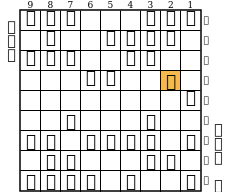

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d
go byoyomi 1000
info currmove 2b1c
info time 0 depth 1 nodes 3 score cp -208 pv 2b1c
info time 0 depth 1 nodes 32 score cp -206 pv 6d6e
info currmove 6d6e
info time 1 depth 2 nodes 131 score cp -1291 pv 6d6e 2d2c+
info currmove 2b1c
info time 2 depth 2 nodes 207 score cp -888 pv 2b1c 2d2c+
info currmove 6d6e
info time 4 depth 3 nodes 1322 score cp -2666 pv 6d6e 2d2c+ 3b2c
info currmove 2b1c
info time 5 depth 3 nodes 2413 score cp -2043 pv 2b1c 2d2c+ 1c5g+
info time 7 depth 3 nodes 3807 score cp -1292 pv 3c3d 2d2c+ 2b8h+
info currmove 3c3d
info time 14 depth 4 nodes 9589 score cp -645 pv 3c3d 8h2b+ 3a2b B*6a
info currmove 2b1c
info time 30 nodes 24968 score cp -645 pv 3c3d 8h2b+ 3a2b B*6a
bestmove 3c3d
22手目


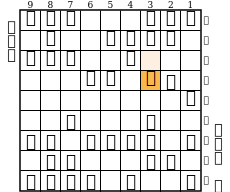

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d
go byoyomi 1000
lns3snl/1r2gkgb1/ppp2p3/3pp1pP1/8p/2P3P2/PP1PPPN1P/1BK3SR1/LNSG1G2L b P 23
0:2d2c  move_count:   1 nn_rate:0.00480 win_rate:0.65984
1:2d2c+ move_count: 125 nn_rate:0.43191 win_rate:0.69349
2:7f7e  move_count:   0 nn_rate:0.00002 win_rate:0.00000
3:3f3e  move_count:   3 nn_rate:0.02828 win_rate:0.61639
4:9g9f  move_count:   0 nn_rate:0.00715 win_rate:0.00000
5:8g8f  move_count:   0 nn_rate:0.00015 win_rate:0.00000
6:6g6f  move_count:   0 nn_rate:0.00279 win_rate:0.00000
7:5g5f  move_count:   4 nn_rate:0.02474 win_rate:0.64072
8:4g4f  move_count:  10 nn_rate:0.05845 win_rate:0.65830
9:1g1f  move_count:   0 nn_rate:0.00239 win_rate:0.00000
10:9i9h  move_count:   0 nn_rate:0.00211 win_rate:0.00000
11:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
12:3g4e  move_count:   3 nn_rate:0.02490 win_rate:0.61154
13:3g2e  move_count:   0 nn_rat

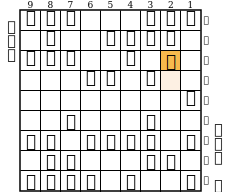

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+
go byoyomi 1000
info currmove 2b8h+
info time 0 depth 1 nodes 4 score cp -1292 pv 2b8h+
info currmove 2b8h+
info currmove 2b8h+
info time 0 depth 2 nodes 85 score cp 475 pv 2b8h+ 7i8h
info currmove 2b8h+
info currmove 2b8h+
info time 1 depth 3 nodes 530 score cp -491 pv 2b8h+ 7i8h 1e1f
info currmove 2b8h+
info currmove 2b8h+
info time 8 depth 4 nodes 6829 score cp -466 pv 2b8h+ 7i8h 1e1f 2c3b
info currmove 2b8h+
info time 61 nodes 50358 score cp -466 pv 2b8h+ 7i8h 1e1f 2c3b
bestmove 2b8h+
24手目


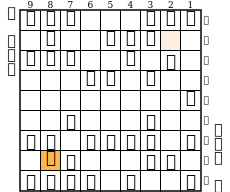

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+
go byoyomi 1000
lns3snl/1r2gkg2/ppp2p1+P1/3pp1p2/8p/2P3P2/PP1PPPN1P/1+bK3SR1/LNSG1G2L b Pb 25
0:7i8h  move_count: 157 nn_rate:0.74038 win_rate:0.70845
1:7h8h  move_count:  23 nn_rate:0.25950 win_rate:0.62393
2:7h6h  move_count:   0 nn_rate:0.00012 win_rate:0.00000
info nps 77 time 2332 nodes 180 hashfull 47 score cp 532 pv 7i8h
bestmove 7i8h
25手目


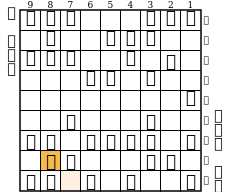

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h
go byoyomi 1000
info currmove 1e1f
info time 0 depth 1 nodes 4 score cp -2444 pv 1e1f
info currmove 1e1f
info currmove 1e1f
info time 1 depth 2 nodes 282 score cp -2454 pv 1e1f 2c3b
info currmove 1e1f
info currmove 1e1f
info time 7 depth 3 nodes 5460 score cp -2657 pv 1e1f 2c3b 3a3b
info currmove 1e1f
info time 9 depth 3 nodes 8085 score cp -2556 pv B*1d P*2b 2a1c
info time 14 depth 3 nodes 12948 score cp -2461 pv 7a7b P*2b 2a1c
info currmove 7a7b
info time 23 depth 4 nodes 22847 score cp -2648 pv 7a7b 2c3b 4b3b 2h2d
info currmove 1e1f
info time 33 depth 4 nodes 32479 score cp -2447 pv 1e1f 2c3b 3a3b 2h2g
info time 65 nodes 63689 score cp -2447 pv 1e1f 2c3b 3a3b 2h2g
bestmove 1e1f
26手目


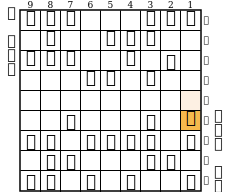

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f
go byoyomi 1000
lns3snl/1r2gkg2/ppp2p1+P1/3pp1p2/9/2P3P1p/PP1PPPN1P/1SK3SR1/LN1G1G2L b BPb 27
0:7f7e  move_count:   1 nn_rate:0.00002 win_rate:0.59604
1:3f3e  move_count:   0 nn_rate:0.00332 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00114 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00088 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00016 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00215 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00583 win_rate:0.00000
7:1g1f  move_count:  63 nn_rate:0.25681 win_rate:0.72406
8:9i9h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00002 win_rate:0.00000
10:3g4e  move_count:   0 nn_rate:0.00554 win_rate:0.00000
11:3g2e  move_count:   0 nn_rate:0.00119 win_rate:0.00000
12:8i7g  move_count:   0 nn_rate:0.00196 win_rate:0.00000
13:8h7

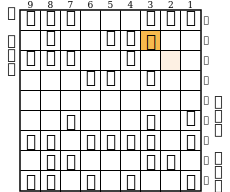

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b
go byoyomi 1000
info currmove 3a3b
info time 0 depth 1 nodes 4 score cp -2657 pv 3a3b
info currmove 3a3b
info currmove 3a3b
info time 0 depth 2 nodes 252 score cp -2447 pv 3a3b 2h2g
info currmove 3a3b
info currmove 3a3b
info time 9 depth 3 nodes 8510 score cp -2769 pv 3a3b 2h2b+ 1f1g+
info currmove 3a3b
info time 17 depth 3 nodes 16365 score cp -2589 pv 4b3b G*2c 3b4b
info currmove 4b3b
info time 43 depth 4 nodes 43216 score cp -2379 pv 4b3b G*2c 3b4b 2h2g
info currmove 3a3b
info time 82 depth 4 nodes 78574 score cp -2078 pv 3a3b 2h2b+ B*4d G*2c
info time 99 nodes 94342 score cp -2078 pv 3a3b 2h2b+ B*4d G*2c
bestmove 3a3b
28手目


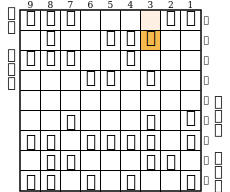

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b
go byoyomi 1000
lns4nl/1r2gks2/ppp2p3/3pp1p2/9/2P3P1p/PP1PPPN1P/1SK3SR1/LN1G1G2L b BGPbp 29
0:7f7e  move_count:   1 nn_rate:0.00001 win_rate:0.64597
1:3f3e  move_count:   0 nn_rate:0.01269 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00132 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00119 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00048 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00157 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00558 win_rate:0.00000
7:1g1f  move_count: 185 nn_rate:0.55587 win_rate:0.73206
8:9i9h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00005 win_rate:0.00000
10:3g4e  move_count:   3 nn_rate:0.02882 win_rate:0.63974
11:3g2e  move_count:   0 nn_rate:0.00389 win_rate:0.00000
12:8i7g  move_count:   0 nn_rate:0.00622 win_rate:0.0000

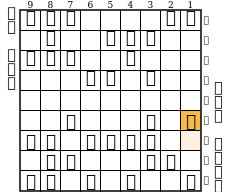

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f
go byoyomi 1000
info currmove P*2g
info time 0 depth 1 nodes 4 score cp -2868 pv P*2g
info currmove P*2g
info time 0 depth 1 nodes 102 score cp -2668 pv 7a7b
info currmove P*2g
info time 1 depth 2 nodes 375 score cp -2663 pv P*2g 2h2i
info currmove 7a7b
info time 2 depth 2 nodes 868 score cp -2472 pv 1a1f 2h2i
info time 2 depth 2 nodes 1101 score cp -1638 pv P*1h 2h1h
info currmove P*1h
info time 16 depth 3 nodes 16463 score cp -2878 pv P*1h P*2b 2a1c
info currmove 7a7b
info time 22 depth 3 nodes 24818 score cp -2850 pv P*2g 2h2i 3b3c
info time 34 depth 3 nodes 35883 score cp -2808 pv P*2c G*4e 7a7b
info currmove P*1h
info time 72 depth 4 nodes 76454 score cp -1648 pv P*1h P*2b 2a1c 2h1h
info currmove P*2c
info time 129 depth 4 nodes 131903 score cp -1354 pv P*2g 2h2g 1a1f G*2i
info time 365 nodes 357364 score cp -135

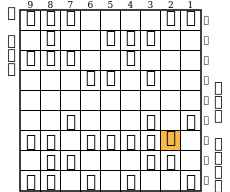

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g
go byoyomi 1000
lns4nl/1r2gks2/ppp2p3/3pp1p2/9/2P3P1P/PP1PPPNp1/1SK3SR1/LN1G1G2L b BG2Pb 31
0:7f7e  move_count:   1 nn_rate:0.00000 win_rate:0.65758
1:3f3e  move_count:   0 nn_rate:0.00097 win_rate:0.00000
2:1f1e  move_count:   0 nn_rate:0.00006 win_rate:0.00000
3:9g9f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
5:6g6f  move_count:   0 nn_rate:0.00002 win_rate:0.00000
6:5g5f  move_count:   0 nn_rate:0.00008 win_rate:0.00000
7:4g4f  move_count:   0 nn_rate:0.00020 win_rate:0.00000
8:9i9h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
9:1i1g  move_count:   0 nn_rate:0.00004 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:3g4e  move_count:   0 nn_rate:0.00120 win_rate:0.00000
12:3g2e  move_count:   0 nn_rate:0.00012 win_r

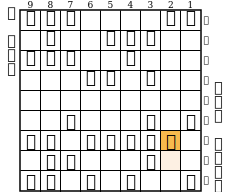

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g
go byoyomi 1000
info currmove 1a1f
info time 0 depth 1 nodes 4 score cp -3907 pv 1a1f
info currmove 1a1f
info time 1 depth 1 nodes 88 score cp -2873 pv 7a7b
info currmove 1a1f
info time 2 depth 2 nodes 395 score cp -2682 pv 1a1f 2g2i
info currmove 7a7b
info currmove 1a1f
info time 12 depth 3 nodes 10552 score cp -3817 pv 1a1f B*1e 2a3c
info currmove 7a7b
info time 28 depth 3 nodes 21882 score cp -3352 pv 2a1c 2g2b+ B*3c
info time 35 depth 3 nodes 29210 score cp -3265 pv 2a3c 2g2b+ 1a1d
info time 45 depth 3 nodes 39720 score cp -3258 pv 1a1c 2g2b+ 7a7b
info time 59 depth 3 nodes 53710 score cp -3103 pv B*3c G*2d 3c4d
info currmove 1a1f
info time 95 depth 4 nodes 90349 score cp -2574 pv 1a1f B*1e 3b3c 2g2i
info currmove B*3c
info time 287 nodes 273209 score cp -2574 pv 1a1f B*1e 3b3c 2g2i
bestmove 1a1f
32手目


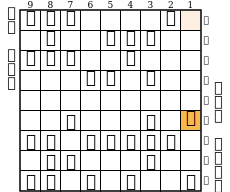

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f
go byoyomi 1000
lns4n1/1r2gks2/ppp2p3/3pp1p2/9/2P3P1l/PP1PPPNR1/1SK3S2/LN1G1G2L b BG3Pbp 33
0:7f7e  move_count:   1 nn_rate:0.00001 win_rate:0.79838
1:3f3e  move_count:   0 nn_rate:0.00665 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00057 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00066 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00031 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00096 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00557 win_rate:0.00000
7:9i9h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
8:1i1f  move_count: 158 nn_rate:0.70323 win_rate:0.80019
9:1i1g  move_count:   0 nn_rate:0.00010 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00010 win_rate:0.00000
11:3g4e  move_count:   0 nn_rate:0.02024 win_rate:0.00000
12:3g2e  move_count:   0 nn_rate:0.0

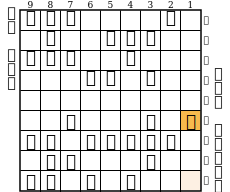

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f
go byoyomi 1000
info currmove B*1h
info time 0 depth 1 nodes 4 score cp -3998 pv B*1h
info currmove B*1h
info time 0 depth 1 nodes 98 score cp -3898 pv P*1h
info currmove P*1h
info time 0 depth 2 nodes 482 score cp -4492 pv P*1h 1f1b+
info currmove B*1h
info time 1 depth 2 nodes 820 score cp -4182 pv B*1h 1f1b+
info time 1 depth 2 nodes 1234 score cp -3903 pv P*2f 2g2h
info currmove P*2f
info time 19 depth 3 nodes 21403 score cp -3995 pv P*2f B*1e 3b3c
info currmove P*1h
info currmove P*2f
info time 70 depth 4 nodes 75247 score cp -3693 pv P*2f B*1e B*2d 1e2d
info currmove P*2f
info time 336 nodes 392627 score cp -3693 pv P*2f B*1e B*2d 1e2d
bestmove P*2f
34手目


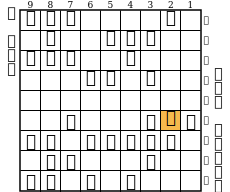

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f
go byoyomi 1000
lns4n1/1r2gks2/ppp2p3/3pp1p2/9/2P3PpL/PP1PPPNR1/1SK3S2/LN1G1G3 b BGL3Pb 35
0:7f7e  move_count:   1 nn_rate:0.00000 win_rate:0.79379
1:3f3e  move_count:   0 nn_rate:0.00062 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00013 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00022 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00010 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00017 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00039 win_rate:0.00000
7:1f1a+ move_count:   0 nn_rate:0.00071 win_rate:0.00000
8:1f1b  move_count:   0 nn_rate:0.00053 win_rate:0.00000
9:1f1b+ move_count:   0 nn_rate:0.01970 win_rate:0.00000
10:1f1c  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:1f1c+ move_count:   0 nn_rate:0.00029 win_rate:0.00000
12:1f1d  move_count:   0 nn

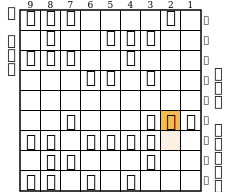

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f
go byoyomi 1000
info currmove B*1g
info time 0 depth 1 nodes 4 score cp -4213 pv B*1g
info currmove B*1g
info time 0 depth 1 nodes 88 score cp -4118 pv 7a7b
info currmove B*1g
info time 0 depth 2 nodes 476 score cp -4592 pv B*1g 2f2b+
info currmove 7a7b
info time 2 depth 2 nodes 1099 score cp -4213 pv B*4d 2f2d
info currmove B*4d
info time 17 depth 3 nodes 16032 score cp -4211 pv B*4d 2f2d 3d3e
info currmove 7a7b
info currmove B*4d
info time 61 depth 4 nodes 66489 score cp -4127 pv B*4d B*1e 4b3a 2f2d
info currmove B*4d
info time 251 nodes 297999 score cp -4127 pv B*4d B*1e 4b3a 2f2d
bestmove B*4d
36手目


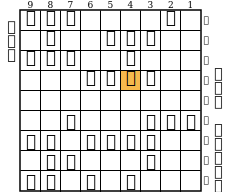

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d
go byoyomi 1000
lns4n1/1r2gks2/ppp2p3/3ppbp2/9/2P3PRL/PP1PPPN2/1SK3S2/LN1G1G3 b BGL4P 37
0:7f7e  move_count:   2 nn_rate:0.00004 win_rate:0.74110
1:3f3e  move_count:  33 nn_rate:0.11959 win_rate:0.77232
2:9g9f  move_count:   0 nn_rate:0.00091 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00129 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00222 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00058 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.01756 win_rate:0.00000
7:1f1a+ move_count:   0 nn_rate:0.00042 win_rate:0.00000
8:1f1b  move_count:   0 nn_rate:0.00025 win_rate:0.00000
9:1f1b+ move_count:   6 nn_rate:0.02615 win_rate:0.74800
10:1f1c  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:1f1c+ move_count:   0 nn_rate:0.00050 win_rate:0.00000
12:1f1d  move_count

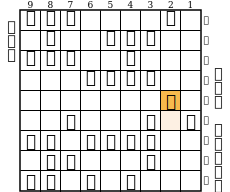

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e
go byoyomi 1000
info currmove 4d1g+
info time 0 depth 1 nodes 4 score cp -4011 pv 4d1g+
info currmove 4d8h+
info currmove 4d1g+
info time 1 depth 2 nodes 427 score cp -4605 pv 4d1g+ 1f1b+
info currmove 4d8h+
info time 1 depth 2 nodes 433 score cp -3957 pv 4d8h+ 7h8h
info currmove 4d1g+
info time 12 depth 3 nodes 11980 score cp -4605 pv 4d1g+ 1f1b+ 2a3c
info currmove 4d8h+
info time 12 depth 3 nodes 12199 score cp -3485 pv 4d8h+ 7h8h S*1g
info currmove 4d8h+
info time 23 depth 4 nodes 23620 score cp -4039 pv 4d8h+ 7h8h S*1g 1f1b+
info currmove 4d8h+
info time 122 nodes 128113 score cp -4039 pv 4d8h+ 7h8h S*1g 1f1b+
bestmove 4d8h+
38手目


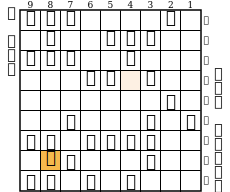

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+
go byoyomi 1000
lns4n1/1r2gks2/ppp2p3/3pp1p2/7R1/2P3P1L/PP1PPPN2/1+bK3S2/LN1G1G3 b BGL4Ps 39
0:7h8h  move_count: 158 nn_rate:0.99003 win_rate:0.78110
1:7h6h  move_count:   0 nn_rate:0.00997 win_rate:0.00000
info nps 55 time 2871 nodes 158 hashfull 38 score cp 763 pv 7h8h
bestmove 7h8h
39手目


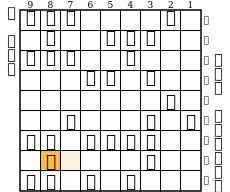

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h
go byoyomi 1000
info currmove S*1g
info time 0 depth 1 nodes 4 score cp -5924 pv S*1g
info currmove S*1g
info time 0 depth 1 nodes 84 score cp -5864 pv 2a3c
info time 0 depth 1 nodes 86 score cp -5863 pv 4b3c
info currmove 4b3c
info time 1 depth 2 nodes 491 score cp -6457 pv 4b3c 1f1b+
info currmove S*1g
info time 1 depth 2 nodes 939 score cp -6243 pv 2a3c 2e2b+
info currmove 2a3c
info time 11 depth 3 nodes 13348 score cp -6124 pv 2a3c 2e2b+ S*2a
info currmove 4b3c
info currmove 2a3c
info time 68 depth 4 nodes 89774 score cp -6306 pv 2a3c 2e2i S*1h 2i2b+
info currmove 2a3c
info time 223 nodes 280154 score cp -6306 pv 2a3c 2e2i S*1h 2i2b+
bestmove 2a3c
40手目


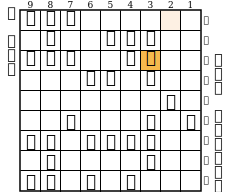

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c
go byoyomi 1000
lns6/1r2gks2/ppp2pn2/3pp1p2/7R1/2P3P1L/PP1PPPN2/1K4S2/LN1G1G3 b 2BGL4Ps 41
0:7f7e  move_count:   1 nn_rate:0.00003 win_rate:0.86358
1:3f3e  move_count:   0 nn_rate:0.00408 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00217 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00008 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00181 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00082 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00179 win_rate:0.00000
7:1f1a+ move_count:   0 nn_rate:0.00015 win_rate:0.00000
8:1f1b  move_count:   0 nn_rate:0.00007 win_rate:0.00000
9:1f1b+ move_count:   0 nn_rate:0.00097 win_rate:0.00000
10:1f1c  move_count:   0 nn_rate:0.00002 win_rate:0.00000
11:1f1c+ move_count:   0 nn_rate:0.00062 win_rate:0.00

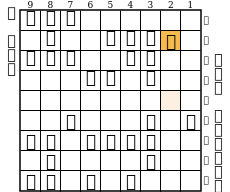

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+
go byoyomi 1000
info currmove S*2a
info time 0 depth 1 nodes 4 score cp -6127 pv S*2a
info currmove S*2a
info time 0 depth 1 nodes 81 score cp -6062 pv 7a7b
info currmove S*2a
info time 1 depth 2 nodes 484 score cp -6127 pv S*2a 2b2d
info currmove 7a7b
info currmove S*2a
info time 4 depth 3 nodes 5029 score cp -6444 pv S*2a B*3a 4b4a
info currmove 7a7b
info time 7 depth 3 nodes 9437 score cp -6327 pv S*3a 2b2d 7a7b
info currmove S*3a
info time 53 depth 4 nodes 71332 score cp -6716 pv S*3a 2b1a 7a7b 1f1c+
info currmove S*2a
info time 257 nodes 320955 score cp -6716 pv S*3a 2b1a 7a7b 1f1c+
bestmove S*3a
42手目


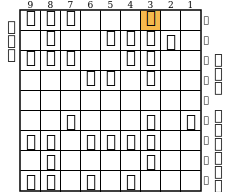

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a
go byoyomi 1000
lns3s2/1r2gks+R1/ppp2pn2/3pp1p2/9/2P3P1L/PP1PPPN2/1K4S2/LN1G1G3 b 2BGL4P 43
0:7f7e  move_count:   2 nn_rate:0.00004 win_rate:0.81617
1:3f3e  move_count:   0 nn_rate:0.01324 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00578 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00015 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00301 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00390 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00313 win_rate:0.00000
7:1f1a+ move_count:   0 nn_rate:0.00446 win_rate:0.00000
8:1f1b  move_count:   0 nn_rate:0.00192 win_rate:0.00000
9:1f1b+ move_count:   0 nn_rate:0.00268 win_rate:0.00000
10:1f1c  move_count:   0 nn_rate:0.00022 win_rate:0.00000
11:1f1c+ move_count:   0 nn_rate:0.00755 w

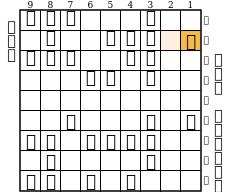

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b
go byoyomi 1000
info currmove 7a7b
info time 0 depth 1 nodes 4 score cp -6122 pv 7a7b
info currmove 7a7b
info currmove 7a7b
info time 0 depth 2 nodes 383 score cp -6716 pv 7a7b 1f1c+
info currmove 7a7b
info currmove 7a7b
info time 14 depth 3 nodes 20598 score cp -6714 pv 7a7b 1f1c+ 5d5e
info currmove 7a7b
info currmove 7a7b
info time 47 depth 4 nodes 68503 score cp -7215 pv 7a7b P*1d 5d5e 1d1c+
info currmove 7a7b
info time 88 depth 4 nodes 122457 score cp -6982 pv 5d5e B*2d 7a7b 1f1c+
info time 191 depth 4 nodes 254308 score cp -6719 pv 6d6e 4i5h 7a7b 1f1c+
info time 214 nodes 284910 score cp -6719 pv 6d6e 4i5h 7a7b 1f1c+
bestmove 6d6e
44手目


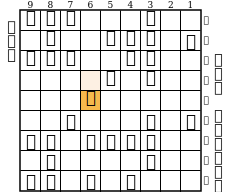

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e
go byoyomi 1000
lns3s2/1r2gks1+R/ppp2pn2/4p1p2/3p5/2P3P1L/PP1PPPN2/1K4S2/LN1G1G3 b 2BGL4P 45
0:7f7e  move_count:   4 nn_rate:0.00014 win_rate:0.87031
1:3f3e  move_count:  39 nn_rate:0.04379 win_rate:0.90840
2:9g9f  move_count:   0 nn_rate:0.01228 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00022 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00209 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00336 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00541 win_rate:0.00000
7:1f1c  move_count:   0 nn_rate:0.00060 win_rate:0.00000
8:1f1c+ move_count:  46 nn_rate:0.05017 win_rate:0.91027
9:1f1d  move_count:   0 nn_rate:0.00092 win_rate:0.00000
10:1f1e  move_count:   0 nn_rate:0.00351 win_rate:0.00000
11:9i9h  move_count:   0 nn_rat

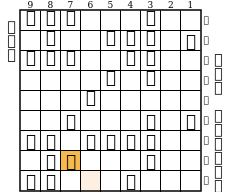

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h
go byoyomi 1000
info currmove 7a7b
info time 0 depth 1 nodes 3 score cp -6123 pv 7a7b
info currmove 7a7b
info time 0 depth 2 nodes 373 score cp -6717 pv 7a7b 1f1c+
info currmove 7a7b
info currmove 7a7b
info time 14 depth 3 nodes 19341 score cp -6715 pv 7a7b 1f1c+ 5d5e
info currmove 7a7b
info time 18 depth 3 nodes 23984 score cp -6710 pv 8b6b 1f1c+ 6e6f
info currmove 7a7b
info time 49 depth 4 nodes 68811 score cp -7216 pv 7a7b P*1d 5d5e 1d1c+
info currmove 8b6b
info time 87 depth 4 nodes 109605 score cp -6715 pv 8b6b 1f1c+ 6e6f 4i5h
info time 113 nodes 144403 score cp -6715 pv 8b6b 1f1c+ 6e6f 4i5h
bestmove 8b6b
46手目


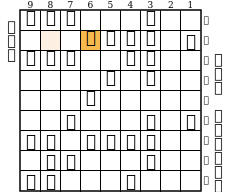

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b
go byoyomi 1000
lns3s2/3rgks1+R/ppp2pn2/4p1p2/3p5/2P3P1L/PP1PPPN2/1KG3S2/LN3G3 b 2BGL4P 47
0:7f7e  move_count:   2 nn_rate:0.00020 win_rate:0.88864
1:3f3e  move_count:  40 nn_rate:0.08295 win_rate:0.92209
2:9g9f  move_count:   0 nn_rate:0.02470 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00047 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00104 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00975 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.01325 win_rate:0.00000
7:1f1c  move_count:   0 nn_rate:0.00063 win_rate:0.00000
8:1f1c+ move_count:  33 nn_rate:0.05315 win_rate:0.92904
9:1f1d  move_count:   0 nn_rate:0.00105 win_rate:0.00000
10:1f1e  move_count:   0 nn_rate:0.00451 win_rate:0.00000
11:9i9h  move_count:   

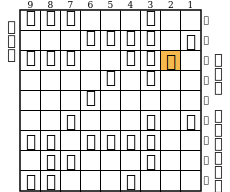

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c
go byoyomi 1000
info currmove 6e6f
info time 0 depth 1 nodes 4 score cp -6126 pv 6e6f
info currmove 6e6f
info currmove 6e6f
info time 1 depth 2 nodes 361 score cp -6131 pv 6e6f 4i5h
info currmove 6e6f
info currmove 6e6f
info time 8 depth 3 nodes 7968 score cp -6666 pv 6e6f 2c2b+ 6f6g+
info currmove 6e6f
info currmove 6e6f
info time 62 depth 4 nodes 53712 score cp -6641 pv 6e6f 2c2b+ 3a2b 1b2b
info currmove 6e6f
info time 109 nodes 105938 score cp -6641 pv 6e6f 2c2b+ 3a2b 1b2b
bestmove 6e6f
48手目


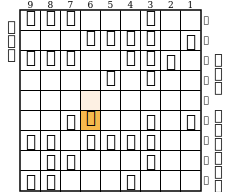

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f
go byoyomi 1000
lns3s2/3rgks1+R/ppp2pnP1/4p1p2/9/2Pp2P1L/PP1PPPN2/1KG3S2/LN3G3 b 2BGL3P 49
0:2c2b  move_count:   1 nn_rate:0.00022 win_rate:0.83191
1:2c2b+ move_count:   5 nn_rate:0.04989 win_rate:0.82409
2:7f7e  move_count:   0 nn_rate:0.00003 win_rate:0.00000
3:3f3e  move_count:   0 nn_rate:0.01192 win_rate:0.00000
4:9g9f  move_count:   0 nn_rate:0.00275 win_rate:0.00000
5:8g8f  move_count:   0 nn_rate:0.00007 win_rate:0.00000
6:6g6f  move_count: 160 nn_rate:0.83931 win_rate:0.87919
7:5g5f  move_count:   0 nn_rate:0.00259 win_rate:0.00000
8:4g4f  move_count:   0 nn_rate:0.00144 win_rate:0.00000
9:1f1c  move_count:   0 nn_rate:0.00015 win_rate:0.00000
10:1f1c+ move_count:   0 nn_rate:0.00856 win_rate:0.00000
11:1f1d  move

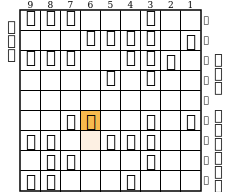

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f
go byoyomi 1000
info currmove 6b6f
info time 1 depth 1 nodes 4 score cp -6141 pv 6b6f
info currmove 6b6f
info currmove 6b6f
info time 1 depth 2 nodes 374 score cp -7021 pv 6b6f 2c2b+
info currmove 6b6f
info currmove 6b6f
info time 11 depth 3 nodes 11327 score cp -10151 pv 6b6f B*7e 6f6d
info currmove 6b6f
info time 14 depth 3 nodes 15594 score cp -7971 pv 6b6d 2c2b+ 6d6f
info time 17 depth 3 nodes 19402 score cp -7966 pv 7a7b 2c2b+ 6b6f
info currmove 6b6f
info time 82 depth 4 nodes 66516 score cp -8286 pv 6b6f B*7e 4b4a 7e6f
info currmove 7a7b
info time 132 depth 4 nodes 108296 score cp -7956 pv 7a7b 2c2b+ 6b6f 2b3a
info time 177 nodes 158048 score cp -7956 pv 7a7b 2c2b+ 6b6f 2b3a
bestmove 7a7b
50手目


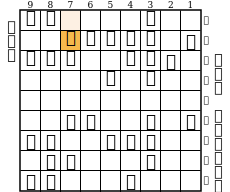

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b
go byoyomi 1000
ln4s2/2srgks1+R/ppp2pnP1/4p1p2/9/2PP2P1L/PP2PPN2/1KG3S2/LN3G3 b 2BGL4P 51
0:2c2b  move_count:   1 nn_rate:0.00143 win_rate:0.87050
1:2c2b+ move_count:  89 nn_rate:0.37701 win_rate:0.84934
2:7f7e  move_count:   0 nn_rate:0.00023 win_rate:0.00000
3:6f6e  move_count:   0 nn_rate:0.00361 win_rate:0.00000
4:3f3e  move_count:  40 nn_rate:0.07209 win_rate:0.88946
5:9g9f  move_count:   0 nn_rate:0.02071 win_rate:0.00000
6:8g8f  move_count:   0 nn_rate:0.00015 win_rate:0.00000
7:5g5f  move_count:   0 nn_rate:0.00875 win_rate:0.00000
8:4g4f  move_count:   0 nn_rate:0.01251 win_rate:0.00000
9:1f1c  move_count:   0 nn_rate:0.00098 win_rate:0.00000
10:1f1c+ move_count:  43 nn_rate:0.03592 win_rate:0.90444
11:1

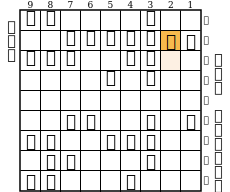

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+
go byoyomi 1000
info currmove 6b6f
info time 0 depth 1 nodes 4 score cp -7966 pv 6b6f
info currmove 6b6f
info currmove 6b6f
info time 1 depth 2 nodes 399 score cp -7956 pv 6b6f 2b3a
info currmove 6b6f
info currmove 6b6f
info time 9 depth 3 nodes 8683 score cp -11231 pv 6b6f B*7e 6f6d
info currmove 6b6f
info time 14 depth 3 nodes 15781 score cp -8146 pv 3a2b L*6e P*6d
info currmove 6b6f
info time 85 depth 4 nodes 71775 score cp -9355 pv 6b6f B*7e 4b5a 7e3a+
info currmove 3a2b
info time 135 depth 4 nodes 118481 score cp -8074 pv 3a2b B*7e 4b4a 1b2b
info time 181 nodes 172920 score cp -8074 pv 3a2b B*7e 4b4a 1b2b
bestmove 3a2b
52手目


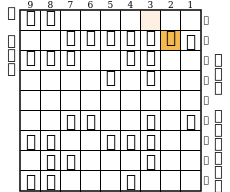

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b
go byoyomi 1000
ln7/2srgkss+R/ppp2pn2/4p1p2/9/2PP2P1L/PP2PPN2/1KG3S2/LN3G3 b 2BGL4Pp 53
0:7f7e  move_count:   1 nn_rate:0.00016 win_rate:0.81666
1:6f6e  move_count:   0 nn_rate:0.00259 win_rate:0.00000
2:3f3e  move_count:   7 nn_rate:0.03129 win_rate:0.84723
3:9g9f  move_count:   0 nn_rate:0.01031 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00010 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00412 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00648 win_rate:0.00000
7:1f1c  move_count:   0 nn_rate:0.00005 win_rate:0.00000
8:1f1c+ move_count:   0 nn_rate:0.00579 win_rate:0.00000
9:1f1d  move_count:   0 nn_rate:0.00056 win_rate:0.00000
10:1f1e  move_count:   0 nn_rate:0.00130 win_rate:0.0

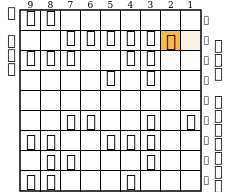

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b
go byoyomi 1000
info currmove 6b6f
info time 0 depth 1 nodes 4 score cp -7956 pv 6b6f
info currmove P*2a
info currmove 6b6f
info time 1 depth 2 nodes 527 score cp -8345 pv 6b6f 1f1c+
info currmove P*2a
info time 2 depth 2 nodes 979 score cp -7962 pv P*2a 2b2d
info currmove 6b6f
info time 10 depth 3 nodes 11329 score cp -11966 pv 6b6f B*7e 6f6d
info currmove P*2a
info time 14 depth 3 nodes 16555 score cp -8166 pv P*2a 2b2d 6b6f
info currmove P*2a
info time 80 depth 4 nodes 97832 score cp -8350 pv P*2a 2b2d 6b6f 1f1b+
info currmove P*2a
info time 202 nodes 239985 score cp -8350 pv P*2a 2b2d 6b6f 1f1b+
bestmove P*2a
54手目


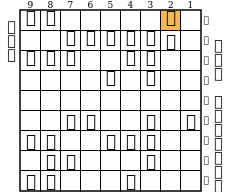

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a
go byoyomi 1000
ln5p1/2srgks+R1/ppp2pn2/4p1p2/9/2PP2P1L/PP2PPN2/1KG3S2/LN3G3 b 2BGSL4P 55
0:7f7e  move_count:   2 nn_rate:0.00005 win_rate:0.75670
1:6f6e  move_count:   0 nn_rate:0.00085 win_rate:0.00000
2:3f3e  move_count:   0 nn_rate:0.00640 win_rate:0.00000
3:9g9f  move_count:   0 nn_rate:0.00277 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00006 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00205 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00159 win_rate:0.00000
7:1f1a+ move_count:   0 nn_rate:0.00087 win_rate:0.00000
8:1f1b  move_count:   0 nn_rate:0.00154 win_rate:0.00000
9:1f1b+ move_count:   0 nn_rate:0.00062 win_rate:0.00000
10:1f1c  move_count:   0 nn_rate:0.00005 

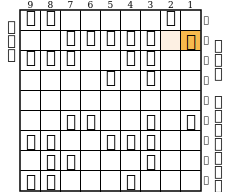

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b
go byoyomi 1000
info currmove 6b6f
info time 0 depth 1 nodes 4 score cp -7961 pv 6b6f
info currmove 6b6f
info currmove 6b6f
info time 1 depth 2 nodes 471 score cp -8350 pv 6b6f 1f1c+
info currmove 6b6f
info currmove 6b6f
info time 11 depth 3 nodes 13400 score cp -11971 pv 6b6f B*7e 6f6d
info currmove 6b6f
info time 15 depth 3 nodes 19083 score cp -10151 pv 6b6d S*2c 6d6f
info time 20 depth 3 nodes 24595 score cp -9327 pv 6b6a G*8b 6a6b
info currmove 6b6f
info time 114 depth 4 nodes 105530 score cp -10069 pv 6b6f B*7e 4b4a 7e6f
info currmove 6b6a
info time 187 depth 4 nodes 178876 score cp -9131 pv 6b6a G*8b 6a6b 8b9a
info time 282 nodes 285877 score cp -9131 pv 6b6a G*8b 6a6b 8b9a
bestmo

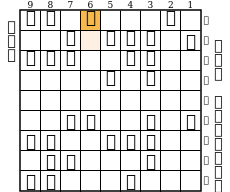

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a
go byoyomi 1000
ln1r3p1/2s1gks1+R/ppp2pn2/4p1p2/9/2PP2P1L/PP2PPN2/1KG3S2/LN3G3 b 2BGSL4P 57
0:7f7e  move_count:  13 nn_rate:0.00021 win_rate:0.88532
1:6f6e  move_count:   0 nn_rate:0.00620 win_rate:0.00000
2:3f3e  move_count:  24 nn_rate:0.05931 win_rate:0.91709
3:9g9f  move_count:   0 nn_rate:0.01759 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00037 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00893 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00922 win_rate:0.00000
7:1f1c  move_count:   0 nn_rate:0.00078 win_rate:0.00000
8:1f1c+ move_count:  80 nn_rate:0.10586 win_rate:0.93654
9:1f1d  move_count:   0 nn_rate:0.00278 win_rate:0.00000
10:1f1e  move_count:   0 nn_r

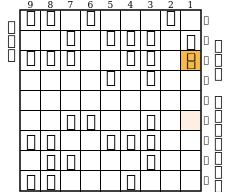

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+
go byoyomi 1000
info time 0 depth 1 nodes 31 score cp -8555 pv 6a6f
info currmove 6a6f
info time 0 depth 2 nodes 469 score cp -8360 pv 6a6f P*2b
info currmove 6a6f
info time 7 depth 3 nodes 8996 score cp -12565 pv 6a6f B*7e 6f6d
info currmove 6a6f
info time 12 depth 3 nodes 13777 score cp -10745 pv 6a6b S*2c 6b6f
info time 20 depth 3 nodes 20167 score cp -9919 pv 5d5e G*8b 6a6b
info currmove 6a6f
info time 90 depth 4 nodes 82862 score cp -10632 pv 6a6f B*7e 4b4a 7e6f
info currmove 5d5e
info time 160 depth 4 nodes 150500 score cp -9417 pv 5d5e G*8b 5e5f 8b7b
info time 227 nodes 226593 score cp -9417 pv 5d5e G*8b 5e5f 8b7b
bestmove 5d5e
58手目


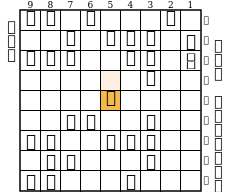

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e
go byoyomi 1000
ln1r3p1/2s1gks1+R/ppp2pn1+L/6p2/4p4/2PP2P2/PP2PPN2/1KG3S2/LN3G3 b 2BGSL4P 59
0:7f7e  move_count:   5 nn_rate:0.00018 win_rate:0.92367
1:6f6e  move_count:   0 nn_rate:0.00621 win_rate:0.00000
2:3f3e  move_count:  29 nn_rate:0.06105 win_rate:0.94812
3:9g9f  move_count:   0 nn_rate:0.01875 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00053 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.01102 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.01083 win_rate:0.00000
7:9i9h  move_count:   0 nn_rate:0.00785 win_rate:0.00000
8:3g4e  move_count:  20 nn_rate:0.09003 win_rate:0.90772
9:3g2e  move_count:   0 nn_rate:0.01117 win_rate:0.00000
10:8i7g  move_cou

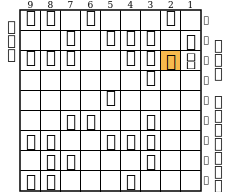

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c
go byoyomi 1000
info currmove 6a6f
info time 0 depth 1 nodes 4 score cp -8563 pv 6a6f
info currmove 6a6f
info currmove 6a6f
info time 0 depth 2 nodes 450 score cp -8548 pv 6a6f 2c2b+
info currmove 6a6f
info currmove 6a6f
info time 12 depth 3 nodes 13364 score cp -12573 pv 6a6f B*7e 6f6d
info currmove 6a6f
info time 16 depth 3 nodes 17899 score cp -9989 pv 6a6b L*6e 5b6c
info time 20 depth 3 nodes 23284 score cp -9929 pv 6a6d G*8b 6d6b
info time 25 depth 3 nodes 29134 score cp -9927 pv 7c7d G*8b 7b7c
info time 31 depth 3 nodes 36001 score cp -9922 pv 7b6c G*8b 5e5f
info time 37 depth 3 nodes 42481 score cp -9447 pv 5e5f G*8b 5f5g+
info currmove 6a6f
info time 102 dept

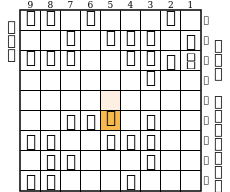

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f
go byoyomi 1000
ln1r3p1/2s1gks1+R/ppp2pnP+L/6p2/9/2PPp1P2/PP2PPN2/1KG3S2/LN3G3 b 2BGSL3P 61
0:2c2b  move_count:   1 nn_rate:0.00063 win_rate:0.94500
1:2c2b+ move_count:  34 nn_rate:0.13512 win_rate:0.93466
2:7f7e  move_count:   0 nn_rate:0.00006 win_rate:0.00000
3:6f6e  move_count:   0 nn_rate:0.00186 win_rate:0.00000
4:3f3e  move_count:   0 nn_rate:0.00830 win_rate:0.00000
5:9g9f  move_count:   0 nn_rate:0.00440 win_rate:0.00000
6:8g8f  move_count:   0 nn_rate:0.00009 win_rate:0.00000
7:5g5f  move_count: 150 nn_rate:0.69157 win_rate:0.92594
8:4g4f  move_count:   0 nn_rate:0.00419 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00118 win_rate:0.00000
10:3g4e 

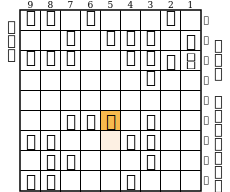

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f
go byoyomi 1000
info currmove 6a6f
info time 0 depth 1 nodes 4 score cp -8772 pv 6a6f
info currmove 6a6f
info currmove 6a6f
info time 1 depth 2 nodes 461 score cp -8757 pv 6a6f 2c2b+
info currmove 6a6f
info currmove 6a6f
info time 12 depth 3 nodes 14152 score cp -12782 pv 6a6f B*7e 6f6d
info currmove 6a6f
info time 15 depth 3 nodes 18766 score cp -10198 pv 6a6b L*6e 5b6c
info time 20 depth 3 nodes 24285 score cp -10138 pv 6a6d G*8b 6d6b
info time 25 depth 3 nodes 30276 score cp -10136 pv 7c7d G*8b 7b7c
info currmove 6a6f
info time 102 depth 4 nodes 94303 score cp -10849 pv 6a6f B*7e 4b4a 7e6f
info currmove 7c7d
info time 176 depth 4 nodes 159444 score cp -9

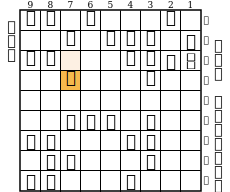

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d
go byoyomi 1000
ln1r3p1/2s1gks1+R/pp3pnP+L/2p3p2/9/2PPP1P2/PP3PN2/1KG3S2/LN3G3 b 2BGSL4P 63
0:2c2b  move_count:   2 nn_rate:0.00259 win_rate:0.95199
1:2c2b+ move_count: 127 nn_rate:0.52360 win_rate:0.91980
2:7f7e  move_count:   0 nn_rate:0.00012 win_rate:0.00000
3:6f6e  move_count:   0 nn_rate:0.00593 win_rate:0.00000
4:5f5e  move_count:   0 nn_rate:0.01791 win_rate:0.00000
5:3f3e  move_count:  18 nn_rate:0.04036 win_rate:0.94862
6:9g9f  move_count:   0 nn_rate:0.01382 win_rate:0.00000
7:8g8f  move_count:   0 nn_rate:0.00013 win_rate:0.00000
8:4g4f  move_count:   0 nn_rate:0.01353 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00646 win_rate:0.0000

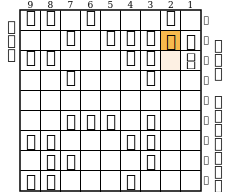

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+
go byoyomi 1000
info currmove 2a2b
info time 0 depth 1 nodes 4 score cp -8962 pv 2a2b
info currmove 2a2b
info currmove 2a2b
info time 0 depth 2 nodes 472 score cp -8757 pv 2a2b 1c2b
info currmove 2a2b
info currmove 2a2b
info time 11 depth 3 nodes 14949 score cp -9916 pv 2a2b G*8b 7b7c
info currmove 2a2b
info currmove 2a2b
info time 84 depth 4 nodes 95579 score cp -8951 pv 2a2b 1c2b 3b4a 8h7g
info currmove 2a2b
info time 96 nodes 110521 score cp -8951 pv 2a2b 1c2b 3b4a 8h7g
bestmove 2a2b
64手目


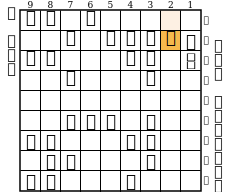

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b
go byoyomi 1000
ln1r5/2s1gksp+R/pp3pn1+L/2p3p2/9/2PPP1P2/PP3PN2/1KG3S2/LN3G3 b 2BGSL4Pp 65
0:7f7e  move_count:   1 nn_rate:0.00004 win_rate:0.95782
1:6f6e  move_count:   0 nn_rate:0.00163 win_rate:0.00000
2:5f5e  move_count:   0 nn_rate:0.00432 win_rate:0.00000
3:3f3e  move_count:   0 nn_rate:0.01264 win_rate:0.00000
4:9g9f  move_count:   0 nn_rate:0.00333 win_rate:0.00000
5:8g8f  move_count:   0 nn_rate:0.00005 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00325 win_rate:0.00000
7:9i9h  move_count:   0 nn_rate:0.00118 win_rate:0.00000
8:3g4e  move_count:   0 nn_rate:0.00900 win_rate:0.00000
9:3g2e  move_count:   0 nn_rate:0.00169 win_r

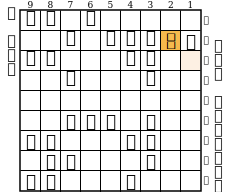

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b
go byoyomi 1000
info currmove 3b4a
info time 0 depth 1 nodes 4 score cp -8962 pv 3b4a
info currmove 3b4a
info currmove 3b4a
info time 1 depth 2 nodes 557 score cp -8951 pv 3b4a 8h7g
info currmove 3b4a
info currmove 3b4a
info time 7 depth 3 nodes 11033 score cp -10121 pv 3b4a G*8b 7b7c
info currmove 3b4a
info currmove 3b4a
info time 94 depth 4 nodes 106806 score cp -10192 pv 3b4a 2b2c 4b3a 2c3c
info currmove 3b4a
info time 124 nodes 143873 score cp -10192 pv 3b4a 2b2c 4b3a 2c3c
bestmove 3b4a
66手目


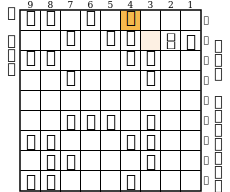

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a
go byoyomi 1000
ln1r1s3/2s1gk1+L+R/pp3pn2/2p3p2/9/2PPP1P2/PP3PN2/1KG3S2/LN3G3 b 2BGSL5Pp 67
0:7f7e  move_count:   3 nn_rate:0.00018 win_rate:0.94716
1:6f6e  move_count:   0 nn_rate:0.00436 win_rate:0.00000
2:5f5e  move_count:   0 nn_rate:0.01123 win_rate:0.00000
3:3f3e  move_count:   0 nn_rate:0.01975 win_rate:0.00000
4:9g9f  move_count:   0 nn_rate:0.01479 win_rate:0.00000
5:8g8f  move_count:   0 nn_rate:0.00014 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00994 win_rate:0.00000
7:9i9h  move_count:   0 nn_rate:0.00479 win_rate:0.00000
8:3g4e  move_count:  12 nn_rate:0.04174 win_rate:0.91612
9:3g2e  move_count:   0 nn_rate:0.

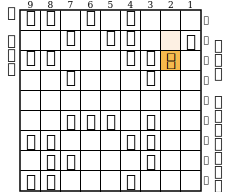

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c
go byoyomi 1000
info currmove 4b3a
info time 0 depth 1 nodes 4 score cp -10397 pv 4b3a
info currmove P*2b
info time 0 depth 1 nodes 5 score cp -9172 pv P*2b
info currmove 4b3a
info time 1 depth 2 nodes 471 score cp -10192 pv 4b3a 2c3c
info currmove P*2b
info time 1 depth 2 nodes 909 score cp -8967 pv P*2b 1b2b
info currmove P*2b
info time 5 depth 3 nodes 6389 score cp -10610 pv P*2b 1b2b 4b5a
info currmove P*2b
info time 13 depth 3 nodes 17252 score cp -10399 pv 4b5a 2c3c 6a6f
info currmove 4b5a
info time 99 depth 4 nodes 109231 score cp -10195 pv 4b5a 2c3c 6a6f 3c3d
info currmove P*2b
info time 117 nodes 129772 score cp -1019

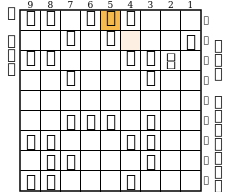

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a
go byoyomi 1000
ln1rks3/2s1g3+R/pp3pn+L1/2p3p2/9/2PPP1P2/PP3PN2/1KG3S2/LN3G3 b 2BGSL5Pp 69
0:7f7e  move_count:   1 nn_rate:0.00009 win_rate:0.95742
1:6f6e  move_count:   0 nn_rate:0.00129 win_rate:0.00000
2:5f5e  move_count:   0 nn_rate:0.00260 win_rate:0.00000
3:3f3e  move_count:   0 nn_rate:0.00306 win_rate:0.00000
4:9g9f  move_count:   0 nn_rate:0.00850 win_rate:0.00000
5:8g8f  move_count:   0 nn_rate:0.00012 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00490 win_rate:0.00000
7:9i9h  move_count:   0 nn_rate:0.00329 win_rate:0.00000
8:3g4e  move_count:   0 nn_rate:0.01639 win_rate:0.00000
9:3g2e  move_count:   0 n

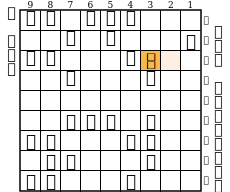

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c
go byoyomi 1000
info currmove 6a6f
info time 0 depth 1 nodes 4 score cp -10399 pv 6a6f
info currmove 6a6f
info currmove 6a6f
info time 1 depth 2 nodes 645 score cp -10195 pv 6a6f 3c3d
info currmove 6a6f
info currmove 6a6f
info time 15 depth 3 nodes 15444 score cp -11354 pv 6a6f G*8b 6f6b
info currmove 6a6f
info time 23 depth 3 nodes 22648 score cp -10609 pv P*1a 1b1a 6a6f
info currmove 6a6f
info time 389 depth 4 nodes 421420 score cp -10248 pv 6a6f N*2c 6f5f 2c3a+
info currmove P*1a
info time 501 nodes 579972 score cp -10609 pv 6a6f N*2c 6f5f 2c3a+
bestmove 6a6f
70手目


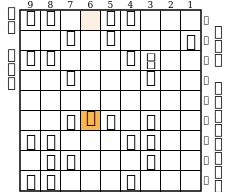

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f
go byoyomi 1000
ln2ks3/2s1g3+R/pp3p+L2/2p3p2/9/2PrP1P2/PP3PN2/1KG3S2/LN3G3 b 2BGSNL5P2p 71
0:7f7e  move_count:   3 nn_rate:0.00010 win_rate:0.91554
1:5f5e  move_count:   0 nn_rate:0.00153 win_rate:0.00000
2:3f3e  move_count:   0 nn_rate:0.00065 win_rate:0.00000
3:9g9f  move_count:   0 nn_rate:0.01584 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00039 win_rate:0.00000
5:4g4f  move_count:   0 nn_rate:0.00896 win_rate:0.00000
6:9i9h  move_count:   0 nn_rate:0.00384 win_rate:0.00000
7:3g4e  move_count:   0 nn_rate:0.01129 win_rate:0.00000
8:3g2e  move_count:   0 nn_rate:0.00274 win_rate:0.00000
9:8i7g  move_co

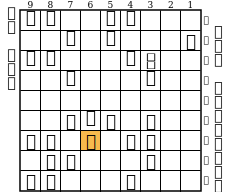

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g
go byoyomi 1000
info currmove 6f5f
info time 1 depth 1 nodes 4 score cp -10188 pv 6f5f
info currmove 6f5f
info currmove 6f5f
info time 2 depth 2 nodes 653 score cp -9984 pv 6f5f 3c3d
info currmove 6f5f
info currmove 6f5f
info time 25 depth 3 nodes 26075 score cp -11937 pv 6f5f B*4e 5f7f
info currmove 6f5f
info time 37 depth 3 nodes 40575 score cp -11540 pv 6f7f G*6f 7f7h
info time 48 depth 3 nodes 53755 score cp -11528 pv 6f6d B*8b 7b7c
info time 62 depth 3 nodes 68385 score cp -11349 pv 6f6e G*8b 6e6b
info time 72 depth 3 nodes 81029 score cp -11339 pv 6f6b G*8b P*6f
info currmove 6f5f
info time 332 depth 

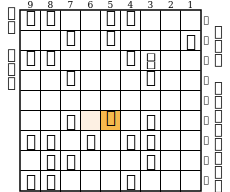

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f
go byoyomi 1000
ln2ks3/2s1g3+R/pp3p+L2/2p3p2/9/2P1r1P2/PP1P1PN2/1KG3S2/LN3G3 b 2BGSNL4P3p 73
0:7f7e  move_count:   8 nn_rate:0.00024 win_rate:0.93117
1:3f3e  move_count:   0 nn_rate:0.00132 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.01279 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00022 win_rate:0.00000
4:6g6f  move_count:  24 nn_rate:0.06153 win_rate:0.93324
5:4g4f  move_count:  33 nn_rate:0.07180 win_rate:0.93811
6:9i9h  move_count:   0 nn_rate:0.00610 win_rate:0.00000
7:3g4e  move_count:  23 nn_rate:0.06550 win_rate:0.92739
8:3g2e  move_count:   0 nn_rate:0.00476 win_rate:0.00000
9:8

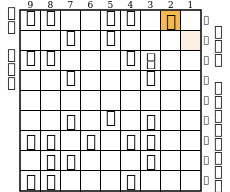

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a
go byoyomi 1000
info currmove 5f3f
info time 1 depth 1 nodes 4 score cp -9763 pv 5f3f
info currmove 5f3f
info currmove 5f3f
info time 1 depth 2 nodes 680 score cp -9763 pv 5f3f 7h7g
info currmove 5f3f
info currmove 5f3f
info time 21 depth 3 nodes 26679 score cp -11921 pv 5f3f B*5d 3d3e
info currmove 5f3f
info time 32 depth 3 nodes 41822 score cp -11331 pv 5f7f G*6f 7d7e
info time 42 depth 3 nodes 55302 score cp -11111 pv 5f5d G*8b 5b6b
info currmove 5f3f
info time 217 depth 4 nodes 232760 score cp -11111 pv 5f3f B*5d 3f3g+ 3h3g
info currmove 5f5d
info time 474 depth 4 nodes 527998 score cp -10709 

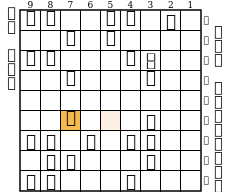

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f
go byoyomi 1000
ln2ks1+R1/2s1g4/pp3p+L2/2p3p2/9/2r3P2/PP1P1PN2/1KG3S2/LN3G3 b 2BGSNL4P4p 75
0:3f3e  move_count:   2 nn_rate:0.00019 win_rate:0.92618
1:9g9f  move_count:   0 nn_rate:0.00441 win_rate:0.00000
2:8g8f  move_count:   0 nn_rate:0.00002 win_rate:0.00000
3:6g6f  move_count:   0 nn_rate:0.01841 win_rate:0.00000
4:4g4f  move_count:   0 nn_rate:0.00107 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00076 win_rate:0.00000
6:3g4e  move_count:   0 nn_rate:0.00851 win_rate:0.00000
7:3g2e  move_count:   0 nn_rate:0.00098 win_rate:0.00000
8:8i7g  move_count:  11 nn_rate:0.05030 win_rate:0.

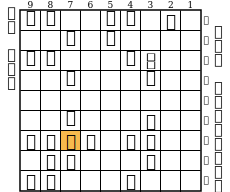

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g
go byoyomi 1000
info currmove 7f3f
info time 0 depth 1 nodes 4 score cp -9566 pv 7f3f
info currmove 7f3f
info currmove 7f3f
info time 1 depth 2 nodes 672 score cp -9576 pv 7f3f P*1b
info currmove 7f3f
info currmove 7f3f
info time 22 depth 3 nodes 27424 score cp -11724 pv 7f3f B*4e 3d3e
info currmove 7f3f
info time 53 depth 3 nodes 63774 score cp -10947 pv 7f7e G*8b 5b6b
info currmove 7f3f
info time 197 depth 4 nodes 212631 score cp -10895 pv 7f3f B*4e 3f3g+ 3h3g
info currmove 7f7e
info time 466 nodes 592930 score cp -10895 pv 7f3f B*4e 3f3g+ 3h3g
bestmove 7f3f
76手目


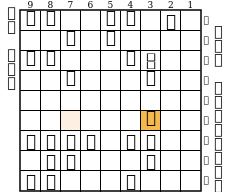

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f
go byoyomi 1000
ln2ks1+R1/2s1g4/pp3p+L2/2p3p2/9/6r2/PPPP1PN2/1KG3S2/LN3G3 b 2BGSNL3P5p 77
0:9g9f  move_count:   5 nn_rate:0.00913 win_rate:0.96846
1:8g8f  move_count:   0 nn_rate:0.00012 win_rate:0.00000
2:7g7f  move_count:   0 nn_rate:0.00132 win_rate:0.00000
3:6g6f  move_count:   0 nn_rate:0.00524 win_rate:0.00000
4:4g4f  move_count:   0 nn_rate:0.01659 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00085 win_rate:0.00000
6:3g4e  move_count:   0 nn_rate:0.02400 win_rate:0.00000
7:3g2e  move_count:   0 nn_rate:0.00822 win_rate:0.00000
8:3h2g  move_count:  13 nn_rate:0.04973 win

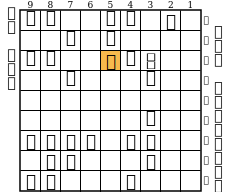

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c
go byoyomi 1000
info currmove 5b5c
info time 1 depth 1 nodes 4 score cp -9332 pv 5b5c
info currmove 5b5c
info currmove 5b5c
info time 2 depth 2 nodes 656 score cp -9343 pv 5b5c 7h6h
info currmove 5b5c
info currmove 5b5c
info time 21 depth 3 nodes 25901 score cp -11507 pv 5b5c S*3b 5c6c
info currmove 5b5c
info currmove 5b5c
info time 156 depth 4 nodes 166380 score cp -11517 pv 5b5c S*3b 5c6c 3b4a+
info currmove 5b5c
info time 397 depth 4 nodes 416972 score cp -10172 pv 5b4b 3c4b 5a4b 3g4e
info time 407 nodes 429284 score cp -10172 pv 5b4b 3c4b 5a4b 3g4e
bestmove 5b4b
78手目


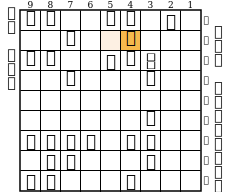

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b
go byoyomi 1000
ln2ks1+R1/2s2g3/pp2Pp+L2/2p3p2/9/6r2/PPPP1PN2/1KG3S2/LN3G3 b 2BGSNL2P5p 79
0:5c5b  move_count:   1 nn_rate:0.00007 win_rate:0.97066
1:5c5b+ move_count:   0 nn_rate:0.00413 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00204 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00002 win_rate:0.00000
4:7g7f  move_count:   0 nn_rate:0.00025 win_rate:0.00000
5:6g6f  move_count:   0 nn_rate:0.00154 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00520 win_rate:0.00000
7:9i9h  move_count:   0 nn_rate:0.00022 win_rate:0.00000
8:3g4e  move_count:   0 nn_rate:

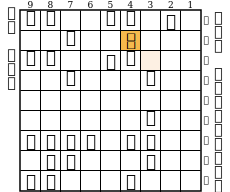

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b
go byoyomi 1000
info currmove 5a4b
info time 0 depth 1 nodes 4 score cp -10172 pv 5a4b
info currmove 5a4b
info currmove 5a4b
info time 0 depth 2 nodes 573 score cp -10172 pv 5a4b 3g4e
info currmove 5a4b
info currmove 5a4b
info time 17 depth 3 nodes 25564 score cp -12330 pv 5a4b B*1d 3d3e
info currmove 5a4b
info currmove 5a4b
info time 501 nodes 599546 score cp -12330 pv 5a4b B*1d 3d3e
bestmove 5a4b
80手目


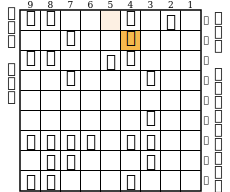

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b
go byoyomi 1000
ln3s1+R1/2s2k3/pp2Pp3/2p3p2/9/6r2/PPPP1PN2/1KG3S2/LN3G3 b 2B2GSNL2Pl5p 81
0:5c5b  move_count:   5 nn_rate:0.00005 win_rate:0.97373
1:5c5b+ move_count:  23 nn_rate:0.04009 win_rate:0.97441
2:9g9f  move_count:   0 nn_rate:0.00883 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00006 win_rate:0.00000
4:7g7f  move_count:   0 nn_rate:0.00109 win_rate:0.00000
5:6g6f  move_count:   0 nn_rate:0.00483 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00988 win_rate:0.00000
7:9i9h  move_count:   0 nn_rate:0.00091 win_rate:0.00000
8:3g4e  move_count:  29

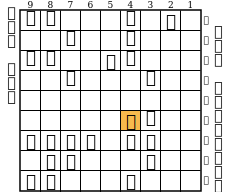

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f
go byoyomi 1000
info currmove 4b5c
info time 0 depth 1 nodes 4 score cp -11967 pv 4b5c
info currmove 3f3g+
info time 0 depth 1 nodes 107 score cp -10134 pv 4a3b
info time 0 depth 1 nodes 110 score cp -10127 pv P*1f
info currmove P*1f
info time 1 depth 2 nodes 641 score cp -10127 pv P*1f 3g4e
info currmove 3f3g+
info time 2 depth 2 nodes 1515 score cp -9929 pv 4a3b 2a2e
info currmove 4a3b
info time 32 depth 3 nodes 39493 score cp -11874 pv 4a3b B*5a 4b5c
info currmove P*1f
info currmove 4a3b
info time 190 depth 4 nodes 188938 score cp -11877 pv 4a3b B*5a 4b5c

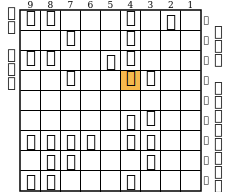

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d
go byoyomi 1000
ln3s1+R1/2s2k3/pp2Pp3/2p2lp2/9/5Nr2/PPPP1PN2/1KG3S2/LN3G3 b 2B2GSL2P5p 83
0:5c5b  move_count:   7 nn_rate:0.00006 win_rate:0.96940
1:5c5b+ move_count:  25 nn_rate:0.07168 win_rate:0.97002
2:9g9f  move_count:   0 nn_rate:0.01370 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00008 win_rate:0.00000
4:7g7f  move_count:   0 nn_rate:0.00088 win_rate:0.00000
5:6g6f  move_count:   0 nn_rate:0.00322 win_rate:0.00000
6:9i9h  move_count:   0 nn_rate:0.00114 win_rate:0.00000
7:4f5d  move_count:  61 nn_rate:0.10456 win_rate:0.98823
8:4f3d  move_

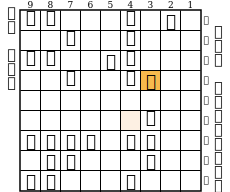

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d
go byoyomi 1000
info currmove 3f3d
info time 0 depth 1 nodes 4 score cp -8932 pv 3f3d
info currmove 3f3d
info currmove 3f3d
info time 1 depth 2 nodes 494 score cp -8911 pv 3f3d L*5i
info currmove 3f3d
info currmove 3f3d
info time 16 depth 3 nodes 22983 score cp -10113 pv 3f3d G*8b 4d4g+
info currmove 3f3d
info currmove 3f3d
info time 290 depth 4 nodes 277575 score cp -8949 pv 3f3d B*2d 4b5c S*3c
info currmove 3f3d
info time 322 nodes 312158 score cp -8949 pv 3f3d B*2d 4b5c S*3c
bestmove 3f3d
84手目


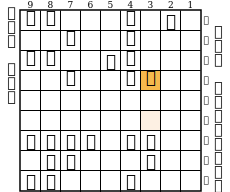

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d
go byoyomi 1000
ln3s1+R1/2s2k3/pp2Pp3/2p2lr2/9/9/PPPP1PN2/1KG3S2/LN3G3 b 2B2GSL3Pn5p 85
0:5c5b  move_count:  14 nn_rate:0.00005 win_rate:0.97608
1:5c5b+ move_count:  26 nn_rate:0.04507 win_rate:0.97500
2:9g9f  move_count:   0 nn_rate:0.02422 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00013 win_rate:0.00000
4:7g7f  move_count:   0 nn_rate:0.00178 win_rate:0.00000
5:6g6f  move_count:   0 nn_rate:0.00275 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.01348 win_rate:0.00000
7:9i9h  move_count:   0 nn_rate:0.00134 win_rate:0.00000
8:3g4

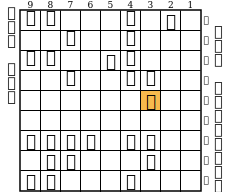

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e
go byoyomi 1000
info currmove 3d3e
info time 0 depth 1 nodes 4 score cp -8722 pv 3d3e
info currmove 3d3e
info currmove 3d3e
info time 1 depth 2 nodes 641 score cp -8701 pv 3d3e L*5i
info currmove 3d3e
info currmove 3d3e
info time 31 depth 3 nodes 40569 score cp -9903 pv 3d3e G*8b 4d4g+
info currmove 3d3e
info time 44 depth 3 nodes 62051 score cp -8927 pv 3d3a 2a1b 4a3b
info currmove 3d3e
info time 175 depth 4 nodes 177387 score cp -9042 pv 3d3e B*2d 3e3c 2d3c+
info currmove 3d3a
info time 275 depth 4 nodes 277864 score cp -8941 pv 3d3a B*

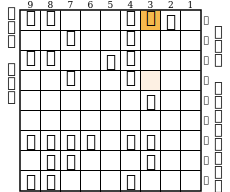

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a
go byoyomi 1000
ln3sr+R1/2s2k3/pp2Pp3/2p2l3/6P2/9/PPPP1PN2/1KG3S2/LN3G3 b 2B2GSL2Pn5p 87
0:5c5b  move_count:   1 nn_rate:0.00000 win_rate:0.99037
1:5c5b+ move_count:   0 nn_rate:0.00262 win_rate:0.00000
2:3e3d  move_count:   0 nn_rate:0.01221 win_rate:0.00000
3:9g9f  move_count:   0 nn_rate:0.00346 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00002 win_rate:0.00000
5:7g7f  move_count:   0 nn_rate:0.00023 win_rate:0.00000
6:6g6f  move_count:   0 nn_rate:0.00042 win_rate:0.00000
7:4g4f  move_count:   0 nn_rate:0.00155 win_rate:0.

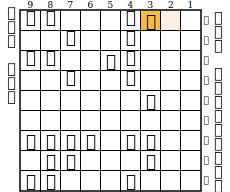

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a
go byoyomi 1000
info currmove 4b3a
info time 0 depth 1 nodes 4 score cp -8730 pv 4b3a
info currmove 4b3a
info currmove 4b3a
info time 1 depth 2 nodes 582 score cp -8742 pv 4b3a 3e3d
info currmove 4b3a
info currmove 4b3a
info time 31 depth 3 nodes 38538 score cp -9911 pv 4b3a G*8b 4d4g+
info currmove 4b3a
info currmove 4b3a
info time 171 depth 4 nodes 208435 score cp -9282 pv 4b3a G*8b 4d4g 8b7b
info currmove 4b3a
info time 192 nodes 232804 score cp -9282 pv 4b3a G*8b 4d4g 8b7b
bestmove 4b3a
88手目


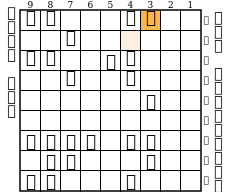

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a
go byoyomi 1000
ln3sk2/2s6/pp2Pp3/2p2l3/6P2/9/PPPP1PN2/1KG3S2/LN3G3 b R2B2GSL2Prn5p 89
0:5c5b  move_count:   5 nn_rate:0.00026 win_rate:0.94159
1:5c5b+ move_count:  45 nn_rate:0.07694 win_rate:0.96270
2:3e3d  move_count:  93 nn_rate:0.16965 win_rate:0.96073
3:9g9f  move_count:  25 nn_rate:0.03901 win_rate:0.96643
4:8g8f  move_count:   0 nn_rate:0.00041 win_rate:0.00000
5:7g7f  move_count:   0 nn_rate:0.00100 win_rate:0.00000
6:6g6f  move_count:   0 nn_rate:0.00143 win_rate:0.00000
7:4g4f  move_count:   0 nn_rate:0.01043 win

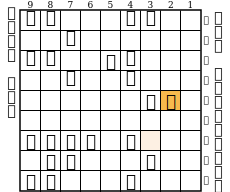

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e
go byoyomi 1000
info currmove 4d4g
info time 0 depth 1 nodes 4 score cp -9758 pv 4d4g
info currmove 4d4g
info time 1 depth 1 nodes 164 score cp -8734 pv P*2d
info time 1 depth 1 nodes 176 score cp -8727 pv 4a4b
info time 1 depth 1 nodes 179 score cp -8720 pv P*1f
info currmove 4d4g
info time 1 depth 2 nodes 873 score cp -8534 pv 4d4g 4i5h
info currmove P*1f
info time 2 depth 2 nodes 1918 score cp -8211 pv 4d4g+ 2e3c+
info time 15 depth 2 nodes 18054 score cp -7931 pv P*3g 3h2g
info currmove P*1f
info time 61 depth 3 no

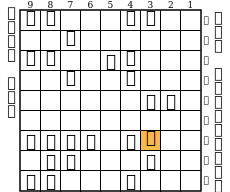

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g
go byoyomi 1000
ln3sk2/2s6/pp2Pp3/2p2l3/6PN1/9/PPPP1Pp2/1KG3S2/LN3G3 b R2B2GSL2Prn4p 91
0:5c5b  move_count:   2 nn_rate:0.00006 win_rate:0.95773
1:5c5b+ move_count:   0 nn_rate:0.01344 win_rate:0.00000
2:3e3d  move_count:  11 nn_rate:0.03322 win_rate:0.96951
3:9g9f  move_count:   0 nn_rate:0.00378 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
5:7g7f  move_count:   0 nn_rate:0.00016 win_rate:0.00000
6:6g6f  move_count:   0 nn_rate:0.00035 win_rate:0.00000
7:4g4f  move_count:   0 nn_rate:

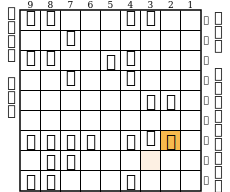

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g
go byoyomi 1000
info currmove 4d4g+
info time 3 depth 1 nodes 4 score cp -7937 pv 4d4g+
info currmove R*2i
info currmove 4d4g+
info time 5 depth 2 nodes 827 score cp -8437 pv 4d4g+ 2e3c+
info currmove R*2i
info time 7 depth 2 nodes 1374 score cp -6965 pv R*2i 2g3h
info currmove 4d4g+
info time 36 depth 3 nodes 37427 score cp -8835 pv 4d4g+ B*3f 3g3h+
info currmove R*2i
info time 49 depth 3 nodes 61583 score cp -8800 pv R*2i L*3d 3a4b
info time 76 depth 3 nodes 100086 score cp -8749 pv 4d4g P*4h 3g3h+
info tim

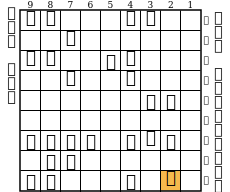

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i
go byoyomi 1000
ln3sk2/2s6/pp2Pp3/2p2l3/6PN1/9/PPPP1PpS1/1KG6/LN3G1r1 b R2B2GSL2Pn4p 93
0:5c5b  move_count:   3 nn_rate:0.00027 win_rate:0.90504
1:5c5b+ move_count:   8 nn_rate:0.03399 win_rate:0.91170
2:3e3d  move_count:  25 nn_rate:0.07877 win_rate:0.92785
3:9g9f  move_count:   0 nn_rate:0.00187 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00002 win_rate:0.00000
5:7g7f  move_count:   0 nn_rate:0.00010 win_rate:0.00000
6:6g6f  move_count:   0 nn_rate:0.00051 win_rate:0.00000
7:4g4f  move_count:   

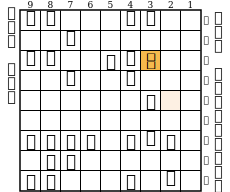

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+
go byoyomi 1000
info currmove 2i4i+
info time 0 depth 1 nodes 4 score cp -6885 pv 2i4i+
info currmove 2i4i+
info currmove 2i4i+
info time 1 depth 2 nodes 706 score cp -6476 pv 2i4i+ 4g4f
info currmove 2i4i+
info currmove 2i4i+
info time 28 depth 3 nodes 28246 score mate - pv 2i4i+ S*2b G*2a
info currmove 2i4i+
info time 57 depth 3 nodes 62479 score cp -9230 pv 2i2g+ B*5d P*2f
info currmove 2i4i+
info time 346 depth 4 nodes 461406 score mate - pv 2i4i+ S*2b 3g3h+ 3c4c
info currmove 2i2g+
info time 5

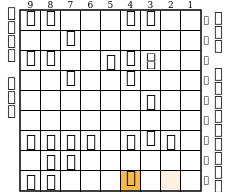

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+
go byoyomi 1000
ln3sk2/2s6/pp2Pp+N2/2p2l3/6P2/9/PPPP1PpS1/1KG6/LN3+r3 b R2B2GSL2Pgn4p 95
0:5c5b  move_count:   3 nn_rate:0.00062 win_rate:0.89253
1:5c5b+ move_count:  22 nn_rate:0.11468 win_rate:0.90487
2:3e3d  move_count:  14 nn_rate:0.05867 win_rate:0.91642
3:9g9f  move_count:   0 nn_rate:0.01451 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00021 win_rate:0.00000
5:7g7f  move_count:   0 nn_rate:0.00082 win_rate:0.00000
6:6g6f  move_count:   0 nn_rate:0.00083 win_rate:0.00000
7:4g4f  m

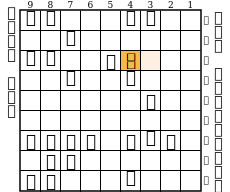

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c
go byoyomi 1000
info currmove 4d4g+
info time 4 depth 1 nodes 3 score cp -6086 pv 4d4g+
info currmove 4d4g+
info time 9 depth 2 nodes 839 score cp -7171 pv 4d4g+ 5c5b+
info currmove 4d4g+
info time 10 depth 2 nodes 2191 score cp -7166 pv 4d4e 5c5b+
info time 12 depth 2 nodes 3653 score cp -6831 pv 3g3h+ 4c4d
info time 13 depth 2 nodes 4487 score cp -6116 pv N*1e 2g2f
info time 15 depth 2 nodes 6894 score cp -6054 pv P*2f 2g1f
info currmove 4d4g+
info time 76 depth 3 nodes 76914 score cp 

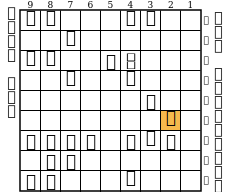

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f
go byoyomi 1000
ln3sk2/2s6/pp2P+N3/2p2l3/6P2/7p1/PPPP1PpS1/1KG6/LN3+r3 b R2B2GSL3Pgn3p 97
0:5c5b  move_count:   2 nn_rate:0.00046 win_rate:0.94832
1:5c5b+ move_count:  22 nn_rate:0.12978 win_rate:0.92306
2:3e3d  move_count:   0 nn_rate:0.01630 win_rate:0.00000
3:9g9f  move_count:   0 nn_rate:0.00173 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
5:7g7f  move_count:   0 nn_rate:0.00011 win_rate:0.00000
6:6g6f  move_count:   0 nn_rate:0.00008 win_rate:0.0000

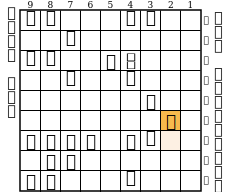

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f
go byoyomi 1000
info currmove 4d4g+
info time 5 depth 1 nodes 3 score cp -6297 pv 4d4g+
info currmove 4d4g+
info time 10 depth 2 nodes 838 score cp -7382 pv 4d4g+ 5c5b+
info currmove 4d4g+
info time 11 depth 2 nodes 2188 score cp -7377 pv 4d4e 5c5b+
info time 12 depth 2 nodes 2703 score cp -7042 pv 3g3h+ 4c4d
info time 13 depth 2 nodes 4156 score cp -6356 pv G*3f P*2g
info time 14 depth 2 nodes 4655 score cp -6352 pv G*2g 4c4d
info time 16 depth 2 nodes 6771 score cp -6286 pv 4

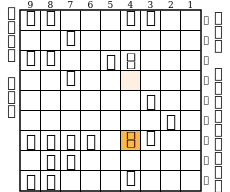

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+
go byoyomi 1000
ln3sk2/2s6/pp2P+N3/2p6/6P2/7S1/PPPP1+lp2/1KG6/LN3+r3 b R2B2GSL4Pgn4p 99
0:5c5b  move_count:   2 nn_rate:0.00149 win_rate:0.95894
1:5c5b+ move_count: 116 nn_rate:0.41661 win_rate:0.94664
2:3e3d  move_count:  41 nn_rate:0.11939 win_rate:0.95747
3:9g9f  move_count:   0 nn_rate:0.00826 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00030 win_rate:0.00000
5:7g7f  move_count:   0 nn_rate:0.00107 win_rate:0.00000
6:6g6f  move_count:   0 nn_rate:0.00049 win_ra

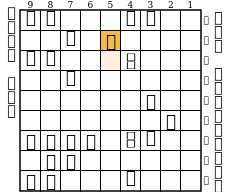

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+
go byoyomi 1000
info currmove 3g3h+
info time 5 depth 1 nodes 4 score cp -7042 pv 3g3h+
info currmove 3g3h+
info currmove 3g3h+
info time 10 depth 2 nodes 854 score cp -7042 pv 3g3h+ 5b4a
info currmove 3g3h+
info currmove 3g3h+
info time 41 depth 3 nodes 37916 score cp -8271 pv 3g3h+ R*7a 7b6c
info currmove 3g3h+
info currmove 3g3h+
info time 291 depth 4 nodes 287600 score cp -7543 pv 3g3h+ B*6d P*4b 5b4b
info currmove 3g3h+
info time 501 nodes 508623 score cp -8271

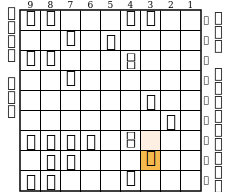

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+
go byoyomi 1000
ln3sk2/2s1+P4/pp3+N3/2p6/6P2/7S1/PPPP1+l3/1KG3+p2/LN3+r3 b R2B2GSL4Pgn4p 101
0:3e3d  move_count:   6 nn_rate:0.03529 win_rate:0.95562
1:9g9f  move_count:   0 nn_rate:0.00198 win_rate:0.00000
2:8g8f  move_count:   0 nn_rate:0.00006 win_rate:0.00000
3:7g7f  move_count:   0 nn_rate:0.00025 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00012 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00025 win_rate:0.00000
6:2f2e  move_count:   0 nn_ra

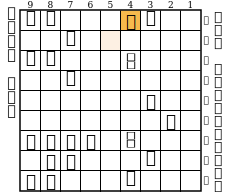

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a
go byoyomi 1000
info currmove 3a4a
info time 0 depth 1 nodes 4 score cp -7042 pv 3a4a
info currmove 3a4a
info currmove 3a4a
info time 1 depth 2 nodes 591 score cp -7054 pv 3a4a 3e3d
info currmove 3a4a
info currmove 3a4a
info time 4 depth 3 nodes 4684 score mate - pv 3a4a S*4b 4a5a
info currmove 3a4a
info time 30 depth 3 nodes 42758 score cp -9562 pv 3a2a G*8b G*6a
info currmove 3a4a
info time 31 depth 4 nodes 42782 score mate - pv 3a4a S*4b 2b1a
info curr

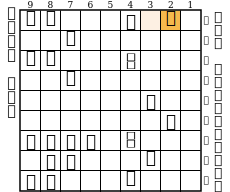

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a 3a2a
go byoyomi 1000
ln3+P1k1/2s6/pp3+N3/2p6/6P2/7S1/PPPP1+l3/1KG3+p2/LN3+r3 b R2B2G2SL4Pgn4p 103
0:3e3d  move_count:  18 nn_rate:0.03288 win_rate:0.96777
1:9g9f  move_count:   0 nn_rate:0.00508 win_rate:0.00000
2:8g8f  move_count:   0 nn_rate:0.00019 win_rate:0.00000
3:7g7f  move_count:   0 nn_rate:0.00080 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00014 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00040 win_rate:0.00000
6:2f2e  move_count:

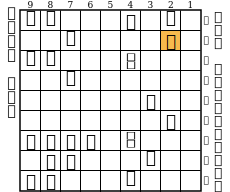

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a 3a2a P*2b
go byoyomi 1000
info time 0 depth 1 nodes 6 score cp -8137 pv 2a2b
info currmove 2a2b
info time 1 depth 2 nodes 560 score cp -8149 pv 2a2b 3e3d
info currmove 2a2b
info time 22 depth 3 nodes 36291 score cp -10297 pv 2a2b R*4b 2b1a
info currmove 2a2b
info time 46 depth 3 nodes 73439 score cp -9572 pv 2a1a G*8b G*6a
info currmove 2a2b
info time 154 depth 4 nodes 187166 score cp -10694 pv 2a2b R*4b 2b1c 4b7b+
info currmove 2a1a
info time 290 depth 4

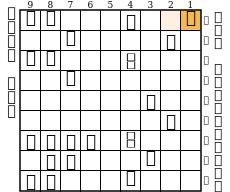

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a 3a2a P*2b 2a1a
go byoyomi 1000
ln3+P2k/2s4P1/pp3+N3/2p6/6P2/7S1/PPPP1+l3/1KG3+p2/LN3+r3 b R2B2G2SL3Pgn4p 105
0:2b2a+ move_count:  76 nn_rate:0.20297 win_rate:0.95891
1:3e3d  move_count:   0 nn_rate:0.01016 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00473 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00019 win_rate:0.00000
4:7g7f  move_count:   0 nn_rate:0.00064 win_rate:0.00000
5:6g6f  move_count:   0 nn_rate:0.00017 win_rate:0.00000
6:9i9h  

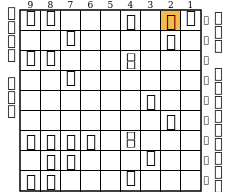

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a 3a2a P*2b 2a1a G*2a
go byoyomi 1000
info currmove 1a1b
info time 0 depth 1 nodes 4 score cp -8287 pv 1a1b
info currmove 1a1b
info currmove 1a1b
info time 0 depth 2 nodes 555 score cp -8299 pv 1a1b 3e3d
info currmove 1a1b
info currmove 1a1b
info time 22 depth 3 nodes 35365 score cp -10447 pv 1a1b B*4e 1b1c
info currmove 1a1b
info currmove 1a1b
info time 140 depth 4 nodes 144312 score cp -10316 pv 1a1b B*4e G*2c 4e7b+
info currmove 1a1b
info time 140 nodes 

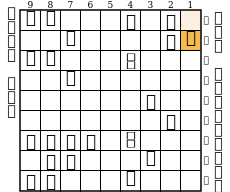

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a 3a2a P*2b 2a1a G*2a 1a1b
go byoyomi 1000
ln3+P1G1/2s4Pk/pp3+N3/2p6/6P2/7S1/PPPP1+l3/1KG3+p2/LN3+r3 b R2BG2SL3Pgn4p 107
0:3e3d  move_count:  23 nn_rate:0.03937 win_rate:0.96346
1:9g9f  move_count:   0 nn_rate:0.00499 win_rate:0.00000
2:8g8f  move_count:   0 nn_rate:0.00013 win_rate:0.00000
3:7g7f  move_count:   0 nn_rate:0.00057 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00023 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00048 win_rate:0.0000

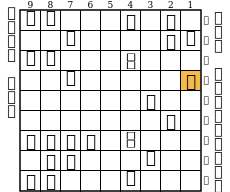

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a 3a2a P*2b 2a1a G*2a 1a1b P*1d
go byoyomi 1000
info currmove 4i2i
info time 5 depth 1 nodes 4 score cp -8297 pv 4i2i
info currmove 4i2i
info time 5 depth 1 nodes 182 score cp -8287 pv P*1f
info currmove 4i2i
info time 10 depth 2 nodes 811 score cp -8280 pv 4i2i 2f1e
info currmove P*1f
info time 29 depth 2 nodes 19436 score cp -8173 pv G*2c 7h6h
info currmove P*1f
info time 54 depth 3 nodes 40550 score mate - pv P*1f G*1c 1b2c
info currmove G*2c
info time 1

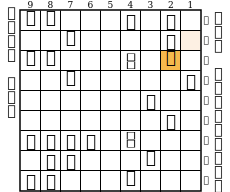

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a 3a2a P*2b 2a1a G*2a 1a1b P*1d 1b2c
go byoyomi 1000
ln3+P1G1/2s4P1/pp3+N1k1/2p5P/6P2/7S1/PPPP1+l3/1KG3+p2/LN3+r3 b R2BG2SL2Pgn4p 109
0:1d1c  move_count:   1 nn_rate:0.00034 win_rate:0.96060
1:1d1c+ move_count:  10 nn_rate:0.05275 win_rate:0.95186
2:3e3d  move_count:   0 nn_rate:0.01684 win_rate:0.00000
3:9g9f  move_count:   0 nn_rate:0.00359 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
5:7g7f  move_count:   0 nn_rate:0.00034 wi

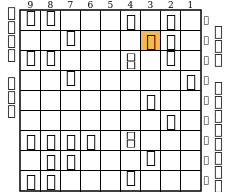

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a 3a2a P*2b 2a1a G*2a 1a1b P*1d 1b2c B*3b
go byoyomi 1000
info currmove 2c1b
info time 0 depth 1 nodes 4 score cp -8207 pv 2c1b
info currmove 2c1b
info currmove 2c1b
info time 0 depth 2 nodes 534 score cp -8219 pv 2c1b 3e3d
info currmove 2c1b
info time 1 depth 2 nodes 1055 score cp -8218 pv 2c2d 7h6h
info currmove 2c2d
info time 4 depth 3 nodes 4030 score mate - pv 2c2d L*2e G*9b
info currmove 2c1b
info currmove 2c2d
info time 7 depth 4 nodes 6749 score mat

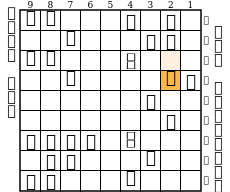

position startpos moves 2g2f 4a3b 5i6h 5a4b 6h7h 2c2d 3i3h 6a5b 7g7f 1c1d 2f2e 2d2e 2h2e P*2h 2e2h 1d1e 3g3f 5c5d 2i3g 6c6d P*2d 3c3d 2d2c+ 2b8h+ 7i8h 1e1f 2c3b 3a3b 1g1f P*2g 2h2g 1a1f 1i1f P*2f 2g2f B*4d 2f2e 4d8h+ 7h8h 2a3c 2e2b+ S*3a 2b1b 6d6e 6i7h 8b6b P*2c 6e6f 6g6f 7a7b 2c2b+ 3a2b 1b2b P*2a 2b1b 6b6a 1f1c+ 5d5e P*2c 5e5f 5g5f 7c7d 2c2b+ 2a2b 1c2b 3b4a 2b2c 4b5a 2c3c 6a6f P*6g 6f5f 1b2a 5f7f P*7g 7f3f P*5c 5b4b 3c4b 5a4b N*4f L*4d 4f3d 3f3d P*3e 3d3a 2a3a 4b3a 3g2e P*3g 3h2g R*2i 2e3c+ 2i4i+ 3c4c P*2f 2g2f 4d4g+ 5c5b+ 3g3h+ 5b4a 3a2a P*2b 2a1a G*2a 1a1b P*1d 1b2c B*3b 2c2d
go byoyomi 1000
ln3+P1G1/2s3BP1/pp3+N3/2p4kP/6P2/7S1/PPPP1+l3/1KG3+p2/LN3+r3 b RBG2SL2Pgn4p 111
0:1d1c  move_count:  12 nn_rate:0.00156 win_rate:0.95056
1:1d1c+ move_count:  22 nn_rate:0.08782 win_rate:0.95378
2:3e3d  move_count:   0 nn_rate:0.00486 win_rate:0.00000
3:9g9f  move_count:   0 nn_rate:0.01166 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00026 win_rate:0.00000
5:7g7f  move_count:   0 nn_rate:0

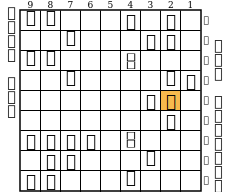

まで111手で先手の勝ち

対局数1 先手勝ち1(100%) 後手勝ち0(0%) 引き分け0

mcts_player
勝ち1(100%) 先手勝ち1(100%) 後手勝ち0(0%)

Lesserkai 1.4.2
勝ち0(0%) 先手勝ち0(0%) 後手勝ち0(0%)


In [ ]:
cli.main('/content/python-dlshogi/mcts_player.sh', '/content/LesserkaiSrc/Lesserkai/Lesserkai', options1={'modelfile':'/content/python-dlshogi/model/model_policy_value_resnet'})

## 12.6 並列化
以下のコードはGitHubからcloneしてモジュールインストールしたコードを使用するため、ここではコードの掲載を省略します。
- [parallel_mcts_player.py](https://github.com/TadaoYamaoka/python-dlshogi/blob/master/pydlshogi/player/parallel_mcts_player.py)

### 12.6.8 テスト
以下のセルを実行して、順番に以下の通り入力します。

setoption name modelfile value model/model_policy_value_resnet

isready

position startpos

go

quit

In [ ]:
!python -m pydlshogi.usi.usi_parallel_mcts_player

setoption name modelfile value model/model_policy_value_resnet
isready
readyok
position startpos
lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R1/LNSGKGSNL b - 1
go
  0:9g9f  move_count:   4 nn_rate:0.02573 win_rate:0.47803
  1:8g8f  move_count:   0 nn_rate:0.00043 win_rate:0.00000
  2:7g7f  move_count:  89 nn_rate:0.33013 win_rate:0.51705
  3:6g6f  move_count:   0 nn_rate:0.00115 win_rate:0.00000
  4:5g5f  move_count:   1 nn_rate:0.00666 win_rate:0.50525
  5:4g4f  move_count:   2 nn_rate:0.01720 win_rate:0.44212
  6:3g3f  move_count:   0 nn_rate:0.00174 win_rate:0.00000
  7:2g2f  move_count: 140 nn_rate:0.50203 win_rate:0.51586
  8:1g1f  move_count:   0 nn_rate:0.00077 win_rate:0.00000
  9:9i9h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
 10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
 11:7i7h  move_count:   0 nn_rate:0.00284 win_rate:0.00000
 12:7i6h  move_count:   1 nn_rate:0.00515 win_rate:0.44447
 13:3i4h  move_count:   4 nn_rate:0.04314 win_rate:0.41382
 14:3i3h  

### 12.6.9 対局
将棋所を使ったローカルPCでの対局方法は書籍および[8.5](#scrollTo=THGkX8CUMPN6)を参照してください。ssh経由で実行する方法は、[ssh経由でGoogle Colab上で実行する方法](#scrollTo=-lTD4_3lX5Tq&line=4&uniqifier=1)を参照してください。

#### cshogiを使って対局
cshogiのインストール方法と対局の準備は、8.5の[cshogiでGoogle Colab上で対局する方法](#scrollTo=0nHoQ13cW5UN)を参照してください。

作成した将棋AIを起動するシェル(parallel_mcts_player.sh)を作成します。

In [ ]:
!echo -e "#!/bin/sh\npython -m pydlshogi.usi.usi_parallel_mcts_player" >parallel_mcts_player.sh
!chmod +x parallel_mcts_player.sh

cshogiのcliモジュールを使って、対局を開始します。

parallel_mcts_player
setoption name modelfile value /content/python-dlshogi/model/model_policy_value_resnet
isready
readyok
Lesserkai 1.4.2
isready
readyok
開始局面


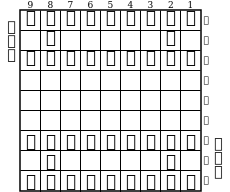

usinewgame
usinewgame
position startpos
go byoyomi 1000
lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R1/LNSGKGSNL b - 1
0:9g9f  move_count:   4 nn_rate:0.02573 win_rate:0.47958
1:8g8f  move_count:   0 nn_rate:0.00043 win_rate:0.00000
2:7g7f  move_count:  89 nn_rate:0.33013 win_rate:0.51669
3:6g6f  move_count:   0 nn_rate:0.00115 win_rate:0.00000
4:5g5f  move_count:   1 nn_rate:0.00666 win_rate:0.50908
5:4g4f  move_count:   2 nn_rate:0.01720 win_rate:0.43938
6:3g3f  move_count:   0 nn_rate:0.00174 win_rate:0.00000
7:2g2f  move_count: 140 nn_rate:0.50203 win_rate:0.51396
8:1g1f  move_count:   0 nn_rate:0.00077 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:7i7h  move_count:   0 nn_rate:0.00284 win_rate:0.00000
12:7i6h  move_count:   1 nn_rate:0.00515 win_rate:0.44133
13:3i4h  move_count:   3 nn_rate:0.04314 win_rate:0.38856
14:3i3h  move_count:   4 nn_rate:0.02159 win_rate:0.47398
15:6i7h  move_count:

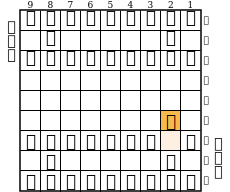

position startpos moves 2g2f
go byoyomi 1000
info time 0 depth 1 nodes 33 score cp 9 pv 4a3b
info currmove 4a3b
info time 0 depth 2 nodes 128 score cp -1 pv 4a3b 6i7h
info currmove 4a3b
info time 2 depth 3 nodes 2138 score cp 2 pv 4a3b 6i7h 5a4b
info currmove 4a3b
info currmove 4a3b
info time 7 depth 4 nodes 7747 score cp -2 pv 4a3b 2f2e 5a4b 2e2d
info currmove 4a3b
info time 17 nodes 26549 score cp -2 pv 4a3b 2f2e 5a4b 2e2d
bestmove 4a3b
2手目


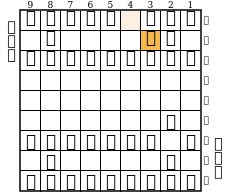

position startpos moves 2g2f 4a3b
go byoyomi 1000
lnsgk1snl/1r4gb1/ppppppppp/9/9/7P1/PPPPPPP1P/1B5R1/LNSGKGSNL b - 3
0:2f2e  move_count:  91 nn_rate:0.33194 win_rate:0.51808
1:9g9f  move_count:   7 nn_rate:0.03101 win_rate:0.50245
2:8g8f  move_count:   0 nn_rate:0.00120 win_rate:0.00000
3:7g7f  move_count: 120 nn_rate:0.36915 win_rate:0.52875
4:6g6f  move_count:   0 nn_rate:0.00051 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00285 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00293 win_rate:0.00000
7:3g3f  move_count:   0 nn_rate:0.00385 win_rate:0.00000
8:1g1f  move_count:   0 nn_rate:0.00126 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00004 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:7i7h  move_count:   1 nn_rate:0.00496 win_rate:0.51463
12:7i6h  move_count:   1 nn_rate:0.00869 win_rate:0.48475
13:3i4h  move_count:  14 nn_rate:0.10375 win_rate:0.45120
14:3i3h  move_count:  14 nn_rate:0.03647 win_rate:0.52910
15:6i7h  move_count:  1

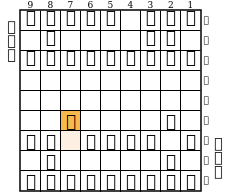

position startpos moves 2g2f 4a3b 7g7f
go byoyomi 1000
info currmove 5a4b
info time 0 depth 1 nodes 4 score cp 11 pv 5a4b
info currmove 5a4b
info currmove 5a4b
info time 0 depth 2 nodes 137 score cp 1 pv 5a4b 6i7h
info currmove 5a4b
info currmove 5a4b
info time 2 depth 3 nodes 2208 score cp 4 pv 5a4b 6i7h 6a5b
info currmove 5a4b
info currmove 5a4b
info time 6 depth 4 nodes 8105 score cp 0 pv 5a4b 2f2e 6a5b 2e2d
info currmove 5a4b
info time 17 depth 4 nodes 20759 score cp 1 pv 3c3d 6g6f 5a4b 6i7h
info time 22 nodes 30184 score cp 1 pv 3c3d 6g6f 5a4b 6i7h
bestmove 3c3d
4手目


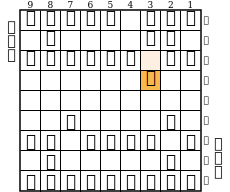

position startpos moves 2g2f 4a3b 7g7f 3c3d
go byoyomi 1000
lnsgk1snl/1r4gb1/pppppp1pp/6p2/9/2P4P1/PP1PPPP1P/1B5R1/LNSGKGSNL b - 5
0:7f7e  move_count:   1 nn_rate:0.00033 win_rate:0.43074
1:2f2e  move_count: 136 nn_rate:0.24370 win_rate:0.55142
2:9g9f  move_count:   1 nn_rate:0.00603 win_rate:0.45460
3:8g8f  move_count:   0 nn_rate:0.00094 win_rate:0.00000
4:6g6f  move_count:   1 nn_rate:0.01021 win_rate:0.43781
5:5g5f  move_count:   1 nn_rate:0.01209 win_rate:0.44945
6:4g4f  move_count:   0 nn_rate:0.00136 win_rate:0.00000
7:3g3f  move_count:   1 nn_rate:0.00695 win_rate:0.49509
8:1g1f  move_count:   0 nn_rate:0.00164 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00017 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
11:8i7g  move_count:   0 nn_rate:0.00014 win_rate:0.00000
12:7i7h  move_count:   0 nn_rate:0.00375 win_rate:0.00000
13:7i6h  move_count:   1 nn_rate:0.01292 win_rate:0.42516
14:3i4h  move_count:  22 nn_rate:0.16281 win_rate:0.44552
15:3i3h  

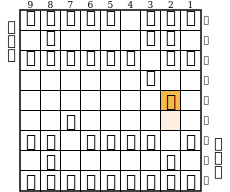

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e
go byoyomi 1000
info currmove 2b8h+
info time 0 depth 1 nodes 3 score cp 7 pv 2b8h+
info time 0 depth 1 nodes 44 score cp 10 pv 5a4b
info currmove 2b8h+
info time 0 depth 2 nodes 147 score cp 1785 pv 2b8h+ 2h8h
info currmove 5a4b
info currmove 2b8h+
info time 6 depth 3 nodes 4591 score cp 1797 pv 2b8h+ 7i8h 3a2b
info currmove 5a4b
info currmove 2b8h+
info time 19 depth 4 nodes 17423 score cp 1906 pv 2b8h+ 7i8h B*6e 3i4h
info currmove 2b8h+
info time 67 nodes 64310 score cp 1906 pv 2b8h+ 7i8h B*6e 3i4h
bestmove 2b8h+
6手目


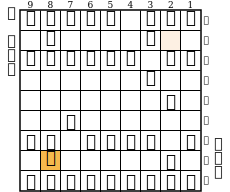

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/7P1/2P6/PP1PPPP1P/1+b5R1/LNSGKGSNL b b 7
0:2e2d  move_count:   1 nn_rate:0.00166 win_rate:0.51265
1:7f7e  move_count:   0 nn_rate:0.00001 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00005 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00007 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00002 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00002 win_rate:0.00000
6:4g4f  move_count:   0 nn_rate:0.00005 win_rate:0.00000
7:3g3f  move_count:   0 nn_rate:0.00001 win_rate:0.00000
8:1g1f  move_count:   0 nn_rate:0.00001 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
11:8i7g  move_count:   0 nn_rate:0.00005 win_rate:0.00000
12:7i8h  move_count: 178 nn_rate:0.99083 win_rate:0.57336
13:7i7h  move_count:   0 nn_rate:0.00063 win_rate:0.00000
14:7i6h  move_count:   0 nn_rate:0.00119 win_rate:0.0000

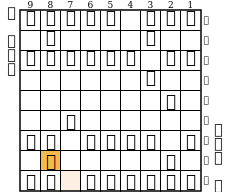

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h
go byoyomi 1000
info currmove 3a2b
info time 0 depth 1 nodes 4 score cp 7 pv 3a2b
info currmove B*6e
info currmove 3a2b
info time 0 depth 2 nodes 276 score cp -5 pv 3a2b 2e2d
info currmove B*6e
info time 0 depth 2 nodes 413 score cp 107 pv B*6e 3i3h
info currmove 3a2b
info time 7 depth 3 nodes 5490 score cp -103 pv 3a2b B*4e 7a7b
info currmove B*6e
info time 9 depth 3 nodes 7939 score cp -89 pv B*6e 2e2d 2c2d
info time 17 depth 3 nodes 18990 score cp 2 pv 7a7b 6i7h 3a2b
info currmove 7a7b
info time 32 depth 4 nodes 36543 score cp -10 pv 7a7b 2e2d 3a2b 6i7h
info currmove B*6e
info time 47 depth 4 nodes 48040 score cp 97 pv B*6e 5i5h 6e7f 2e2d
info time 190 nodes 195810 score cp 97 pv B*6e 5i5h 6e7f 2e2d
bestmove B*6e
8手目


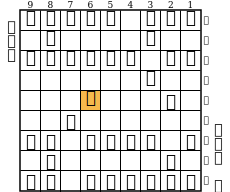

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/3b3P1/2P6/PP1PPPP1P/1S5R1/LN1GKGSNL b B 9
0:2e2d  move_count:  22 nn_rate:0.12970 win_rate:0.51535
1:7f7e  move_count:   0 nn_rate:0.00066 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00266 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00234 win_rate:0.00000
4:6g6f  move_count:   3 nn_rate:0.00949 win_rate:0.52685
5:5g5f  move_count:   3 nn_rate:0.02325 win_rate:0.49588
6:4g4f  move_count:   0 nn_rate:0.00267 win_rate:0.00000
7:3g3f  move_count:   0 nn_rate:0.00370 win_rate:0.00000
8:1g1f  move_count:   0 nn_rate:0.00060 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
11:8i7g  move_count:   4 nn_rate:0.01772 win_rate:0.52124
12:8h7g  move_count: 109 nn_rate:0.35702 win_rate:0.55777
13:8h7i  move_count:   0 nn_rate:0.00025 win_rate:0.00000
14:3i4h  move_count:  23 nn_rate:0.21321 win_

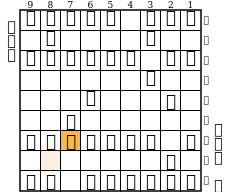

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g
go byoyomi 1000
info time 0 depth 1 nodes 40 score cp 312 pv 6e4g+
info currmove 6e4g+
info time 0 depth 2 nodes 209 score cp 309 pv 6e4g+ 4i5h
info currmove 6e4g+
info time 5 depth 3 nodes 5503 score cp 202 pv 6e4g+ B*4e 4g5g
info currmove 6e4g+
info currmove 6e4g+
info time 27 depth 4 nodes 21615 score cp 314 pv 6e4g+ 6i6h 3a2b 6h5h
info currmove 6e4g+
info time 102 nodes 101581 score cp 314 pv 6e4g+ 6i6h 3a2b 6h5h
bestmove 6e4g+
10手目


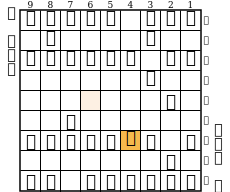

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/7P1/2P6/PPSPP+bP1P/7R1/LN1GKGSNL b Bp 11
0:2e2d  move_count:  30 nn_rate:0.12006 win_rate:0.52190
1:7f7e  move_count:   0 nn_rate:0.00007 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00095 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00171 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00267 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00054 win_rate:0.00000
6:3g3f  move_count:   0 nn_rate:0.00056 win_rate:0.00000
7:1g1f  move_count:   0 nn_rate:0.00085 win_rate:0.00000
8:9i9h  move_count:   0 nn_rate:0.00010 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
10:7g8f  move_count:   0 nn_rate:0.00155 win_rate:0.00000
11:7g6f  move_count:   3 nn_rate:0.00774 win_rate:0.55873
12:7g8h  move_count:   0 nn_rate:0.00034 win_rate:0.00000
13:7g6h  move_count:   0 nn_rate:0.00020 win_rate:0.00000
14:3i4h  move_count:  42 nn_rate:0.

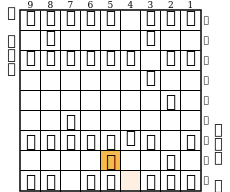

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h
go byoyomi 1000
info currmove 4g5h
info time 0 depth 1 nodes 4 score cp -1118 pv 4g5h
info currmove 4g4f
info time 0 depth 1 nodes 5 score cp 309 pv 4g4f
info currmove 4g5h
info time 0 depth 2 nodes 106 score cp -38 pv 4g5h 6i5h
info currmove 4g4f
info time 1 depth 2 nodes 232 score cp 299 pv 4g4f 6i7h
info currmove 4g4f
info time 11 depth 3 nodes 9925 score cp 304 pv 4g4f 6i7h 3a2b
info currmove 4g4f
info time 11 depth 3 nodes 10268 score cp 461 pv 4g5h 6i5h G*7h
info currmove 4g5h
info time 20 depth 4 nodes 21895 score cp 477 pv 4g5h 5i5h G*4f 2e2d
info currmove 4g4f
info time 74 nodes 91634 score cp 477 pv 4g5h 5i5h G*4f 2e2d
bestmove 4g5h
12手目


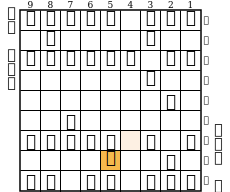

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/7P1/2P6/PPSPP1P1P/4+b2R1/LN1GK1SNL b Bgp 13
0:6i5h  move_count: 137 nn_rate:0.58622 win_rate:0.54832
1:2h5h  move_count:  31 nn_rate:0.14164 win_rate:0.54041
2:5i5h  move_count:  99 nn_rate:0.27214 win_rate:0.57433
info nps 81 time 3272 nodes 267 hashfull 64 score cp 116 pv 6i5h
bestmove 6i5h
13手目


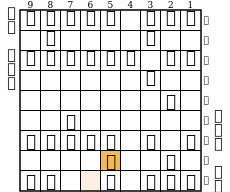

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h
go byoyomi 1000
info currmove G*7h
info time 0 depth 1 nodes 4 score cp -1191 pv G*7h
info currmove G*7h
info time 0 depth 1 nodes 85 score cp -1116 pv 3a2b
info currmove G*7h
info time 1 depth 2 nodes 262 score cp -1101 pv G*7h B*9h
info currmove 3a2b
info currmove G*7h
info time 5 depth 3 nodes 2546 score cp -1100 pv G*7h B*1e 5a4a
info currmove 3a2b
info currmove G*7h
info time 19 depth 4 nodes 18033 score cp -1010 pv G*7h B*1e 5a4a B*9h
info currmove G*7h
info time 149 nodes 162809 score cp -1010 pv G*7h B*1e 5a4a B*9h
bestmove G*7h
14手目


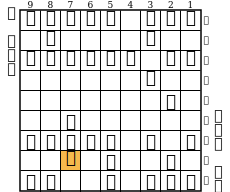

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6p2/7P1/2P6/PPSPP1P1P/2g1G2R1/LN2K1SNL b 2Bp 15
0:2e2d  move_count:  70 nn_rate:0.29668 win_rate:0.52775
1:7f7e  move_count:   0 nn_rate:0.00086 win_rate:0.00000
2:9g9f  move_count:   6 nn_rate:0.01375 win_rate:0.55654
3:8g8f  move_count:   0 nn_rate:0.00327 win_rate:0.00000
4:6g6f  move_count:   5 nn_rate:0.01220 win_rate:0.54992
5:5g5f  move_count:   0 nn_rate:0.00145 win_rate:0.00000
6:3g3f  move_count:   0 nn_rate:0.00202 win_rate:0.00000
7:1g1f  move_count:   0 nn_rate:0.00292 win_rate:0.00000
8:9i9h  move_count:   0 nn_rate:0.00110 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
10:7g8f  move_count:  43 nn_rate:0.19942 win_rate:0.51058
11:7g6f  move_count:  18 nn_rate:0.05189 win_rate:0.54024
12:7g8h  move_count:  14 nn_rate:0.03046 win_rate:0.55514
13:7g6h  move_count:   9 nn_rate:0.02476 win_rate:0.53629
14:3i4h  mov

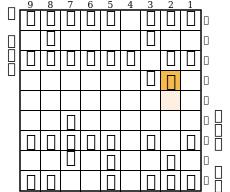

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d
go byoyomi 1000
info currmove 7h8i
info time 0 depth 1 nodes 4 score cp -1073 pv 7h8i
info currmove 7h8i
info currmove 7h8i
info time 0 depth 2 nodes 213 score cp 172 pv 7h8i 2d2c+
info currmove 7h8i
info currmove 7h8i
info time 3 depth 3 nodes 4793 score cp -974 pv 7h8i 2d2c+ 8i9i
info currmove 7h8i
info currmove 7h8i
info time 22 depth 4 nodes 24659 score cp 248 pv 7h8i 9i9h 2c2d 2h2d
info currmove 7h8i
info time 67 depth 4 nodes 62321 score cp 308 pv 7h7g 8i7g S*8h 2d2c+
info time 128 nodes 113536 score cp 308 pv 7h7g 8i7g S*8h 2d2c+
bestmove 7h7g
16手目


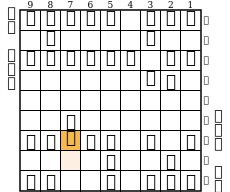

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6pP1/9/2P6/PPgPP1P1P/4G2R1/LN2K1SNL b 2Bsp 17
0:2d2c  move_count:   1 nn_rate:0.00017 win_rate:0.42542
1:2d2c+ move_count:   5 nn_rate:0.02984 win_rate:0.57351
2:7f7e  move_count:   0 nn_rate:0.00003 win_rate:0.00000
3:9g9f  move_count:   0 nn_rate:0.00016 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00042 win_rate:0.00000
5:6g6f  move_count:   0 nn_rate:0.00029 win_rate:0.00000
6:5g5f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
7:3g3f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
8:1g1f  move_count:   0 nn_rate:0.00007 win_rate:0.00000
9:9i9h  move_count:   0 nn_rate:0.00006 win_rate:0.00000
10:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
11:8i7g  move_count: 150 nn_rate:0.94274 win_rate:0.58738
12:3i4h  move_count:   0 nn_rate:0.00178 win_rate:0.00000
13:3i3h  move_count:   0 nn_rate:0.00016 win_rate:0.00000
14:5

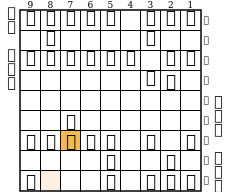

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g
go byoyomi 1000
info currmove S*8h
info time 0 depth 1 nodes 3 score cp -2968 pv S*8h
info time 0 depth 1 nodes 82 score cp -1587 pv 2c2d
info currmove 2c2d
info time 0 depth 2 nodes 348 score cp -1588 pv 2c2d 2h2d
info currmove S*8h
info time 1 depth 2 nodes 550 score cp -1318 pv S*8h 2d2c+
info currmove 2c2d
info time 6 depth 3 nodes 7653 score cp -1648 pv 2c2d 2h2d S*2c
info currmove S*8h
info currmove 2c2d
info time 36 depth 4 nodes 39705 score cp -1648 pv 2c2d 2h2d S*2c 2d2e
info currmove S*8h
info time 65 depth 4 nodes 62822 score cp -1518 pv S*8h 2d2c+ P*2g 2c3b
info time 263 nodes 262436 score cp -1518 pv S*8h 2d2c+ P*2g 2c3b
bestmove S*8h
18手目


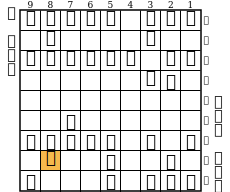

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1pp/6pP1/9/2P6/PPNPP1P1P/1s2G2R1/L3K1SNL b 2BGp 19
0:2d2c  move_count:   1 nn_rate:0.00315 win_rate:0.45767
1:2d2c+ move_count: 147 nn_rate:0.53681 win_rate:0.68171
2:7f7e  move_count:   0 nn_rate:0.00083 win_rate:0.00000
3:9g9f  move_count:   0 nn_rate:0.00621 win_rate:0.00000
4:8g8f  move_count:   0 nn_rate:0.00252 win_rate:0.00000
5:6g6f  move_count:   0 nn_rate:0.00889 win_rate:0.00000
6:5g5f  move_count:   0 nn_rate:0.00034 win_rate:0.00000
7:3g3f  move_count:   0 nn_rate:0.00095 win_rate:0.00000
8:1g1f  move_count:   0 nn_rate:0.00197 win_rate:0.00000
9:9i9h  move_count:   1 nn_rate:0.02495 win_rate:0.51260
10:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
11:7g8e  move_count:   2 nn_rate:0.02430 win_rate:0.58063
12:7g6e  move_count:  38 nn_rate:0.25617 win_rate:0.61222
13:3i4h  move_count:   1 nn_rate:0.02962 win_rate:0

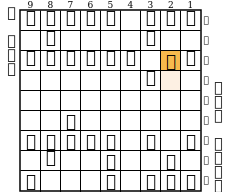

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+
go byoyomi 1000
info time 1 depth 1 nodes 49 score cp -2463 pv 8h7g+
info currmove 8h7g+
info time 1 depth 2 nodes 318 score cp -2473 pv 8h7g+ 2c3b
info time 1 depth 2 nodes 613 score cp -1546 pv 3b4b 5i6h
info time 2 depth 2 nodes 845 score cp -1518 pv P*2g 2c3b
info currmove 8h7g+
info time 8 depth 3 nodes 8582 score cp -2473 pv 8h7g+ 2c3b 3a3b
info currmove P*2g
info currmove 8h7g+
info time 46 depth 4 nodes 40512 score cp -2463 pv 8h7g+ 2c3b P*2g 2h4h
info currmove P*2g
info time 83 depth 4 nodes 66779 score cp -1427 pv P*2g B*1e 5a4a 2c3b
info time 203 nodes 180464 score cp -1427 pv P*2g B*1e 5a4a 2c3b
bestmove P*2g
20手目


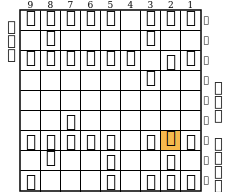

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g
go byoyomi 1000
lnsgk1snl/1r4g2/pppppp1+Pp/6p2/9/2P6/PPNPP1PpP/1s2G2R1/L3K1SNL b 2BGP 21
0:7f7e  move_count:   1 nn_rate:0.00005 win_rate:0.60686
1:9g9f  move_count:   0 nn_rate:0.00050 win_rate:0.00000
2:8g8f  move_count:   0 nn_rate:0.00010 win_rate:0.00000
3:6g6f  move_count:   0 nn_rate:0.00031 win_rate:0.00000
4:5g5f  move_count:   0 nn_rate:0.00002 win_rate:0.00000
5:3g3f  move_count:   0 nn_rate:0.00014 win_rate:0.00000
6:1g1f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
7:9i9h  move_count:   0 nn_rate:0.00287 win_rate:0.00000
8:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
9:7g8e  move_count:   0 nn_rate:0.00027 win_rate:0.00000
10:7g6e  move_count:   0 nn_rate:0.00752 win_rate:0.00000
11:3i4h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
12:3i3h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
13:5h4g  move_count:   0 nn_rate:0.00010

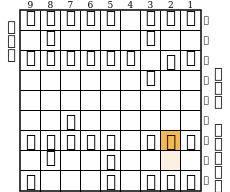

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g
go byoyomi 1000
info currmove 8h7g+
info time 0 depth 1 nodes 4 score cp -2668 pv 8h7g+
info currmove 8h7g+
info currmove 8h7g+
info time 1 depth 2 nodes 311 score cp -2678 pv 8h7g+ 2c3b
info currmove 8h7g+
info time 1 depth 2 nodes 1134 score cp -1751 pv 3b4b 5i6h
info currmove 8h7g+
info time 12 depth 3 nodes 11906 score cp -2678 pv 8h7g+ 2c3b 3a3b
info currmove 3b4b
info currmove 8h7g+
info time 47 depth 4 nodes 40897 score cp -3037 pv 8h7g+ 2c3b 3a3b 2g2b+
info currmove 3b4b
info time 87 depth 4 nodes 77679 score cp -2988 pv 3b4b P*2b 2a3c 2c3c
info time 216 nodes 199170 score cp -2988 pv 3b4b P*2b 2a3c 2c3c
bestmove 3b4b
22手目


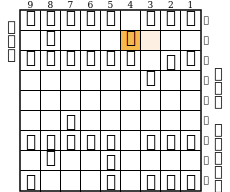

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b
go byoyomi 1000
lnsgk1snl/1r3g3/pppppp1+Pp/6p2/9/2P6/PPNPP1PRP/1s2G4/L3K1SNL b 2BG2P 23
0:7f7e  move_count:   1 nn_rate:0.00159 win_rate:0.52762
1:9g9f  move_count:   0 nn_rate:0.00713 win_rate:0.00000
2:8g8f  move_count:   0 nn_rate:0.00184 win_rate:0.00000
3:6g6f  move_count:   0 nn_rate:0.00335 win_rate:0.00000
4:5g5f  move_count:   0 nn_rate:0.00016 win_rate:0.00000
5:3g3f  move_count:   0 nn_rate:0.01272 win_rate:0.00000
6:1g1f  move_count:   0 nn_rate:0.00202 win_rate:0.00000
7:9i9h  move_count:  13 nn_rate:0.05215 win_rate:0.70528
8:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
9:7g8e  move_count:   0 nn_rate:0.01290 win_rate:0.00000
10:7g6e  move_count:  73 nn_rate:0.12142 win_rate:0.74247
11:3i4h  move_count:   4 nn_rate:0.01676 win_rate:0.69142
12:3i3h  move_count:   1 nn_rate:0.01799 win_rate:0.48832
13:3i2h  move_count:   0 nn_rat

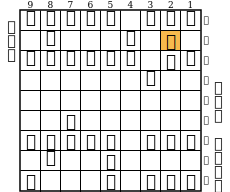

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b
go byoyomi 1000
info currmove 2a3c
info time 0 depth 1 nodes 3 score cp -3318 pv 2a3c
info currmove 2a3c
info time 1 depth 2 nodes 293 score cp -2988 pv 2a3c 2c3c
info currmove 2a3c
info currmove 2a3c
info time 4 depth 3 nodes 4113 score cp -4678 pv 2a3c 2b2a+ 8h7g+
info currmove 2a3c
info currmove 2a3c
info time 40 depth 4 nodes 33246 score cp -4463 pv 2a3c 2b2a+ 8h7g+ 2a3a
info currmove 2a3c
info time 64 depth 4 nodes 52151 score cp -4255 pv 8h7g+ 2b2a+ N*1e 2g2d
info time 173 nodes 168934 score cp -4255 pv 8h7g+ 2b2a+ N*1e 2g2d
bestmove 8h7g+
24手目


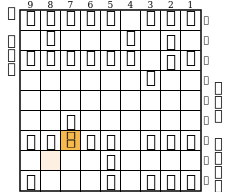

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+
go byoyomi 1000
lnsgk1snl/1r3g1P1/pppppp1+Pp/6p2/9/2P6/PP+sPP1PRP/4G4/L3K1SNL b 2BGPn 25
0:2b2a+ move_count: 147 nn_rate:0.45305 win_rate:0.80485
1:7f7e  move_count:   0 nn_rate:0.00202 win_rate:0.00000
2:9g9f  move_count:   0 nn_rate:0.00070 win_rate:0.00000
3:8g8f  move_count:   0 nn_rate:0.00999 win_rate:0.00000
4:6g6f  move_count:   0 nn_rate:0.00341 win_rate:0.00000
5:5g5f  move_count:   0 nn_rate:0.00098 win_rate:0.00000
6:3g3f  move_count:   0 nn_rate:0.01249 win_rate:0.00000
7:1g1f  move_count:   0 nn_rate:0.00188 win_rate:0.00000
8:9i9h  move_count:   0 nn_rate:0.00054 win_rate:0.00000
9:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
10:3i4h  move_count:   0 nn_rate:0.01857 win_rate:0.00000
11:3i3h  move_count:   0 nn_rate:0.01739 win_rate:0.00000
12:3i2h  move_count:   0 nn_rate:0.00673 win_rate:0.00000
13:5h4g  move_count

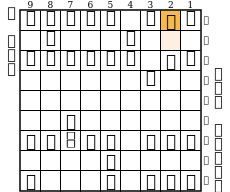

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+
go byoyomi 1000
info currmove N*1e
info time 0 depth 1 nodes 3 score cp -6148 pv N*1e
info time 0 depth 1 nodes 74 score cp -5907 pv 7g7f
info time 0 depth 1 nodes 76 score cp -5293 pv 3a3b
info time 0 depth 1 nodes 77 score cp -5283 pv 4b4a
info currmove 4b4a
info time 1 depth 2 nodes 433 score cp -5087 pv 4b4a 2a1a
info currmove N*1e
info time 1 depth 2 nodes 729 score cp -3898 pv N*1e 2g2d
info currmove 4b4a
info time 9 depth 3 nodes 10732 score cp -6413 pv 4b4a B*3c 3a4b
info currmove N*1e
info time 13 depth 3 nodes 15642 score cp -5528 pv N*1e 2g2e 4b4a
info time 19 depth 3 nodes 24853 score cp -5300 pv 5a4a 2a1a 7g7f
info time 25 depth 3 nodes 34086 score cp -5015 pv 7g8h 2c1c 1a1c
info currmove N*1e
info time 97 depth 4 nodes 85722 score cp -4906 pv N*1e 2g2d 1e2g 2d2g
info currmove 7g8h
info time 363 depth 4 nodes 332134 score

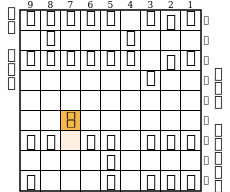

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f
go byoyomi 1000
lnsgk1s+Pl/1r3g3/pppppp1+Pp/6p2/9/2+s6/PP1PP1PRP/4G4/L3K1SNL b 2BGNPnp 27
0:9g9f  move_count:   2 nn_rate:0.00052 win_rate:0.77285
1:8g8f  move_count:   0 nn_rate:0.00127 win_rate:0.00000
2:6g6f  move_count:   0 nn_rate:0.00028 win_rate:0.00000
3:5g5f  move_count:   0 nn_rate:0.00057 win_rate:0.00000
4:3g3f  move_count:   0 nn_rate:0.00544 win_rate:0.00000
5:1g1f  move_count:   0 nn_rate:0.00047 win_rate:0.00000
6:9i9h  move_count:   0 nn_rate:0.00030 win_rate:0.00000
7:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
8:3i4h  move_count:   0 nn_rate:0.00260 win_rate:0.00000
9:3i3h  move_count:   0 nn_rate:0.00765 win_rate:0.00000
10:3i2h  move_count:   0 nn_rate:0.00792 win_rate:0.00000
11:5h4g  move_count:   0 nn_rate:0.00019 win_rate:0.00000
12:5h6h  move_count:   0 nn_rate:0.00046 win_rate:0.00000
13:5h4h

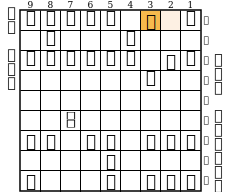

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a
go byoyomi 1000
info currmove P*2h
info time 0 depth 1 nodes 3 score cp -6092 pv P*2h
info time 0 depth 1 nodes 79 score cp -5692 pv 7f8g
info currmove 7f8g
info time 1 depth 2 nodes 541 score cp -5702 pv 7f8g P*2b
info currmove P*2h
info time 2 depth 2 nodes 936 score cp -4787 pv P*2h 2c1c
info currmove 7f8g
info time 9 depth 3 nodes 14318 score cp -6909 pv 7f8g 2c2b 4b5b
info currmove P*2h
info time 24 depth 3 nodes 35943 score cp -5622 pv P*2h 2g2f 2h2i+
info currmove P*2h
info time 188 depth 4 nodes 173716 score cp -4329 pv P*2h 2g2h N*4f 5h4h
info currmove P*2h
info time 501 nodes 493723 score cp -5622 pv P*2h 2g2h N*4f 5h4h
bestmove P*2h
28手目


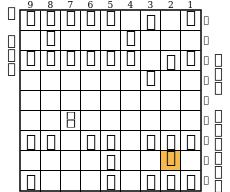

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h
go byoyomi 1000
lnsgk1+P1l/1r3g3/pppppp1+Pp/6p2/9/2+s6/PP1PP1PRP/4G2p1/L3K1SNL b 2BGSNPn 29
0:9g9f  move_count:   4 nn_rate:0.00006 win_rate:0.76996
1:8g8f  move_count:   0 nn_rate:0.00021 win_rate:0.00000
2:6g6f  move_count:   0 nn_rate:0.00011 win_rate:0.00000
3:5g5f  move_count:   0 nn_rate:0.00010 win_rate:0.00000
4:3g3f  move_count:   0 nn_rate:0.00075 win_rate:0.00000
5:1g1f  move_count:   0 nn_rate:0.00006 win_rate:0.00000
6:9i9h  move_count:   0 nn_rate:0.00007 win_rate:0.00000
7:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
8:3i4h  move_count:   0 nn_rate:0.00063 win_rate:0.00000
9:3i3h  move_count:   0 nn_rate:0.00133 win_rate:0.00000
10:3i2h  move_count: 144 nn_rate:0.71161 win_rate:0.85356
11:5h4g  move_count:   0 nn_rate:0.00009 win_rate:0.00000
12:5h6h  move_count:   0 nn_rate:0.00004 win_rate:0.0

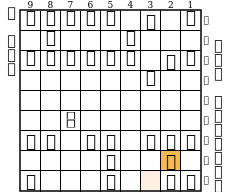

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h
go byoyomi 1000
info currmove N*4f
info time 0 depth 1 nodes 4 score cp -6142 pv N*4f
info currmove N*4f
info time 0 depth 1 nodes 75 score cp -5902 pv 7f8g
info currmove 7f8g
info time 1 depth 2 nodes 527 score cp -5912 pv 7f8g P*2b
info currmove N*4f
info time 3 depth 2 nodes 1676 score cp -5902 pv N*7e N*7i
info currmove 7f8g
info time 19 depth 3 nodes 23703 score cp -7119 pv 7f8g 2c2b 4b5b
info currmove N*7e
info time 23 depth 3 nodes 30096 score cp -6807 pv N*7e S*2b 7e6g+
info time 28 depth 3 nodes 36128 score cp -6146 pv N*1e 2g2e 1c1d
info time 36 depth 3 nodes 47941 score cp -5924 pv N*4f 5h4h 7f8g
info currmove N*7e
info time 145 depth 4 nodes 146659 score cp -5745 pv N*7e P*2b 7e6g 5i6h
info currmove N*4f
info time 501 nodes 504567 score cp -5924 pv N*7e P*2b 7e6g 5i6h
bestmove N*7e
30手目


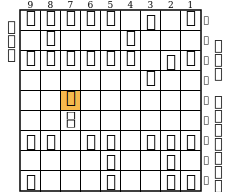

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e
go byoyomi 1000
lnsgk1+P1l/1r3g3/pppppp1+Pp/6p2/2n6/2+s6/PP1PP1PRP/4G2S1/L3K2NL b 2BGSN2P 31
0:9g9f  move_count:   2 nn_rate:0.00037 win_rate:0.89344
1:8g8f  move_count:   0 nn_rate:0.00479 win_rate:0.00000
2:6g6f  move_count:   0 nn_rate:0.00086 win_rate:0.00000
3:5g5f  move_count:   0 nn_rate:0.00050 win_rate:0.00000
4:3g3f  move_count:   0 nn_rate:0.00865 win_rate:0.00000
5:1g1f  move_count:   0 nn_rate:0.00049 win_rate:0.00000
6:9i9h  move_count:   0 nn_rate:0.00027 win_rate:0.00000
7:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
8:2h3i  move_count:   0 nn_rate:0.00425 win_rate:0.00000
9:5h4g  move_count:   0 nn_rate:0.00012 win_rate:0.00000
10:5h6h  move_count:   0 nn_rate:0.00103 win_rate:0.00000
11:5h4h  move_count:   0 nn_rate:0.00078 win_rate:0.00000
12:2g2d  move_count:   0 nn_rate:0.01413 w

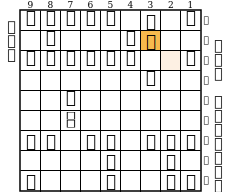

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b
go byoyomi 1000
info currmove 7e6g+
info time 0 depth 1 nodes 4 score cp -6592 pv 7e6g+
info currmove 7e6g
info time 0 depth 1 nodes 43 score cp -5972 pv 4b3b
info currmove 4b3b
info time 1 depth 2 nodes 467 score cp -5982 pv 4b3b 3a3b
info currmove 7e6g
info time 1 depth 2 nodes 478 score cp -5735 pv 7e6g 5i6h
info currmove 4b3b
info time 15 depth 3 nodes 14141 score cp -7210 pv 4b3b G*4a 5a5b
info currmove 7e6g
info time 15 depth 3 nodes 14339 score cp -5840 pv 7e6g 5i6h 4b3b
info currmove 7e6g
info time 25 depth 4 nodes 23995 score cp -4485 pv 7e6g 5i6h P*2f 3b4b
info currmove 7e6g
info time 53 nodes 53291 score cp -4485 pv 7e6g 5i6h P*2f 3b4b
bestmove 7e6g
32手目


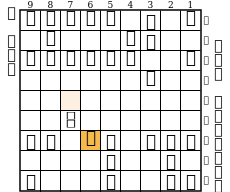

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g
go byoyomi 1000
lnsgk1+P1l/1r3g+P2/pppppp2p/6p2/9/2+s6/PP1nP1PRP/4G2S1/L3K2NL b 2BGSN2Pp 33
0:5h6g  move_count:  85 nn_rate:0.36443 win_rate:0.84839
1:5i6h  move_count:  40 nn_rate:0.18832 win_rate:0.85099
2:5i4h  move_count: 132 nn_rate:0.38393 win_rate:0.90511
3:5i6i  move_count:   4 nn_rate:0.04043 win_rate:0.75529
4:5i4i  move_count:   0 nn_rate:0.02289 win_rate:0.00000
info nps 49 time 5316 nodes 261 hashfull 63 score cp 1353 pv 5i4h
bestmove 5i4h
33手目


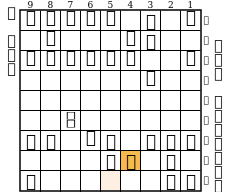

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h
go byoyomi 1000
info currmove 4b3b
info time 0 depth 1 nodes 4 score cp -5764 pv 4b3b
info currmove P*2f
info currmove 4b3b
info time 1 depth 2 nodes 473 score cp -5774 pv 4b3b 3a3b
info currmove P*2f
info time 1 depth 2 nodes 856 score cp -4699 pv P*2f 2g2f
info currmove 4b3b
info time 17 depth 3 nodes 14289 score cp -7002 pv 4b3b G*4a 5a5b
info currmove P*2f
info time 25 depth 3 nodes 21673 score cp -6847 pv 6g7i+ 2g2b+ 7f8g
info currmove 6g7i+
info time 87 depth 4 nodes 81078 score cp -6940 pv 6g7i+ 3b4b 8b4b 2g2a+
info currmove P*2f
info time 169 depth 4 nodes 146328 score cp -4748 pv P*2f 2g2f 4b3b 3a3b
info time 196 nodes 176228 score cp -4748 pv P*2f 2g2f 4b3b 3a3b
bestmove P*2f
34手目


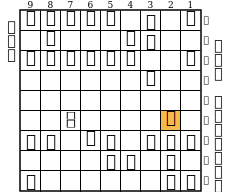

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f
go byoyomi 1000
lnsgk1+P1l/1r3g+P2/pppppp2p/6p2/9/2+s4p1/PP1nP1PRP/4GK1S1/L6NL b 2BGSN2P 35
0:9g9f  move_count:   2 nn_rate:0.00007 win_rate:0.73102
1:8g8f  move_count:   0 nn_rate:0.00016 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00220 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00253 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00024 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00016 win_rate:0.00000
6:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
7:2h3i  move_count:   0 nn_rate:0.00234 win_rate:0.00000
8:5h6g  move_count:   0 nn_rate:0.01940 win_rate:0.00000
9:5h4g  move_count:   0 nn_rate:0.00034 win_rate:0.00000
10:5h6h  move_count:   0 nn_rate:0.00004 win_rate:0.00000
11:5h5i  move_count:   0 nn_rate:0.00000 win_rate:0.00000
12:2g2f  move_count: 15

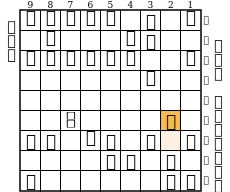

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f
go byoyomi 1000
info currmove 4b3b
info time 0 depth 1 nodes 4 score cp -7074 pv 4b3b
info currmove 4b3b
info currmove 4b3b
info time 1 depth 2 nodes 484 score cp -5989 pv 4b3b 3a3b
info currmove 4b3b
info currmove 4b3b
info time 7 depth 3 nodes 7789 score cp -7294 pv 4b3b 3a3b 7f7g
info currmove 4b3b
info time 13 depth 3 nodes 14188 score cp -7291 pv 7f7g 3b4b 5a4b
info currmove 7f7g
info time 84 depth 4 nodes 81831 score cp -7646 pv 7f7g 3b4b 8b4b 2f2a+
info currmove 4b3b
info time 167 depth 4 nodes 162004 score cp -7022 pv 4b3b G*4a 5a5b 3a3b
info time 194 nodes 191230 score cp -7022 pv 4b3b G*4a 5a5b 3a3b
bestmove 4b3b
36手目


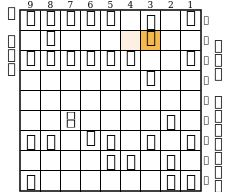

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b
go byoyomi 1000
lnsgk1+P1l/1r4g2/pppppp2p/6p2/9/2+s4R1/PP1nP1P1P/4GK1S1/L6NL b 2BGSN3Pp 37
0:9g9f  move_count:   2 nn_rate:0.00024 win_rate:0.77726
1:8g8f  move_count:   0 nn_rate:0.00057 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00208 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00043 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00033 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00028 win_rate:0.00000
6:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
7:2h2g  move_count:   0 nn_rate:0.00165 win_rate:0.00000
8:2h3i  move_count:   0 nn_rate:0.00698 win_rate:0.00000
9:5h6g  move_count:   0 nn_rate:0.02281 win_rate:0.00000
10:5h4g  move_count:   0 nn_rate:0.00244 win_rate:0.00000
11:5h6h  move_count:   0 nn_rate:0.00013 win_rate:0.00000
12:5h5i  move_

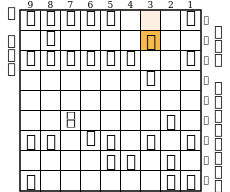

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b
go byoyomi 1000
info currmove 7f7g
info time 0 depth 1 nodes 4 score cp -7294 pv 7f7g
info currmove P*2g
info currmove 7f7g
info time 0 depth 2 nodes 522 score cp -7469 pv 7f7g 2f2a+
info currmove P*2g
info time 1 depth 2 nodes 955 score cp -5979 pv P*2g 2h3i
info currmove 7f7g
info time 6 depth 3 nodes 8245 score cp -9657 pv 7f7g B*3c 5a5b
info currmove P*2g
info time 11 depth 3 nodes 14411 score cp -9467 pv P*2g G*4a 5a5b
info time 15 depth 3 nodes 21916 score cp -8921 pv 7f8g 2f2a+ 5a6b
info time 20 depth 3 nodes 29522 score cp -8840 pv 8b3b 2f2a+ 5a4b
info currmove 8b3b
info time 98 depth 4 nodes 113953 score cp -8831 pv 8b3b 2f2a+ 5a4b 2a6a
info currmove P*2g
info time 212 depth 4 nodes 197303 score cp -7475 pv P*2g 2f2a+ 5a6b 2h3i
info time 336 nodes 342478 score cp -74

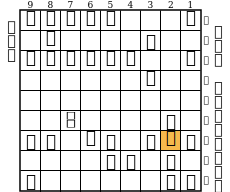

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g
go byoyomi 1000
lnsgk3l/1r4+P2/pppppp2p/6p2/9/2+s4R1/PP1nP1PpP/4GK1S1/L6NL b 2B2GSN3P 39
0:9g9f  move_count:   3 nn_rate:0.00009 win_rate:0.83644
1:8g8f  move_count:   0 nn_rate:0.00021 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00070 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00109 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00063 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00009 win_rate:0.00000
6:1i1h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
7:2h2g  move_count:  70 nn_rate:0.09657 win_rate:0.93108
8:2h3i  move_count:  90 nn_rate:0.27211 win_rate:0.90559
9:5h6g  move_count:   0 nn_rate:0.01148 win_rate:0.00000
10:5h4g  move_count:   0 nn_rate:0.00072 win_rate:0.00000
11:5h6h  move_count:   0 nn_rate:0.00011 win_rate:0.00000
12:5h5

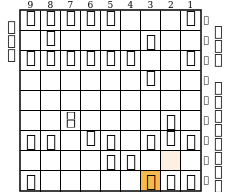

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i
go byoyomi 1000
info currmove 7f8g
info time 0 depth 1 nodes 4 score cp -8514 pv 7f8g
info currmove 2g2h+
info time 0 depth 1 nodes 5 score cp -8449 pv 2g2h+
info time 0 depth 1 nodes 40 score cp -8229 pv 8b3b
info time 0 depth 1 nodes 41 score cp -7489 pv 7f7g
info currmove 7f7g
info time 0 depth 2 nodes 503 score cp -7459 pv 7f7g 2f2a+
info currmove 2g2h+
info time 1 depth 2 nodes 924 score cp -5580 pv 2g2h+ 2f7f
info currmove 7f7g
info time 6 depth 3 nodes 7168 score cp -9647 pv 7f7g B*3c 5a5b
info currmove 2g2h+
info time 11 depth 3 nodes 13622 score cp -8382 pv 2g2h+ G*4a 5a5b
info currmove 2g2h+
info time 110 depth 4 nodes 95190 score cp -6402 pv 2g2h+ 2f2a+ 5a6b 2a1a
info currmove 2g2h+
info time 217 nodes 214494 score cp -6402 pv 2g2h+ 2f2a+ 5a6b 2a1a
bestmo

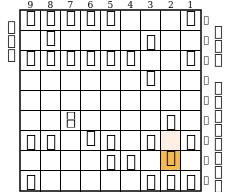

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+
go byoyomi 1000
lnsgk3l/1r4+P2/pppppp2p/6p2/9/2+s4R1/PP1nP1P1P/4GK1+p1/L5SNL b 2B2GSN3P 41
0:9g9f  move_count:   4 nn_rate:0.00007 win_rate:0.88583
1:8g8f  move_count:   0 nn_rate:0.00010 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00131 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00012 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00005 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00011 win_rate:0.00000
6:1i1h  move_count:   0 nn_rate:0.00021 win_rate:0.00000
7:3i3h  move_count:   0 nn_rate:0.00117 win_rate:0.00000
8:3i2h  move_count: 148 nn_rate:0.58483 win_rate:0.91006
9:5h6g  move_count:   0 nn_rate:0.01270 win_rate:0.00000
10:5h4g  move_count:   0 nn_rate:0.00073 win_rate:0.00000
11:5h6h  move_count:   0 nn_rate:0.00011 win_rate:0

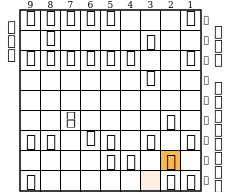

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h
go byoyomi 1000
info currmove 8b3b
info time 0 depth 1 nodes 4 score cp -8449 pv 8b3b
info currmove 7f7g
info time 0 depth 1 nodes 5 score cp -7504 pv 7f7g
info currmove 8b3b
info time 0 depth 2 nodes 484 score cp -7402 pv 8b3b 2f7f
info currmove 7f7g
info time 1 depth 2 nodes 1219 score cp -7181 pv 6g7i+ 2f2a+
info currmove 7f7g
info time 12 depth 3 nodes 13025 score cp -9867 pv 7f7g B*3c 5a5b
info currmove 6g7i+
info time 16 depth 3 nodes 19259 score cp -9187 pv 6g7i+ G*4a 5a5b
info time 21 depth 3 nodes 26758 score cp -9131 pv 7f8g 2f2a+ 5a6b
info time 26 depth 3 nodes 34363 score cp -9050 pv 8b3b 2f2a+ 5a4b
info currmove 8b3b
info time 101 depth 4 nodes 115948 score cp -9041 pv 8b3b 2f2a+ 5a4b 2a6a
info currmove 6g7i+
info time 179 depth 4 nodes 19190

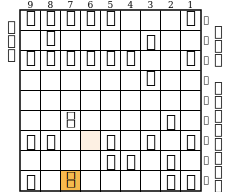

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+
go byoyomi 1000
lnsgk3l/1r4+P2/pppppp2p/6p2/9/2+s4R1/PP2P1P1P/4GK1S1/L1+n4NL b 2B2GSN4P 43
0:9g9f  move_count:   5 nn_rate:0.00029 win_rate:0.86794
1:8g8f  move_count:   0 nn_rate:0.00055 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00102 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00060 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00033 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00017 win_rate:0.00000
6:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
7:2h2g  move_count:   0 nn_rate:0.00262 win_rate:0.00000
8:2h3i  move_count:   0 nn_rate:0.01215 win_rate:0.00000
9:5h6g  move_count:   0 nn_rate:0.00001 win_rate:0.00000
10:5h4g  move_count:   0 nn_rate:0.00222 win_rate:0.00000
11:5h6h  move_count:   0 nn_rate:0.00022

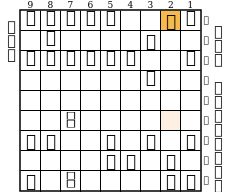

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+
go byoyomi 1000
info currmove 5a6b
info time 0 depth 1 nodes 4 score cp -8439 pv 5a6b
info currmove 5a6b
info currmove 5a6b
info time 0 depth 2 nodes 440 score cp -8243 pv 5a6b 2a1a
info currmove 5a6b
info currmove 5a6b
info time 4 depth 3 nodes 5855 score cp -8549 pv 5a6b B*8h 7i7h
info currmove 5a6b
info currmove 5a6b
info time 82 depth 4 nodes 93772 score cp -8383 pv 5a6b S*9h 6a5b 2a1a
info currmove 5a6b
info time 98 nodes 111771 score cp -8383 pv 5a6b S*9h 6a5b 2a1a
bestmove 5a6b
44手目


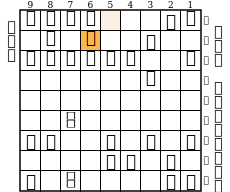

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b
go byoyomi 1000
lnsg3+Rl/1r1k2+P2/pppppp2p/6p2/9/2+s6/PP2P1P1P/4GK1S1/L1+n4NL b 2B2GSN4P 45
0:9g9f  move_count:   5 nn_rate:0.00154 win_rate:0.89169
1:8g8f  move_count:   0 nn_rate:0.00354 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.01515 win_rate:0.00000
3:3g3f  move_count:  29 nn_rate:0.03632 win_rate:0.97021
4:1g1f  move_count:   0 nn_rate:0.00111 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00064 win_rate:0.00000
6:1i1h  move_count:   0 nn_rate:0.00005 win_rate:0.00000
7:2h2g  move_count:   0 nn_rate:0.00962 win_rate:0.00000
8:2h3i  move_count:  21 nn_rate:0.04465 win_rate:0.95653
9:5h6g  move_count:   0 nn_rate:0.00005 win_rate:0.00000
10:5h4g  move_count:   0 nn_rate:0.01867 win_rate:0.00000
11:5h6h  move_count:   0 nn_

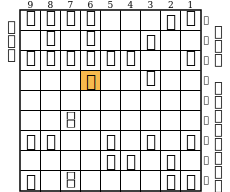

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d
go byoyomi 1000
info time 0 depth 1 nodes 30 score cp -8228 pv 6c6d
info currmove 6c6d
info time 1 depth 2 nodes 476 score cp -8032 pv 6c6d 2a1a
info time 2 depth 2 nodes 1183 score cp -7228 pv 7i8i 2a1a
info currmove 6c6d
info time 11 depth 3 nodes 13018 score cp -8338 pv 6c6d B*8h 7i7h
info currmove 7i8i
info currmove 6c6d
info time 120 depth 4 nodes 137502 score cp -8022 pv 6c6d 2a1a P*2g 2h3i
info currmove 7i8i
info time 198 nodes 233717 score cp -8022 pv 6c6d 2a1a P*2g 2h3i
bestmove 6c6d
46手目


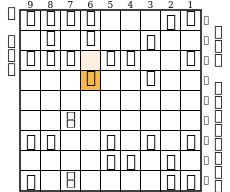

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d
go byoyomi 1000
lnsg3+Rl/1r1k2+P2/ppp1pp2p/3p2p2/9/2+s6/PP2P1P1P/4GK1S1/L1+n4NL b 2B2GSN3Pp 47
0:9g9f  move_count:   6 nn_rate:0.00162 win_rate:0.93203
1:8g8f  move_count:   0 nn_rate:0.00336 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.01514 win_rate:0.00000
3:3g3f  move_count:  36 nn_rate:0.05736 win_rate:0.97876
4:1g1f  move_count:   0 nn_rate:0.00139 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00055 win_rate:0.00000
6:1i1h  move_count:   0 nn_rate:0.00005 win_rate:0.00000
7:2h2g  move_count:   0 nn_rate:0.01441 win_rate:0.00000
8:2h3i  move_count:  24 nn_rate:0.05804 win_rate:0.96379
9:5h6g  move_count:   0 nn_rate:0.00008 win_rate:0.00000
10:5h4g  move_count:   0 nn_rate:0.01616 win_rate:0.00000
11:5h6h  move_c

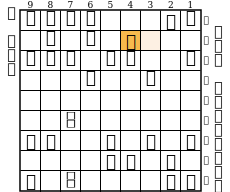

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b
go byoyomi 1000
info currmove 7f8g
info time 0 depth 1 nodes 4 score cp -8023 pv 7f8g
info currmove P*2g
info currmove 7f8g
info time 2 depth 2 nodes 507 score cp -8032 pv 7f8g 2a1a
info currmove P*2g
info time 3 depth 2 nodes 919 score cp -6783 pv P*2g 2h3i
info currmove 7f8g
info time 13 depth 3 nodes 13116 score cp -8227 pv 7f8g 2a1a P*2g
info currmove P*2g
info time 18 depth 3 nodes 18461 score cp -7358 pv P*2g S*5a 6a5a
info currmove P*2g
info time 96 depth 4 nodes 95512 score cp -6071 pv P*2g 2h2g 7i8i G*9h
info currmove P*2g
info time 189 nodes 213822 score cp -6071 pv P*2g 2h2g 7i8i G*9h
bestmove P*2g
48手目


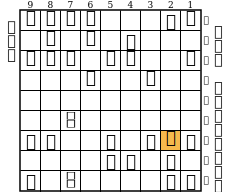

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g
go byoyomi 1000
lnsg3+Rl/1r1k1+P3/ppp1pp2p/3p2p2/9/2+s6/PP2P1PpP/4GK1S1/L1+n4NL b 2B2GSN3P 49
0:9g9f  move_count:   1 nn_rate:0.00003 win_rate:0.99850
1:8g8f  move_count:   0 nn_rate:0.00022 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00023 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00163 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00045 win_rate:0.00000
5:9i9h  move_count:   0 nn_rate:0.00002 win_rate:0.00000
6:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
7:2h2g  move_count: 158 nn_rate:0.51173 win_rate:0.98316
8:2h3i  move_count:  58 nn_rate:0.25638 win_rate:0.96897
9:5h6g  move_count:   0 nn_rate:0.00000 win_rate:0.00000
10:5h4g  move_count:   0 nn_rate:0.00010 win_rate:0.00000
11:5h6

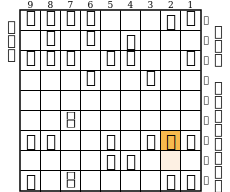

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g
go byoyomi 1000
info currmove 7f8g
info time 0 depth 1 nodes 4 score cp -8240 pv 7f8g
info currmove 7i8i
info currmove 7f8g
info time 1 depth 2 nodes 504 score cp -8249 pv 7f8g 2a1a
info currmove 7i8i
info time 1 depth 2 nodes 939 score cp -7224 pv 7i8i 2a1a
info currmove 7f8g
info time 7 depth 3 nodes 7873 score cp -8444 pv 7f8g 2a1a P*2h
info currmove 7i8i
info time 11 depth 3 nodes 13405 score cp -8239 pv 7i8i 9i9h 7f8g
info currmove 7i8i
info time 75 depth 4 nodes 93608 score cp -7215 pv 7i8i 2a1a 8i9i 1a1c
info currmove 7i8i
info time 149 nodes 187241 score cp -7215 pv 7i8i 2a1a 8i9i 1a1c
bestmove 7i8i
50手目


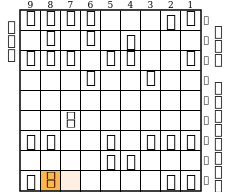

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i
go byoyomi 1000
lnsg3+Rl/1r1k1+P3/ppp1pp2p/3p2p2/9/2+s6/PP2P1PSP/4GK3/L+n5NL b 2B2GSN4P 51
0:9g9f  move_count:  11 nn_rate:0.00091 win_rate:0.97833
1:8g8f  move_count:   0 nn_rate:0.00285 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00424 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00353 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00145 win_rate:0.00000
5:9i9h  move_count:  19 nn_rate:0.04573 win_rate:0.97628
6:1i1h  move_count:   0 nn_rate:0.00028 win_rate:0.00000
7:2g3f  move_count:  50 nn_rate:0.12916 win_rate:0.97397
8:2g2f  move_count:   0 nn_rate:0.00713 win_rate:0.00000
9:2g1f  move_count:   0 nn_rate:0.01210 win_rate:0.00000
10:2g3h  move_count:  20 nn_rate:0.04591 win_rate:0.97937

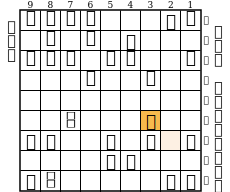

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f
go byoyomi 1000
info currmove 8i9i
info time 0 depth 1 nodes 4 score cp -7205 pv 8i9i
info currmove 8i9i
info currmove 8i9i
info time 1 depth 2 nodes 502 score cp -7009 pv 8i9i 2a1a
info currmove 8i9i
info time 6 depth 2 nodes 6477 score cp -6606 pv 3d3e 2a1a
info currmove 8i9i
info time 15 depth 3 nodes 20070 score cp -7315 pv 8i9i B*5e 9i9h
info currmove 3d3e
info currmove 8i9i
info time 95 depth 4 nodes 117558 score cp -7010 pv 8i9i 2a1a 7f8g 9g9f
info currmove 3d3e
info time 184 nodes 227381 score cp -7010 pv 8i9i 2a1a 7f8g 9g9f
bestmove 8i9i
52手目


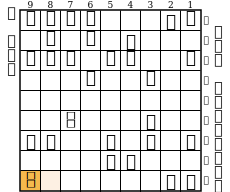

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i
go byoyomi 1000
lnsg3+Rl/1r1k1+P3/ppp1pp2p/3p2p2/9/2+s3S2/PP2P1P1P/4GK3/+n6NL b 2B2GSN4Pl 53
0:9g9f  move_count:  18 nn_rate:0.00047 win_rate:0.98177
1:8g8f  move_count:   0 nn_rate:0.00953 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00515 win_rate:0.00000
3:1g1f  move_count:   0 nn_rate:0.00077 win_rate:0.00000
4:1i1h  move_count:   0 nn_rate:0.00006 win_rate:0.00000
5:3f4e  move_count:  23 nn_rate:0.06142 win_rate:0.97484
6:3f3e  move_count:   0 nn_rate:0.00001 win_rate:0.00000
7:3f2e  move_count:   0 nn_rate:0.00831 win_rate:0.00000
8:3f4g  move_count:  16 nn_rate:0.03921 win_rate:0.97824
9:3f2g  move_count:   0 nn_rate:0.00053 win_rate:0.00000
10:5h6g  move_count:   0 nn_rate:0.00004 win_

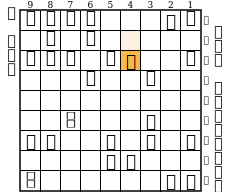

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c
go byoyomi 1000
info currmove 7f8g
info time 0 depth 1 nodes 4 score cp -7205 pv 7f8g
info currmove 7f8g
info currmove 7f8g
info time 2 depth 2 nodes 598 score cp -7009 pv 7f8g 2a1a
info currmove 7f8g
info time 2 depth 2 nodes 689 score cp -6004 pv L*4f 4h5i
info currmove 7f8g
info time 22 depth 3 nodes 29600 score cp -7335 pv 7f8g 4c5c 6b5c
info currmove L*4f
info time 22 depth 3 nodes 29823 score cp -7234 pv L*4f 4h5i 7f8g
info currmove L*4f
info time 42 depth 4 nodes 52026 score cp -6003 pv L*4f 4h5i 3d3e 3f2g
info currmove L*4f
info time 262 nodes 335603 score cp -6003 pv L*4f 4h5i 3d3e 3f2g
bestmove L*4f
54手目


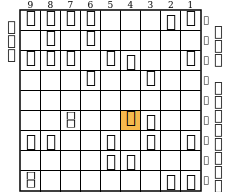

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f
go byoyomi 1000
lnsg3+Rl/1r1k5/ppp1p+P2p/3p2p2/9/2+s2lS2/PP2P1P1P/4GK3/+n6NL b 2B2GSN5P 55
0:3f4g  move_count:   7 nn_rate:0.03770 win_rate:0.96397
1:5h4g  move_count:  23 nn_rate:0.12699 win_rate:0.95703
2:4h3h  move_count:  35 nn_rate:0.11507 win_rate:0.99048
3:4h5i  move_count:  18 nn_rate:0.08692 win_rate:0.96807
4:4h3i  move_count:  16 nn_rate:0.05821 win_rate:0.98555
5:P*4g  move_count:  38 nn_rate:0.12276 win_rate:0.99201
6:N*4g  move_count: 101 nn_rate:0.44840 win_rate:0.98193
7:S*4g  move_count:   0 nn_rate:0.00051 win_rate:0.00000
8:G*4g  move_count:   0 nn_rate:0.00230 win_rate:0.00000
9:B*4g  move_count:   0 nn_rate:0.00114 win_rate:0.00000
info nps 46 time 5172 nodes 238 hashf

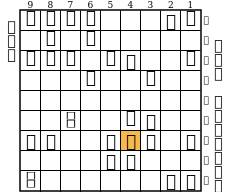

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g
go byoyomi 1000
info time 5 depth 1 nodes 30 score cp -5970 pv 4f4g+
info time 5 depth 1 nodes 31 score cp -5967 pv 4f4g
info currmove 4f4g
info time 5 depth 2 nodes 69 score cp -4695 pv 4f4g 3f4g
info time 5 depth 2 nodes 111 score cp -4341 pv 4f4g+ 3f4g
info currmove 4f4g+
info time 11 depth 3 nodes 5322 score cp -5456 pv 4f4g+ 3f4g N*6f
info currmove 4f4g
info currmove 4f4g+
info time 41 depth 4 nodes 42073 score cp -4499 pv 4f4g+ 5h4g N*5a 2a1a
info currmove 4f4g+
info time 104 nodes 112296 score cp -4499 pv 4f4g+ 5h4g N*5a 2a1a
bestmove 4f4g+
56手目


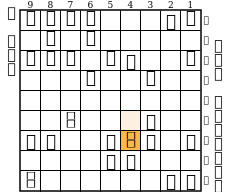

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+
go byoyomi 1000
lnsg3+Rl/1r1k5/ppp1p+P2p/3p2p2/9/2+s3S2/PP2P+lP1P/4GK3/+n6NL b 2B2GS5Pn 57
0:3f4g  move_count: 158 nn_rate:0.62542 win_rate:0.97963
1:5h4g  move_count:  90 nn_rate:0.33111 win_rate:0.98360
2:4h4g  move_count:  12 nn_rate:0.04229 win_rate:0.97574
3:4h5i  move_count:   0 nn_rate:0.00038 win_rate:0.00000
4:4h4i  move_count:   0 nn_rate:0.00029 win_rate:0.00000
5:4h3i  move_count:   0 nn_rate:0.00052 win_rate:0.00000
info nps 48 time 5313 nodes 260 hashfull 63 score cp 2323 pv 3f4g
bestmove 3f4g
57手目


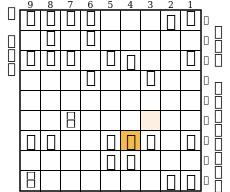

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g
go byoyomi 1000
info currmove N*6f
info time 0 depth 1 nodes 3 score cp -7229 pv N*6f
info time 0 depth 1 nodes 70 score cp -6989 pv 7f8g
info currmove 7f8g
info time 1 depth 2 nodes 590 score cp -6793 pv 7f8g 2a1a
info time 1 depth 2 nodes 1117 score cp -5933 pv N*5a 2a1a
info currmove 7f8g
info time 12 depth 3 nodes 17104 score cp -7119 pv 7f8g 4c5c 6b5c
info currmove N*5a
info currmove 7f8g
info time 88 depth 4 nodes 130605 score cp -6914 pv 7f8g 4c5c 6b5c 2a6a
info currmove N*5a
info time 180 depth 4 nodes 232029 score cp -6838 pv N*5a P*4d 7f8g 2a1a
info time 212 depth 4 nodes 268963 score cp -6813 pv N*6f 5h6h 7f8g 2a1a
info time 290 depth 4 nodes 362403 score cp -665

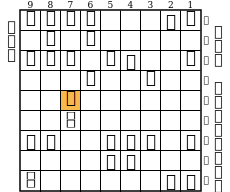

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e
go byoyomi 1000
lnsg3+Rl/1r1k5/ppp1p+P2p/3p2p2/2n6/2+s6/PP2PSP1P/4GK3/+n6NL b 2B2GSL5P 59
0:9g9f  move_count:   3 nn_rate:0.00107 win_rate:0.96774
1:8g8f  move_count:   0 nn_rate:0.01296 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00563 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00911 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00114 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00006 win_rate:0.00000
6:4g5f  move_count:   0 nn_rate:0.03026 win_rate:0.00000
7:4g4f  move_count:   0 nn_rate:0.00709 win_rate:0.00000
8:4g3f  move_count:   6 nn_rate:0.03347 win_rate:0.98537
9:4g3h  move_count:   0 nn_rate:0.00255 win_rate:0.00000
10:5h6g  move_cou

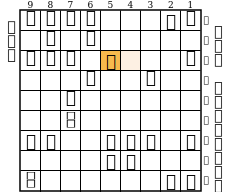

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c
go byoyomi 1000
info currmove 6b5c
info time 1 depth 1 nodes 3 score cp -7359 pv 6b5c
info currmove 6b5c
info time 1 depth 2 nodes 454 score cp -6654 pv 6b5c 2a6a
info currmove 6b5c
info currmove 6b5c
info time 9 depth 3 nodes 10764 score cp -8584 pv 6b5c 2a6a 7a7b
info currmove 6b5c
info currmove 6b5c
info time 87 depth 4 nodes 101893 score cp -6854 pv 6b5c 2a6a P*2h 6a7a
info currmove 6b5c
info time 92 nodes 107200 score cp -6854 pv 6b5c 2a6a P*2h 6a7a
bestmove 6b5c
60手目


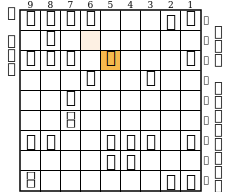

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c
go byoyomi 1000
lnsg3+Rl/1r7/ppp1k3p/3p2p2/2n6/2+s6/PP2PSP1P/4GK3/+n6NL b 2B2GSL6Pp 61
0:9g9f  move_count:  10 nn_rate:0.00068 win_rate:0.97984
1:8g8f  move_count:   0 nn_rate:0.00828 win_rate:0.00000
2:5g5f  move_count:  31 nn_rate:0.06542 win_rate:0.96462
3:3g3f  move_count:   0 nn_rate:0.01707 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00077 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
6:4g5f  move_count:  37 nn_rate:0.05661 win_rate:0.97627
7:4g4f  move_count:   0 nn_rate:0.01774 win_rate:0.00000
8:4g3f  move_count:  45 nn_rate:0.06101 win_rate:0.97887
9:4g3h  move_count:   0 nn_rate:0.00496 win_rate:0.00000
10:5h6g  m

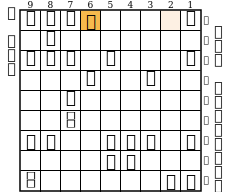

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a
go byoyomi 1000
info currmove 7a7b
info time 0 depth 1 nodes 4 score cp -8584 pv 7a7b
info currmove P*2h
info currmove 7a7b
info time 1 depth 2 nodes 567 score cp -7888 pv 7a7b 6a1a
info currmove P*2h
info time 2 depth 2 nodes 996 score cp -6854 pv P*2h 6a7a
info currmove 7a7b
info time 7 depth 3 nodes 9942 score cp -11558 pv 7a7b B*7a 5c4b
info currmove P*2h
info time 13 depth 3 nodes 15979 score cp -10824 pv P*2h 6a7a 8b1b
info time 19 depth 3 nodes 25044 score cp -10129 pv 7e8g+ 6a7a 8b1b
info time 24 depth 3 nodes 34002 score cp -8724 pv 7a6b G*7b 8b9b
info currmove 7a6b
info time 125 depth 4 nodes 147657 score cp -8234 pv 7a6b G*7b 8b7b 6a7b
info cu

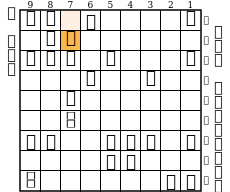

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b
go byoyomi 1000
ln1+R4l/1rs6/ppp1k3p/3p2p2/2n6/2+s6/PP2PSP1P/4GK3/+n6NL b 2B3GSL6Pp 63
0:9g9f  move_count:   5 nn_rate:0.00004 win_rate:0.89649
1:8g8f  move_count:   0 nn_rate:0.00027 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00474 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00321 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00006 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
6:4g5f  move_count:   0 nn_rate:0.00468 win_rate:0.00000
7:4g4f  move_count:   0 nn_rate:0.00106 win_rate:0.00000
8:4g3f  move_count:   0 nn_rate:0.00883 win_rate:0.00000
9:4g3h  move_count:   0 nn_rate:0.00032 win_rate:0.00000


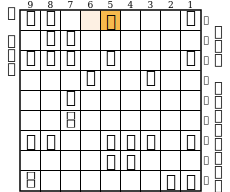

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a
go byoyomi 1000
info currmove 5c4c
info time 0 depth 1 nodes 4 score cp -8584 pv 5c4c
info currmove 5c4c
info currmove 5c4c
info time 0 depth 2 nodes 473 score cp -7888 pv 5c4c 5a1a
info currmove 5c4c
info currmove 5c4c
info time 6 depth 3 nodes 9646 score cp -9707 pv 5c4c B*2a 4c3c
info currmove 5c4c
info time 11 depth 3 nodes 18338 score cp -9514 pv 5c6c B*5d 6c7d
info currmove 5c6c
info time 99 depth 4 nodes 128702 score cp -8371 pv 5c6c B*5d 6c7d 5d7f
info currmove 5c4c
info time 134 nodes 169740 score cp -8371 pv 5c6c B*5d 6c7d 5d7f
bestmove 5c6c
64手目


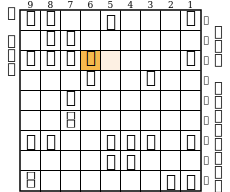

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c
go byoyomi 1000
ln2+R3l/1rs6/pppk4p/3p2p2/2n6/2+s6/PP2PSP1P/4GK3/+n6NL b 2B3GSL6Pp 65
0:9g9f  move_count:   2 nn_rate:0.00069 win_rate:0.96465
1:8g8f  move_count:   0 nn_rate:0.00722 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.01325 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00817 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00055 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00002 win_rate:0.00000
6:4g5f  move_count:  44 nn_rate:0.10261 win_rate:0.98146
7:4g4f  move_count:   0 nn_rate:0.00841 win_rate:0.00000
8:4g3f  move_count:  36 nn_rate:0.07244 win_rate:0.98747
9:4g3h  move_count:   0 nn_rate:0.00149 win_rate

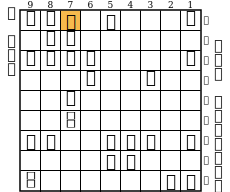

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a
go byoyomi 1000
info currmove 8b9b
info time 1 depth 1 nodes 4 score cp -8494 pv 8b9b
info currmove 8b9b
info currmove 8b9b
info time 1 depth 2 nodes 573 score cp -7798 pv 8b9b 5a1a
info currmove 8b9b
info currmove 8b9b
info time 14 depth 3 nodes 17146 score cp -9424 pv 8b9b B*5d 6c7d
info currmove 8b9b
info currmove 8b9b
info time 112 depth 4 nodes 133067 score cp -8361 pv 8b9b B*8e 7c7d 8e7f
info currmove 8b9b
info time 293 nodes 312666 score cp -8361 pv 8b9b B*8e 7c7d 8e7f
bestmove 8b9b
66手目


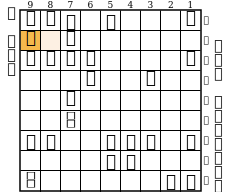

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b
go byoyomi 1000
lnB1+R3l/r1s6/pppk4p/3p2p2/2n6/2+s6/PP2PSP1P/4GK3/+n6NL b B3GSL6Pp 67
0:9g9f  move_count:  12 nn_rate:0.00033 win_rate:0.98475
1:8g8f  move_count:   0 nn_rate:0.00266 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00510 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00361 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00024 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
6:4g5f  move_count:  18 nn_rate:0.05520 win_rate:0.96837
7:4g4f  move_count:   0 nn_rate:0.00733 win_rate:0.00000
8:4g3f  move_count:  21 nn_rate:0.04920 win_rate:0.97802
9:4g3h  move_count:   0 nn_rate:0.0014

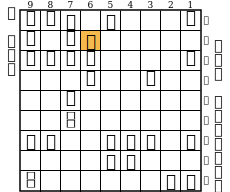

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b
go byoyomi 1000
info currmove 6c7d
info time 0 depth 1 nodes 4 score cp -8424 pv 6c7d
info currmove 6c7d
info currmove 6c7d
info time 0 depth 2 nodes 478 score cp -7728 pv 6c7d 5a1a
info currmove 6c7d
info currmove 6c7d
info time 7 depth 3 nodes 9543 score cp -8649 pv 6c7d B*5d 7e8g+
info currmove 6c7d
info currmove 6c7d
info time 127 depth 4 nodes 148708 score cp -8259 pv 6c7d G*8b 7e8g+ 6b7b
info currmove 6c7d
info time 127 nodes 148710 score cp -8259 pv 6c7d G*8b 7e8g+ 6b7b
bestmove 6c7d
68手目


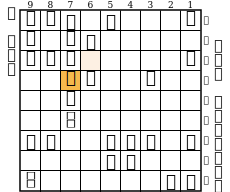

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d
go byoyomi 1000
lnB1+R3l/r1sG5/ppp5p/2kp2p2/2n6/2+s6/PP2PSP1P/4GK3/+n6NL b B2GSL6Pp 69
0:9g9f  move_count:   2 nn_rate:0.00039 win_rate:0.97159
1:8g8f  move_count:   0 nn_rate:0.00533 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00258 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00194 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00022 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
6:4g5f  move_count:  26 nn_rate:0.09176 win_rate:0.96099
7:4g4f  move_count:   0 nn_rate:0.00253 win_rate:0.00000
8:4g3f  move_count:   0 nn_rate:0.01594 win_rate:0.00000
9:4g3h  move_count:   0 nn_

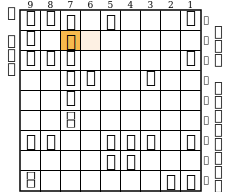

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b
go byoyomi 1000
info currmove 9b7b
info time 0 depth 1 nodes 4 score cp -8019 pv 9b7b
info currmove 9b7b
info currmove 9b7b
info time 1 depth 2 nodes 567 score cp -7323 pv 9b7b 5a1a
info currmove 9b7b
info currmove 9b7b
info time 26 depth 3 nodes 30217 score cp -8219 pv 9b7b 7a4d+ 7e8g
info currmove 9b7b
info currmove 9b7b
info time 262 depth 4 nodes 240470 score cp -6793 pv 9b7b 5a1a P*2h 4g3h
info currmove 9b7b
info time 457 nodes 449876 score cp -6793 pv 9b7b 5a1a P*2h 4g3h
bestmove 9b7b
70手目


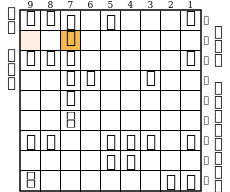

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b
go byoyomi 1000
lnB1+R3l/2r6/ppp5p/2kp2p2/2n6/2+s6/PP2PSP1P/4GK3/+n6NL b B2G2SL6Pgp 71
0:9g9f  move_count:   3 nn_rate:0.00032 win_rate:0.96129
1:8g8f  move_count:   0 nn_rate:0.00226 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00235 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00139 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00007 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00000 win_rate:0.00000
6:4g5f  move_count:  11 nn_rate:0.04549 win_rate:0.93818
7:4g4f  move_count:   0 nn_rate:0.00172 win_rate:0.00000
8:4g3f  move_count:   0 nn_rate:0.00647 win_rate:0.00000
9:4g3h  move_coun

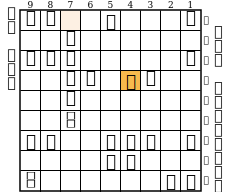

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+
go byoyomi 1000
info currmove 7e8g
info time 0 depth 1 nodes 4 score cp -8219 pv 7e8g
info currmove P*2h
info currmove 7e8g
info time 1 depth 2 nodes 686 score cp -8219 pv 7e8g 5a8a
info currmove P*2h
info time 1 depth 2 nodes 1179 score cp -5879 pv P*2h 5a8a
info currmove 7e8g
info time 37 depth 3 nodes 40220 score cp -9449 pv 7e8g 5a8a 7b9b
info currmove P*2h
info time 61 depth 3 nodes 64068 score cp -8924 pv 7b8b 5a7a 8b4b
info time 69 depth 3 nodes 75090 score cp -8904 pv G*8b B*4a 7d8d
info currmove G*8b
info time 367 depth 4 nodes 381575 score cp -7533 pv G*8b S*6a 7b3b 4d1a
info currmove P*2h
info

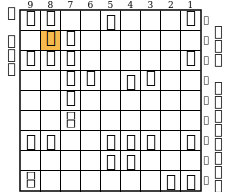

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b
go byoyomi 1000
ln2+R3l/1gr6/ppp5p/2kp1+Bp2/2n6/2+s6/PP2PSP1P/4GK3/+n6NL b B2G2SL6Pp 73
0:9g9f  move_count:  13 nn_rate:0.00068 win_rate:0.97555
1:8g8f  move_count:   0 nn_rate:0.00921 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00839 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00378 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00037 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00001 win_rate:0.00000
6:4g5f  move_count:  61 nn_rate:0.12241 win_rate:0.97964
7:4g4f  move_count:   0 nn_rate:0.00813 win_rate:0.00000
8:4g3f  move_count:   0 nn_rate:0.02365 win_rate:0.00000
9:4g3

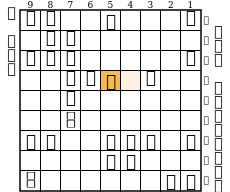

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d
go byoyomi 1000
info currmove 7f8g
info time 0 depth 1 nodes 4 score cp -8084 pv 7f8g
info currmove 7e8g+
info currmove 7f8g
info time 1 depth 2 nodes 584 score cp -7888 pv 7f8g 5a1a
info currmove 7e8g+
info time 2 depth 2 nodes 1070 score cp -7388 pv 7e8g+ 5a1a
info time 4 depth 2 nodes 2456 score cp -7273 pv 7e6g+ 5a1a
info time 5 depth 2 nodes 2919 score cp -6966 pv 7b2b 5d7f
info currmove 7f8g
info time 18 depth 3 nodes 18562 score cp -11094 pv 7f8g S*6c 7d8d
info currmove 7b2b
info time 28 depth 3 nodes 29337 score cp -9276 pv 7b2b L*2g P*2f
info time 40 depth 3 nodes 43207 score cp -9219 

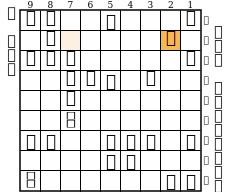

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b
go byoyomi 1000
ln2+R3l/1g5r1/ppp5p/2kp+B1p2/2n6/2+s6/PP2PSP1P/4GK3/+n6NL b B2G2SL6Pp 75
0:9g9f  move_count:   4 nn_rate:0.00016 win_rate:0.96181
1:8g8f  move_count:   0 nn_rate:0.00194 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00204 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00492 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00015 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00002 win_rate:0.00000
6:4g5f  move_count:   0 nn_rate:0.02479 win_rate:0.00000
7:4g4f  move_count:   0 nn_rate:0.00161 win_rate:0.00000
8:4g3f  move_count:   0 nn_rate:0.00387 win_rate:0.

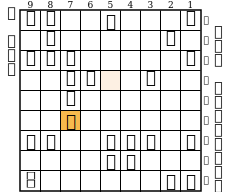

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f
go byoyomi 1000
info currmove 2b2i+
info time 3 depth 1 nodes 3 score cp -8715 pv 2b2i+
info currmove 2b2i+
info time 7 depth 2 nodes 559 score cp -7594 pv 2b2i+ G*1h
info currmove 2b2i+
info currmove 2b2i+
info time 25 depth 3 nodes 17798 score cp -8847 pv 2b2i+ S*8e 7d6c
info currmove 2b2i+
info currmove 2b2i+
info time 146 depth 4 nodes 127897 score cp -7607 pv 2b2i+ G*8e 7d6c 8e7e
info currmove 2b2i+
info time 501 nodes 443035 score cp -8847 pv 2b2i+ G*8e 7d6c 8e7e
bestmove 2b2i+
76手目


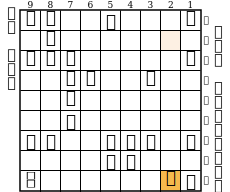

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+
go byoyomi 1000
ln2+R3l/1g7/ppp5p/2kp2p2/2n6/2+B6/PP2PSP1P/4GK3/+n6+rL b B2G3SL6Pnp 77
0:9g9f  move_count:   5 nn_rate:0.00011 win_rate:0.94074
1:8g8f  move_count:   0 nn_rate:0.02011 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00945 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00092 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00003 win_rate:0.00000
5:1i1h  move_count:   0 nn_rate:0.00002 win_rate:0.00000
6:4g5f  move_count:  31 nn_rate:0.08262 win_rate:0.91916
7:4g4f  move_count:   0 nn_rate:0.01281 win_rate:0.00000
8:4g3f  move_count:   0 nn_rate:0.00678 wi

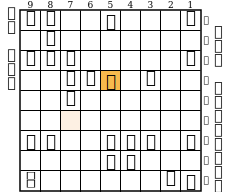

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d
go byoyomi 1000
info time 4 depth 1 nodes 98 score cp -7655 pv 2i1i
info currmove 2i1i
info time 10 depth 2 nodes 663 score cp -7459 pv 2i1i 5a1a
info time 11 depth 2 nodes 1812 score cp -6968 pv 7e8g+ 5a1a
info time 12 depth 2 nodes 1828 score cp -6434 pv 2i2h 4h4i
info currmove 2i1i
info time 51 depth 3 nodes 46163 score cp -7867 pv 2i1i 5a7a 8b9b
info currmove 2i2h
info time 52 depth 3 nodes 46892 score cp -7655 pv 2i2h 4h4i 2h1i
info currmove 2i2h
info time 144 depth 4 nodes 119100 score cp -6957 pv 2i2h G*3h N*3f 5d3f
info currmove 2i2h
info time 501 nodes 470759 score

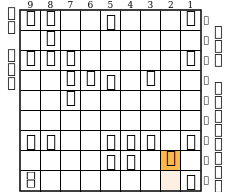

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h
go byoyomi 1000
ln2+R3l/1g7/ppp5p/2kp+B1p2/2n6/9/PP2PSP1P/4GK1+r1/+n7L b B2G3SL6Pnp 79
0:4g3h  move_count:  83 nn_rate:0.36525 win_rate:0.87190
1:4h5i  move_count:  99 nn_rate:0.25158 win_rate:0.90840
2:4h4i  move_count:  10 nn_rate:0.06450 win_rate:0.83809
3:L*3h  move_count: 101 nn_rate:0.20573 win_rate:0.91647
4:S*3h  move_count:   0 nn_rate:0.01353 win_rate:0.00000
5:G*3h  move_count:   0 nn_rate:0.01860 win_rate:0.00000
6:B*3h  move_count:  10 nn_rate:0.08081 win_rate:0.80325
info nps 42 time 7098 nodes 303 hashfull 74 score cp 1437 pv L*3h
bestmove L*3h
79手目


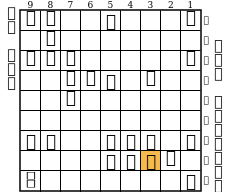

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h
go byoyomi 1000
info currmove 2h1i
info time 3 depth 1 nodes 4 score cp -7633 pv 2h1i
info currmove N*3f
info currmove 2h1i
info time 6 depth 2 nodes 562 score cp -7437 pv 2h1i 5a1a
info currmove N*3f
info time 6 depth 2 nodes 574 score cp -6815 pv N*3f 5d3f
info currmove 2h1i
info time 40 depth 3 nodes 36196 score cp -7845 pv 2h1i 5a7a 8b9b
info currmove N*3f
info currmove 2h1i
info time 211 depth 4 nodes 186743 score cp -7422 pv 2h1i 5a1a 7e8g+ 5d8g
info currmove N*3f
info time 223 depth 4 nodes 195664 score cp -6818 pv N*3f 5d3f 7e8g+ 5a1a
info time 501 nodes 4

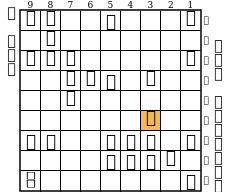

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f
go byoyomi 1000
ln2+R3l/1g7/ppp5p/2kp+B1p2/2n6/6n2/PP2PSP1P/4GKL+r1/+n7L b B2G3S6Pp 81
0:3g3f  move_count:  94 nn_rate:0.36715 win_rate:0.91148
1:4g3f  move_count:  45 nn_rate:0.14537 win_rate:0.91271
2:4h5i  move_count:   9 nn_rate:0.06700 win_rate:0.83432
3:4h4i  move_count:  19 nn_rate:0.08901 win_rate:0.88990
4:5d3f  move_count: 114 nn_rate:0.33147 win_rate:0.92491
info nps 43 time 6524 nodes 281 hashfull 68 score cp 1506 pv 5d3f
bestmove 5d3f
81手目


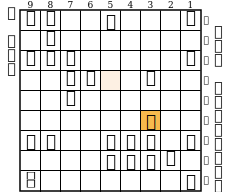

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f
go byoyomi 1000
info currmove 7e8g+
info time 0 depth 1 nodes 3 score cp -9637 pv 7e8g+
info time 0 depth 1 nodes 55 score cp -9103 pv 2h1i
info currmove 2h1i
info time 0 depth 2 nodes 568 score cp -8407 pv 2h1i 5a1a
info currmove 7e8g+
info currmove 2h1i
info time 16 depth 3 nodes 21624 score cp -9315 pv 2h1i 5a7a 8b9b
info currmove 2h1i
info currmove 2h1i
info time 175 depth 4 nodes 180496 score cp -8407 pv 2h1i 5a1a 7e8g+ 1a1c
info currmove 2h1i
info time 487 nodes 469939 score cp -8407 pv 2h1i 5a1a 7e8g+ 1a1c
bestmove 2h1i
82手目


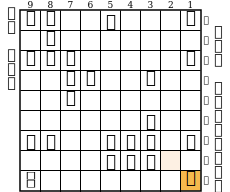

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i
go byoyomi 1000
ln2+R3l/1g7/ppp5p/2kp2p2/2n6/6+B2/PP2PSP1P/4GKL2/+n7+r b B2G3SN6Plp 83
0:9g9f  move_count:   5 nn_rate:0.00003 win_rate:0.85484
1:8g8f  move_count:  10 nn_rate:0.04397 win_rate:0.91334
2:5g5f  move_count:   0 nn_rate:0.00032 win_rate:0.00000
3:1g1f  move_count:   0 nn_rate:0.00028 win_rate:0.00000
4:4g5f  move_count:   0 nn_rate:0.02226 win_rate:0.00000
5:4g4f  move_count:   0 nn_rate:0.00291 win_rate:0.00000
6:5h6g  move_count:   0 nn_rate:0.00000 win_rate:0.00000
7:5h6h  move_count:   0 nn_rate:0.00003 win_rate:0.00000
8:5h5i  move

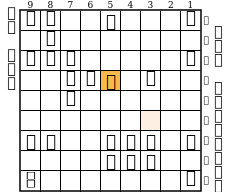

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d
go byoyomi 1000
info currmove 1i1g
info time 0 depth 1 nodes 4 score cp -8898 pv 1i1g
info currmove 7e8g+
info time 0 depth 1 nodes 102 score cp -7879 pv 1a1b
info currmove 1a1b
info time 1 depth 2 nodes 643 score cp -7879 pv 1a1b 5d8a
info currmove 7e8g+
info time 10 depth 2 nodes 9795 score cp -7658 pv P*4f 4g3f
info currmove 1a1b
info time 31 depth 3 nodes 34911 score cp -9316 pv 1a1b 5a7a 8b9b
info currmove P*4f
info time 43 depth 3 nodes 50612 score cp -9058 pv P*4f N*6f 7d8d
info currmove P*4f
info time 110 depth 4 nodes 116103 score cp -

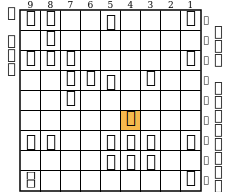

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f
go byoyomi 1000
ln2+R3l/1g7/ppp5p/2kp+B1p2/2n6/5p3/PP2PSP1P/4GKL2/+n7+r b B2G3SN6Pl 85
0:9g9f  move_count:   2 nn_rate:0.00003 win_rate:0.95967
1:8g8f  move_count:   0 nn_rate:0.00506 win_rate:0.00000
2:5g5f  move_count:   0 nn_rate:0.00027 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00069 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00000 win_rate:0.00000
5:4g5f  move_count: 160 nn_rate:0.49114 win_rate:0.94760
6:4g4f  move_count: 123 nn_rate:0.39781 win_rate:0.94148
7:4g3f  move_count:   0 nn_rate:0.01406 win_rate:0.00000
8:

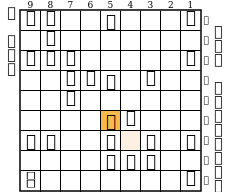

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f
go byoyomi 1000
info currmove 1a1b
info time 1 depth 1 nodes 4 score cp -7869 pv 1a1b
info currmove L*4g
info currmove 1a1b
info time 3 depth 2 nodes 609 score cp -7869 pv 1a1b 5d8a
info currmove L*4g
info time 3 depth 2 nodes 614 score cp -5609 pv L*4g 5h4g
info currmove 1a1b
info time 28 depth 3 nodes 27007 score cp -9246 pv 1a1b S*7a 8b9b
info currmove L*4g
info time 28 depth 3 nodes 27064 score cp -5218 pv L*4g 5h4g 4f4g+
info currmove L*4g
info time 40 depth 4 nodes 37278 score cp -3798 pv L*4g 5h4g 4f4g+ 5f4g
info currmove L*4g


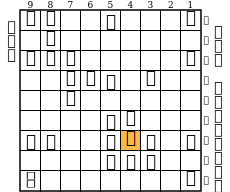

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g
go byoyomi 1000
ln2+R3l/1g7/ppp5p/2kp+B1p2/2n6/4Sp3/PP2PlP1P/4GKL2/+n7+r b B2G3SN6P 87
0:5f4g  move_count: 134 nn_rate:0.53839 win_rate:0.91527
1:5h4g  move_count: 152 nn_rate:0.46161 win_rate:0.93685
info nps 35 time 7998 nodes 286 hashfull 69 score cp 1618 pv 5h4g
bestmove 5h4g
87手目


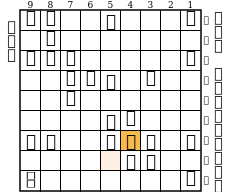

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g
go byoyomi 1000
info currmove 4f4g+
info time 1 depth 1 nodes 4 score cp -6881 pv 4f4g+
info currmove 4f4g+
info currmove 4f4g+
info time 2 depth 2 nodes 67 score cp -5239 pv 4f4g+ 5f4g
info currmove 4f4g+
info currmove 4f4g+
info time 4 depth 3 nodes 396 score cp -5450 pv 4f4g+ 5f4g 1a1b
info currmove 4f4g+
info currmove 4f4g+
info time 42 depth 4 nodes 39172 score cp -5093 pv 4f4g+ 4h4g 7e8g+ 5a1a
info currmove 4f4g+
info time 140 nodes 144037 score cp -5093 pv 4f4g+ 4h4g 7e8g+ 5a1a
bestmove 4f4g+
88手目


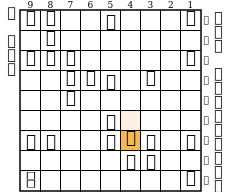

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+
go byoyomi 1000
ln2+R3l/1g7/ppp5p/2kp+B1p2/2n6/4S4/PP2P+pP1P/5KL2/+n7+r b B2G3SNL6Pg 89
0:5f4g  move_count: 112 nn_rate:0.44658 win_rate:0.91285
1:4h4g  move_count: 206 nn_rate:0.55342 win_rate:0.93916
info nps 57 time 5491 nodes 318 hashfull 77 score cp 1642 pv 4h4g
bestmove 4h4g
89手目


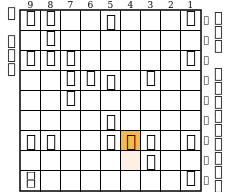

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g
go byoyomi 1000
info currmove 1a1b
info time 3 depth 1 nodes 4 score cp -6887 pv 1a1b
info currmove 7e8g+
info currmove 1a1b
info time 6 depth 2 nodes 721 score cp -6887 pv 1a1b 5d8a
info currmove 7e8g+
info time 7 depth 2 nodes 1167 score cp -6876 pv 1i4i P*4h
info time 8 depth 2 nodes 1715 score cp -6731 pv G*6c 5d7f
info currmove 1a1b
info time 26 depth 3 nodes 21927 score cp -8165 pv 1a1b 5a6b G*7b
info currmove G*6c
info time 48 depth 3 nodes 48242 score cp -8118 pv 7e8g+ 5a7a 8b9b
info time 50 depth 3 nodes 

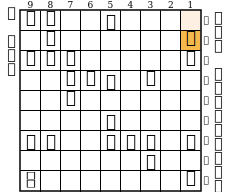

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b
go byoyomi 1000
ln2+R4/1g6l/ppp5p/2kp+B1p2/2n6/4S4/PP2PKP1P/6L2/+n7+r b B2G3SNL7Pg 91
0:9g9f  move_count:  26 nn_rate:0.00007 win_rate:0.95698
1:8g8f  move_count:   3 nn_rate:0.02973 win_rate:0.97066
2:3g3f  move_count:   0 nn_rate:0.00573 win_rate:0.00000
3:1g1f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
4:5f6e  move_count:   0 nn_rate:0.02111 win_rate:0.00000
5:5f5e  move_count:   0 nn_rate:0.00903 win_rate:0.00000
6:5f4e  move_count:   0 nn_rate:0.00320 win_rate:0.00000
7:5f6g  move_count:   0 nn_ra

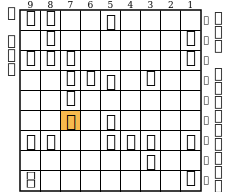

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f
go byoyomi 1000
info currmove 7e8g+
info time 3 depth 1 nodes 4 score cp -6178 pv 7e8g+
info currmove 7e8g+
info currmove 7e8g+
info time 6 depth 2 nodes 694 score cp -6178 pv 7e8g+ 5d8a
info currmove 7e8g+
info time 8 depth 2 nodes 1460 score cp -6168 pv 1i4i P*4h
info currmove 7e8g+
info time 27 depth 3 nodes 21855 score mate - pv 7e8g+ G*7e 1i1g
info currmove 1i4i
info time 28 depth 3 nodes 22564 score cp -8038 pv 1i4i G*4h 4i8i
info currmove 1i4i
info time 55 depth 4 nodes 49709 score cp -6986 pv 1i4

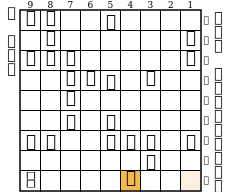

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i
go byoyomi 1000
ln2+R4/1g6l/ppp5p/2kp+B1p2/2n6/2P1S4/PP2PKP1P/6L2/+n4+r3 b B2G3SNL6Pg 93
0:4g3f  move_count:  45 nn_rate:0.18921 win_rate:0.93039
1:P*4h  move_count: 151 nn_rate:0.78574 win_rate:0.92014
2:L*4h  move_count:   0 nn_rate:0.00742 win_rate:0.00000
3:N*4h  move_count:   0 nn_rate:0.00541 win_rate:0.00000
4:S*4h  move_count:   0 nn_rate:0.00254 win_rate:0.00000
5:G*4h  move_count:   0 nn_rate:0.00262 win_rate:0.00000
6:B*4h  move_count:   0 nn_rate:0.00706 win_rate:0.00000
info nps 38 time

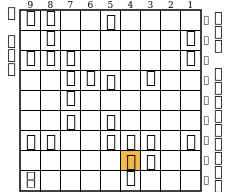

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h
go byoyomi 1000
info currmove 7e8g+
info time 4 depth 1 nodes 4 score cp -6173 pv 7e8g+
info currmove 7e8g+
info currmove 7e8g+
info time 9 depth 2 nodes 671 score cp -6173 pv 7e8g+ 5d8a
info currmove 7e8g+
info currmove 7e8g+
info time 30 depth 3 nodes 19663 score mate - pv 7e8g+ G*7e 8g9g
info currmove 7e8g+
info time 40 depth 3 nodes 30522 score cp -10617 pv G*6c 7f7e 7d7e
info time 56 depth 3 nodes 47997 score cp -8156 pv 4i8i 5a6b G*7b
info time 75 depth 3 nodes 68856 score cp -8154 pv 3d3

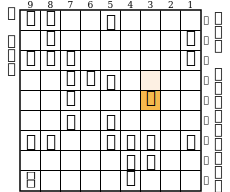

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e
go byoyomi 1000
ln2+R4/1g6l/ppp5p/2kp+B4/2n3p2/2P1S4/PP2PKP1P/5PL2/+n4+r3 b B2G3SNL5Pg 95
0:7f7e  move_count: 133 nn_rate:0.55255 win_rate:0.92809
1:9g9f  move_count:   0 nn_rate:0.00001 win_rate:0.00000
2:8g8f  move_count:   0 nn_rate:0.00795 win_rate:0.00000
3:3g3f  move_count:   0 nn_rate:0.00014 win_rate:0.00000
4:1g1f  move_count:   0 nn_rate:0.00001 win_rate:0.00000
5:5f6e  move_count:   0 nn_rate:0.00134 win_rate:0.00000
6:5f5e  move_count:   0 nn_rate:0.00163 win_rate:0.00000
7:5f4

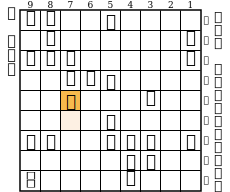

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e
go byoyomi 1000
info currmove 7d7e
info time 0 depth 1 nodes 4 score cp -8105 pv 7d7e
info currmove 7d7e
info currmove 7d7e
info time 1 depth 2 nodes 568 score cp -8110 pv 7d7e P*2b
info currmove 7d7e
info currmove 7d7e
info time 19 depth 3 nodes 23175 score cp -9460 pv 7d7e S*2c P*2f
info currmove 7d7e
info currmove 7d7e
info time 354 depth 4 nodes 357307 score cp -8471 pv 7d7e B*7a G*7b 7a3e+
info currmove 7d7e
info time 399 nodes 408033 score cp -8471 pv 7d7e B*7a G*7b 7a3e+
bestmo

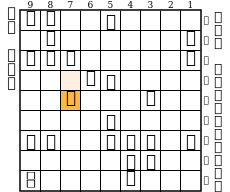

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e
go byoyomi 1000
ln2+R4/1g6l/ppp5p/3p+B4/2k3p2/4S4/PP2PKP1P/5PL2/+n4+r3 b B2G3S2NL5Pgp 97
0:9g9f  move_count:  21 nn_rate:0.00027 win_rate:0.91955
1:8g8f  move_count:   0 nn_rate:0.00400 win_rate:0.00000
2:3g3f  move_count:   0 nn_rate:0.00117 win_rate:0.00000
3:1g1f  move_count:   0 nn_rate:0.00003 win_rate:0.00000
4:5f6e  move_count:   0 nn_rate:0.00277 win_rate:0.00000
5:5f5e  move_count:   0 nn_rate:0.00330 win_rate:0.00000
6:5f4e  move_count:   0 nn_rate:0.00071 win_rate:0.00

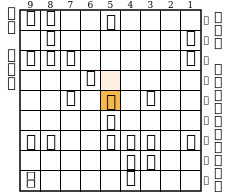

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e
go byoyomi 1000
info currmove P*5d
info time 2 depth 1 nodes 4 score cp -8309 pv P*5d
info currmove P*5d
info time 2 depth 1 nodes 108 score cp -8170 pv G*2g
info time 2 depth 1 nodes 111 score cp -8100 pv 4i1i
info time 2 depth 1 nodes 116 score cp -8090 pv P*2f
info currmove P*5d
info time 5 depth 2 nodes 705 score cp -8310 pv P*5d 5a5d
info currmove P*2f
info time 5 depth 2 nodes 1228 score cp -8100 pv P*2f P*2b
info time 6 depth 2 nodes 1843 score cp -7875 pv G*2g B*1f
i

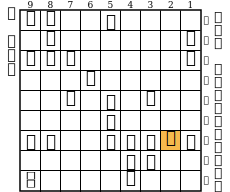

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g
go byoyomi 1000
ln2+R4/1g6l/ppp5p/3p5/2k1+B1p2/4S4/PP2PKPgP/5PL2/+n4+r3 b B2G3S2NL5Pp 99
0:9g9f  move_count:   8 nn_rate:0.00067 win_rate:0.91304
1:8g8f  move_count:   0 nn_rate:0.00900 win_rate:0.00000
2:3g3f  move_count:   0 nn_rate:0.01772 win_rate:0.00000
3:1g1f  move_count:   0 nn_rate:0.00045 win_rate:0.00000
4:5f6e  move_count:   0 nn_rate:0.02497 win_rate:0.00000
5:5f4e  move_count:   0 nn_rate:0.00340 win_rate:0.00000
6:5f6g  move_count:   0 nn_rate:0.00215 win

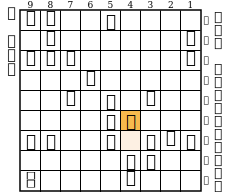

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f
go byoyomi 1000
info currmove 4i3h
info time 1 depth 1 nodes 4 score cp -8867 pv 4i3h
info currmove 4i3h
info time 1 depth 1 nodes 56 score cp -7137 pv 2g3h
info currmove 4i3h
info time 3 depth 2 nodes 640 score cp -7941 pv 4i3h 5e9i
info currmove 2g3h
info time 3 depth 2 nodes 1176 score cp -6935 pv 2g3h 4f3e
info currmove 2g3h
info time 29 depth 3 nodes 32906 score cp -8777 pv 2g3h B*6f 7e7f
info currmove 2g3h
info time 31 depth 3 nodes 34188 score cp -8173 pv 4i

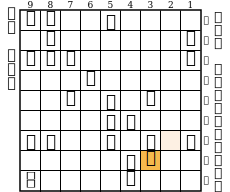

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h
go byoyomi 1000
ln2+R4/1g6l/ppp5p/3p5/2k1+B1p2/4SK3/PP2P1P1P/5Pg2/+n4+r3 b B2G3S2NL5Plp 101
0:9g9f  move_count:  15 nn_rate:0.00104 win_rate:0.93653
1:8g8f  move_count:   0 nn_rate:0.01049 win_rate:0.00000
2:3g3f  move_count:   0 nn_rate:0.00060 win_rate:0.00000
3:1g1f  move_count:   0 nn_rate:0.00008 win_rate:0.00000
4:4h4g  move_count:   0 nn_rate:0.00395 win_rate:0.00000
5:5f6e  move_count:   0 nn_rate:0.02186 win_rate:0.00000
6:5f4e  move_count:   0 nn_rat

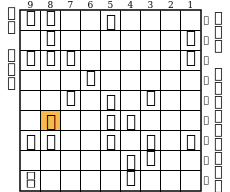

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f
go byoyomi 1000
info currmove 7e7f
info time 0 depth 1 nodes 4 score cp -7047 pv 7e7f
info currmove 7e7f
info currmove 7e7f
info time 1 depth 2 nodes 468 score cp -6845 pv 7e7f 4f3e
info currmove 7e7f
info currmove 7e7f
info time 14 depth 3 nodes 18088 score cp -8502 pv 7e7f G*5i 7f8g
info currmove 7e7f
info currmove 7e7f
info time 177 depth 4 nodes 183854 score cp -7453 pv 7e7f 5e5d 7f8e 8f6d
info currmove 7e7f
info time 283 depth 4 nodes 305618 score cp

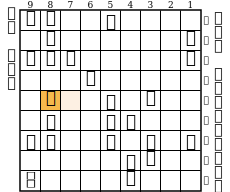

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e
go byoyomi 1000
ln2+R4/1g6l/ppp5p/3p5/1k2+B1p2/1B2SK3/PP2P1P1P/5Pg2/+n4+r3 b 2G3S2NL5Plp 103
0:9g9f  move_count:   3 nn_rate:0.00431 win_rate:0.90338
1:3g3f  move_count:   0 nn_rate:0.00495 win_rate:0.00000
2:1g1f  move_count:   0 nn_rate:0.00030 win_rate:0.00000
3:4h4g  move_count:   0 nn_rate:0.01815 win_rate:0.00000
4:5f6e  move_count:   0 nn_rate:0.02428 win_rate:0.00000
5:5f4e  move_count:   0 nn_rate:0.01616 win_rate:0.00000
6:5f6g  move_count:

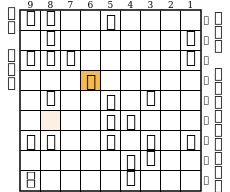

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d
go byoyomi 1000
info currmove P*4g
info time 5 depth 1 nodes 3 score cp -7243 pv P*4g
info time 5 depth 1 nodes 110 score cp -7048 pv 3h4h
info currmove 3h4h
info time 11 depth 2 nodes 659 score cp -7051 pv 3h4h 4f3e
info currmove P*4g
info time 12 depth 2 nodes 1118 score cp -6013 pv P*4g 4h4g
info currmove 3h4h
info time 34 depth 3 nodes 22134 score cp -8285 pv 3h4h 5a7a 8b9b
info currmove P*4g
info time 46 depth 3 nodes 37064 score cp -8208 p

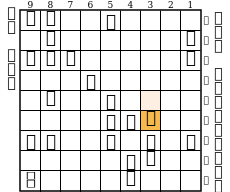

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f
go byoyomi 1000
ln2+R4/1g6l/ppp5p/3B5/1k2+B4/4SKp2/PP2P1P1P/5Pg2/+n4+r3 b 2G3S2NL6Plp 105
0:9g9f  move_count:   5 nn_rate:0.00169 win_rate:0.91310
1:8g8f  move_count:  27 nn_rate:0.07924 win_rate:0.90716
2:3g3f  move_count:  85 nn_rate:0.24693 win_rate:0.92182
3:1g1f  move_count:   0 nn_rate:0.00004 win_rate:0.00000
4:4h4g  move_count:   0 nn_rate:0.01201 win_rate:0.00000
5:5f6e  move_count:  60 nn_rate:0.07268 win_rate:0.94628
6:5f4e  move

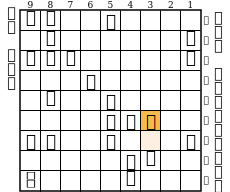

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f
go byoyomi 1000
info currmove 3h4h
info time 5 depth 1 nodes 4 score cp -7052 pv 3h4h
info currmove 8e7f
info currmove 3h4h
info time 10 depth 2 nodes 684 score cp -7252 pv 3h4h 6d5c+
info currmove 8e7f
info time 11 depth 2 nodes 1106 score cp -7052 pv 4i4h 5f4g
info time 12 depth 2 nodes 1961 score cp -7050 pv L*4c L*4e
info time 24 depth 2 nodes 19275 score cp -6222 pv P*4g 4h4g
info currmove 3h4h
info time 46 depth 3 nodes 42327 sco

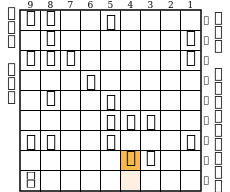

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f 4i4h
go byoyomi 1000
ln2+R4/1g6l/ppp5p/3B5/1k2+B4/4SKP2/PP2P3P/5+rg2/+n8 b 2G3S2NL7Pl2p 107
0:5f4g  move_count:  85 nn_rate:0.45732 win_rate:0.91053
1:4f3e  move_count:  66 nn_rate:0.14802 win_rate:0.96318
2:P*4g  move_count: 122 nn_rate:0.35789 win_rate:0.95663
3:L*4g  move_count:   0 nn_rate:0.02037 win_rate:0.00000
4:N*4g  move_count:   0 nn_rate:0.01123 win_rate:0.00000
5:S*4g  move_count:   0 nn_rate:0.00064 win_rate:0.00000
6:G*4

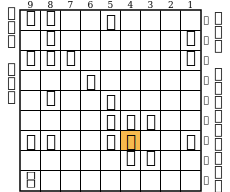

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f 4i4h P*4g
go byoyomi 1000
info currmove 4h9h
info time 8 depth 1 nodes 4 score cp -7047 pv 4h9h
info currmove 4h3g
info currmove 4h9h
info time 18 depth 2 nodes 665 score cp -7047 pv 4h9h 5e6e
info currmove 4h3g
info time 18 depth 2 nodes 671 score cp -6842 pv 4h3g 4f3e
info currmove 4h9h
info time 53 depth 3 nodes 37550 score cp -8807 pv 4h9h G*8h 8b7b
info currmove 4h3g
info time 54 depth 3 nodes 37834 score cp -8777 pv 4h3g 4f3e 3g1

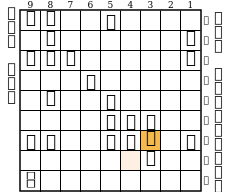

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f 4i4h P*4g 4h3g
go byoyomi 1000
ln2+R4/1g6l/ppp5p/3B5/1k2+B4/4SKP2/PP2PP+r1P/6g2/+n8 b 2G3S2NL6Pl2p 109
0:4f4e  move_count: 151 nn_rate:0.51715 win_rate:0.94103
1:4f3e  move_count:  94 nn_rate:0.48285 win_rate:0.90922
info nps 37 time 6505 nodes 245 hashfull 59 score cp 1661 pv 4f4e
bestmove 4f4e
109手目


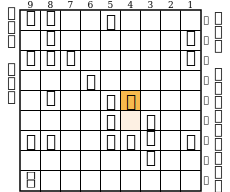

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f 4i4h P*4g 4h3g 4f4e
go byoyomi 1000
info currmove 3g1g
info time 4 depth 1 nodes 4 score cp -8777 pv 3g1g
info currmove P*4f
info currmove 3g1g
info time 8 depth 2 nodes 677 score cp -8053 pv 3g1g 5e9i
info currmove P*4f
info time 9 depth 2 nodes 1153 score cp -6832 pv P*4f 5e6e
info currmove 3g1g
info time 45 depth 3 nodes 40519 score cp -8967 pv 3g1g 6d5c+ P*2f
info currmove P*4f
info time 61 depth 3 nodes 60640 score cp -8915 pv P*4

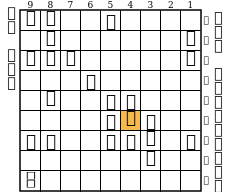

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f 4i4h P*4g 4h3g 4f4e P*4f
go byoyomi 1000
ln2+R4/1g6l/ppp5p/3B5/1k2+BK3/4SpP2/PP2PP+r1P/6g2/+n8 b 2G3S2NL6Plp 111
0:3f3e  move_count:   6 nn_rate:0.00600 win_rate:0.87224
1:9g9f  move_count:   0 nn_rate:0.00290 win_rate:0.00000
2:8g8f  move_count:  27 nn_rate:0.13611 win_rate:0.88657
3:4g4f  move_count:  17 nn_rate:0.05311 win_rate:0.91503
4:1g1f  move_count:   0 nn_rate:0.00010 win_rate:0.00000
5:5f6e  move_count:  26 nn_rate:0.06064 w

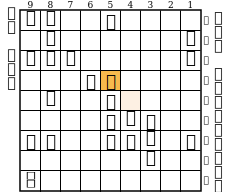

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f 4i4h P*4g 4h3g 4f4e P*4f 4e5d
go byoyomi 1000
info currmove 4f4g+
info time 0 depth 1 nodes 4 score cp -7682 pv 4f4g+
info currmove 4f4g+
info time 1 depth 1 nodes 108 score cp -7242 pv 9i9h
info currmove 4f4g+
info time 2 depth 2 nodes 664 score cp -6396 pv 4f4g+ 5e9i
info currmove 9i9h
info time 5 depth 2 nodes 3795 score cp -5942 pv P*6c 5d6c
info currmove 9i9h
info time 34 depth 3 nodes 38686 score cp -8207 pv 9i9h 5a4b 4f4g+
info 

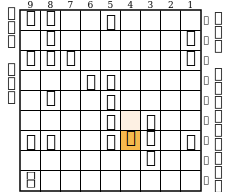

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f 4i4h P*4g 4h3g 4f4e P*4f 4e5d 4f4g+
go byoyomi 1000
ln2+R4/1g6l/ppp5p/3BK4/1k2+B4/4S1P2/PP2P+p+r1P/6g2/+n8 b 2G3S2NL6Pl2p 113
0:3f3e  move_count:   4 nn_rate:0.00035 win_rate:0.90735
1:9g9f  move_count:   0 nn_rate:0.00011 win_rate:0.00000
2:8g8f  move_count:  24 nn_rate:0.04133 win_rate:0.98543
3:1g1f  move_count:   0 nn_rate:0.00001 win_rate:0.00000
4:5f6e  move_count:  15 nn_rate:0.05338 win_rate:0.95361
5:5f4e  move_count:   0 nn_r

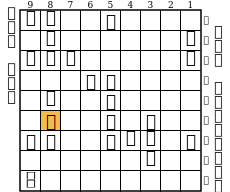

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f 4i4h P*4g 4h3g 4f4e P*4f 4e5d 4f4g+ G*8f
go byoyomi 1000
info currmove 8e7d
info time 0 depth 1 nodes 4 score cp -7612 pv 8e7d
info currmove 8e7d
info currmove 8e7d
info time 1 depth 2 nodes 515 score cp -6620 pv 8e7d 5e9i
info currmove 8e7d
info currmove 8e7d
info time 6 depth 3 nodes 4721 score mate - pv 8e7d 8f7e 7d8d
info currmove 8e7d
info currmove 8e7d
info time 32 depth 4 nodes 34015 score mate - pv 8e7d 8f7e L*8d 8f7f
info time

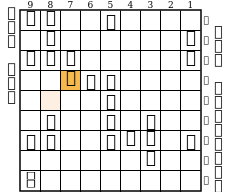

position startpos moves 2g2f 4a3b 7g7f 3c3d 2f2e 2b8h+ 7i8h B*6e 8h7g 6e4g+ 4i5h 4g5h 6i5h G*7h 2e2d 7h7g 8i7g S*8h 2d2c+ P*2g 2h2g 3b4b P*2b 8h7g+ 2b2a+ 7g7f 2a3a P*2h 3i2h N*7e 2c3b 7e6g 5i4h P*2f 2g2f 4b3b 3a3b P*2g 2h3i 2g2h+ 3i2h 6g7i+ 2f2a+ 5a6b P*6d 6c6d 3b4b P*2g 2h2g 7i8i 2g3f 8i9i 4b4c L*4f N*4g 4f4g+ 3f4g N*7e 4c5c 6b5c 2a6a 7a7b 6a5a 5c6c B*7a 8b9b G*6b 6c7d 6b7b 9b7b 7a4d+ G*8b 4d5d 7b2b 5d7f 2b2i+ 7f5d 2i2h L*3h N*3f 5d3f 2h1i 3f5d P*4f 4g5f L*4g 5h4g 4f4g+ 4h4g 1a1b P*7f 1i4i P*4h 3d3e 7f7e 7d7e 5d5e G*2g 4g4f 2g3h B*8f 7e8e 8f6d 3e3f 3g3f 4i4h P*4g 4h3g 4f4e P*4f 4e5d 4f4g+ G*8f 8e7d
go byoyomi 1000
ln2+R4/1g6l/ppp5p/2kBK4/4+B4/1G2S1P2/PP2P+p+r1P/6g2/+n8 b G3S2NL6Pl2p 115
0:3f3e  move_count:   3 nn_rate:0.00089 win_rate:0.93807
1:9g9f  move_count:   0 nn_rate:0.00045 win_rate:0.00000
2:1g1f  move_count:   0 nn_rate:0.00003 win_rate:0.00000
3:5f6e  move_count:  17 nn_rate:0.13903 win_rate:0.96664
4:5f4e  move_count:   0 nn_rate:0.00491 win_rate:0.00000
5:5f6g  move_count

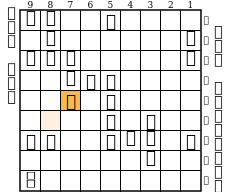

まで115手で先手の勝ち

対局数1 先手勝ち1(100%) 後手勝ち0(0%) 引き分け0

parallel_mcts_player
勝ち1(100%) 先手勝ち1(100%) 後手勝ち0(0%)

Lesserkai 1.4.2
勝ち0(0%) 先手勝ち0(0%) 後手勝ち0(0%)


In [ ]:
cli.main('/content/python-dlshogi/parallel_mcts_player.sh', '/content/LesserkaiSrc/Lesserkai/Lesserkai', options1={'modelfile':'/content/python-dlshogi/model/model_policy_value_resnet'})